### **Quantum Machine Learning with Qiskit**


#### **Python & Qiskit Setup**

Our objective in this course is doing machine learning through quantum computing. To achieve this a series of exercises will be solved by quantum circuits. Besides `qiskit`, three libraries will be heavily used: `pandas`, `scikit-learn` and `qutip`. It is also interesting to import support libraries `numpy` and `matplotlib`'s object plotting library `pyplot`. `qiskit`, its visualization tool and `qutip` need to be installed from `pip` each time a jupyter notebook is runned in Google Colab. The option `-q` installs them silently.

In [7]:
# Setup Acesso do Google Colab aos sistemas IBM Quantum
from google.colab import userdata
ibm_token = userdata.get("IBM_TOKEN")

# 2024/01/25: it is not necessary to install qutip anymore for qiskit
#  graphical circuit display to function properly.

# 2024/02/16: to speed up setup, it will be used only local simulators
# !pip install qiskit-ibm-provider -q
!pip install qiskit -q
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization] -q
!pip install qiskit-aer
# 2024/02/16: to speed up setup, qiskit-textbook is not installed
#!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src -q

import numpy as np
np.set_printoptions(precision=3, suppress=True)
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import sklearn as sk
import qiskit as qk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 17.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 16.1 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.51.0-py3-none-any.whl size=330668 sha256=cfe661fab5c1c284541680a0dee8f7e14d9e283dc6120c6069e31c1d44cb1c93
  Stored in directory: /root/.cache/pip/wheels/7c/53/36/c4d472580ad72eeaa5e00992b6ea127cd61b02c770fe0b56b6
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.19.1-py3-none-any.whl size=95828 sha256=2d0ba3

#### **Qubits basics**

##### **Theory**

In quantum mechanics we are interested in understanding the *states* of one or more *particles*. A particle is whatever very, very small object you may like. A state is something that will be later *measured* by an *observer* (us?). It can be the particle's speed, position, mass, spin, etc... The information obtained from this act can then be used for some purpose in "our" world.

In computing instead of talking about particles we talk about *bits*. A bit is a model for a particle. Like a particle it has states. But the only properties of a particle that can be described by a bit, are those that upon measurement will give you one in two possible results. An electron's spin is an example (it can be +1 or -1). Another example is the polarization plane of a photon ($0^o$ or $90^o)$.

From now on our bit will describe the toss of a coin. The toss of a coin is a phenomenon that can have (upon measurement) one in two possible results: heads or tails. Likewise our bit, let's call it $|c\rangle$, can give you as a measurement result either $|0\rangle$ or $|1\rangle$.

Let's broad our understanding of the coin tossing event. Our bit $|c\rangle$ can describe its result ($|0\rangle$ or $|1\rangle$, heads or tails), but what about what's happening with the coin from the moment it is flipped, starts spinning and finally lands in the palm of your hand? To describe this spinning period we will use another object called a $qubit$. In this example let's call our qubit as $|\psi\rangle$.

Like the bit $|c\rangle$, if you measure the qubit $|\psi\rangle$ it gives you as a result either $|0\rangle$ or $|1\rangle$. But in the case of the bit $|c\rangle$ if you are not trying to measure it, you know that $|c\rangle$ is in a precise state ($|0\rangle$ or $|1\rangle$). This happens because the bit describes the coin only when it has stopped spinning. You may not know the result, but you know, before you measure that there's already a definite result waiting for you.

Now let's see where our $|\psi\rangle$ qubit differs from our daily life $|c\rangle$ bit. It can be shown that while you're not trying to measure it, the qubit is not "at rest" in either $|0\rangle$ or $|1\rangle$ but in an intermediate state between $|0\rangle$ and $|1\rangle$ (in other words its spinning). The qubit, while left alone, has its state represented by $|\psi\rangle = a|0\rangle + b|1\rangle$ where $a$ and $b$ are the "ammount" of each result in the state composition.

Now, one more piece of knowledge that you need to start doing quantum computing. Remember the numbers represented by $a$ and $b$ in the state of the qubit $|\psi\rangle$? They obey a very specific rule, which is $|a|^2+|b|^2=1$. In other words, $|a|^2$ and $|b|^2$ are the probabilities of you getting $|0\rangle$ and $|1\rangle$, respectively, as the result of measuring the qubit $|\psi\rangle$.

The numbers $a$ and $b$ are called the probabilities *amplitudes* of the state. We are almost there. The last piece of information is that the numbers $a$ and $b$ can be not only reals but also complex numbers, like $3+4i$ where $i = \sqrt{-1}$. That's it. You're ready to start your journey towards quantum machine learning. Let the games begin!

##### **Ex.1: Creating a qubit**

In this example we will create a qubit $|\psi_0\rangle$, put it in the state $|0\rangle$ and measure it.

As you may have noticed, we are talking about quantitative models, mathematical representations of a reality. In our representation, the object $|\psi_0\rangle$ that we use to describe our qubit is called a *vector*. The state $|0\rangle$ is therefore a vector and we say $ |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$. Likewise, the state $|1\rangle$ is also a vector, represented by $|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$.

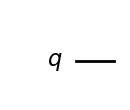

In [2]:
# Remember that qiskit has to be already installed in the Python environment.
# Otherwise the import command will fail
import qiskit as qk

# A circuit composed of just one qubit
qc = qk.QuantumCircuit(1)
qc.draw('mpl', style = 'clifford', scale = 1)

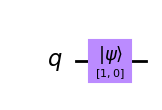

In [3]:
import qiskit as qiskit

# A qubit initialized in the state |0>
qc = qk.QuantumCircuit(1)
qc.initialize([1,0])
qc.draw('mpl', style = 'clifford', scale = 1)

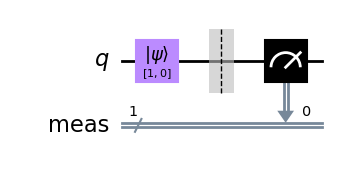

In [4]:
import qiskit as qk

# A qubit initialized in |0> and a measurement
qc = qk.QuantumCircuit(1)
qc.initialize([1,0])
qc.measure_all()
qc.draw('mpl', style = 'clifford')

Quantum Computing is a probabilistic computation method, similar to a Monte Carlo simulation. In a Excel spreadsheet the function `random()` (`aleatorio` in portuguese) gives you the simulation random results. Here it will be the quantum circuit that will do this. The results are the qubit states that the circuit "decides" to show us whenever we measure it.

To do this you first choose a *backend* to run your circuit. This backend can be a local simulator or a real quantum computer made available by IBM. Here we will use the `Aer` backend. After that you choose which simulation to run.

The Python code presented below, shows the simulations available in the `Aer` backend. In this exercise we will choose the `statevector_simulator`.  

In [8]:
import qiskit as qk
import qiskit_aer

# A list of possible measurements. The results of measurements are obtained
#  by executing an object called backend - As of 16/02/2024 the line below
#  was giving an error. Need to understand how to list possible backends in
#  qiskit now.
a = [print(i) for i in qk.aer.backends()]

AttributeError: module 'qiskit' has no attribute 'aer'

Now we tell Qiskit to `execute` for the circuit `qc`, a `statevector_simulator` job in the `Aer` backend, 1000 times (`shots`). In the execution below the results are the state $|0\rangle$ 1000 times.

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(1)
qc.initialize([1,0],0)
qc.measure_all()

# Let's choose a Aer backend with the statevector simulator
backend = qk.Aer.get_backend('statevector_simulator')

# And execute the circuit qc in the simulator backend
#  getting as final result the counts from 1.000 measures
#  of the qubit state
result = qk.execute(qc, backend, shots=1000).result().get_counts()
result

AttributeError: module 'qiskit' has no attribute 'Aer'

The graphic below presents an histogram of the results's probabilities

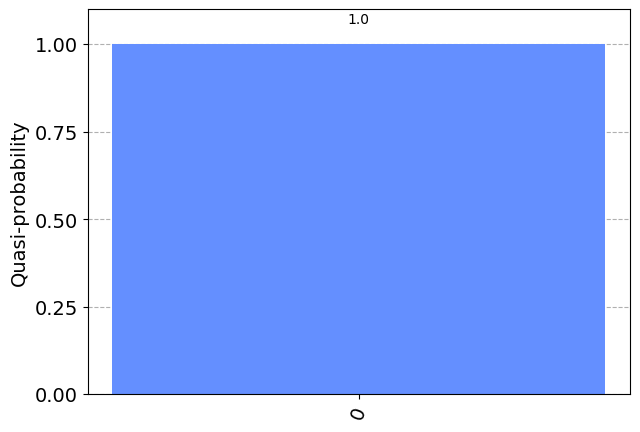

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(1)
qc.initialize([1,0],0)
qc.measure_all()
backend = qk.Aer.get_backend('statevector_simulator')
result = qk.execute(qc, backend, shots=1000).result().get_counts()

qk.visualization.plot_distribution(result)

Another way of creating the quantum circuit is presented below. In it, we create quantum registers (qubits), classical registers (bits) and the results from the qubit measurement are stored in the classical register (the bit).

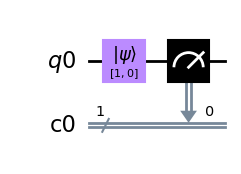

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.measure(0,0)
qc.draw('mpl', style = 'clifford')

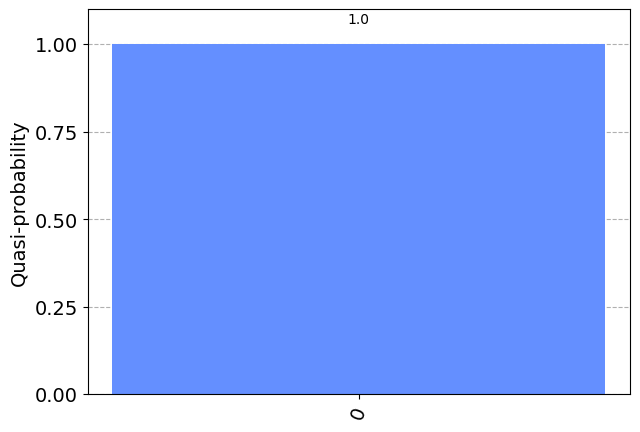

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
result = qk.execute(qc, backend, shots=1000).result().get_counts()

qk.visualization.plot_distribution(result)

##### **Ex.2: Create a circuit which receives a qubit in the state $|0\rangle$ and puts it in the state $|1\rangle$.**

Although the result of a measurement in a qubit is always $|0\rangle$ or $|1\rangle$ it is possible to modify the qubit state (up to a point) until it is measured. The possible results of a measurement in a qubit are called the qubit's *base states*. When the qubit is "left to its own devices" (in other words undisturbed) it is said to be in a state called *superposition* of its base states.

Remember that the states $|0\rangle$ and $|1\rangle$ can also be represented by the matrices $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$? What we want in this exercise is a way of putting a matrix $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ in a circuit and getting back the matrix $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$. From a purely mathematical perspective what we want is another matrix (let's call it $X$) which when multiplied by $|0\rangle$ gives as a result $|1\rangle$. In other words $|1\rangle = X.|0\rangle$. Which matrix is that?

$ X = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $. In fact, $X.|0\rangle = |1\rangle$ because: $\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix}
1 & 0 \\ 0 & 1 \end{bmatrix}.\begin{bmatrix} 1 \\ 0 \end{bmatrix}  $. From a quantum circuit perspective a matrix that operates in a qubit state and modifies it is called a *gate*. The $X$ matrix depicted here represents the so called *NOT* gate. Let's first represent all the matrices operations described here in Python using the `numpy` library. After that let's do the same using a quantum circuit model.

In [ ]:
import numpy as np
v0 = np.array([[1],[0]]);v0

array([[1],
       [0]])

In [ ]:
v1 = np.array([[0],[1]]); v1

array([[0],
       [1]])

In [ ]:
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [ ]:
X.dot(v0)

array([[0],
       [1]])

In [ ]:
X.dot(v1)

array([[1],
       [0]])

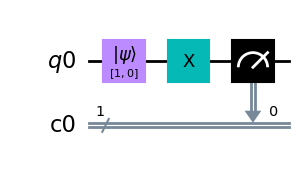

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(1,"q0")
cr = qk.ClassicalRegister(1,"c0")
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.x(0)
qc.measure(qr[0], cr[0])
qc.draw('mpl', style = "clifford")

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, backend, shots=1000).result().get_counts()
results

{'1': 1000}

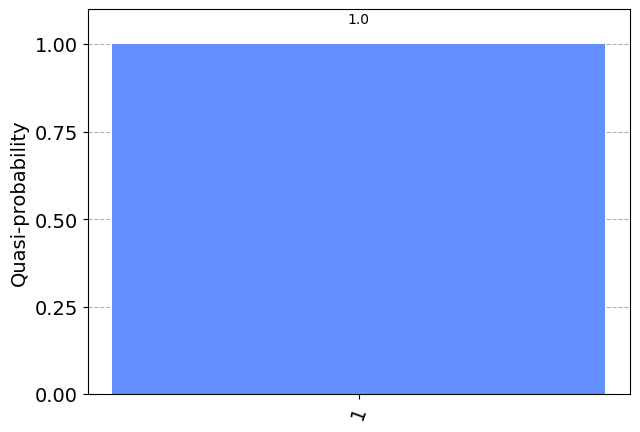

In [ ]:
qk.visualization.plot_distribution(results)

Note that the $X$ operator if applied twice in a qubit will reverse the result again. From a matrix perspective this means that $X.X.|0\rangle = |0\rangle$ or $X^2.|0\rangle = |0\rangle$. In other words $X^2 = I$ where $I$ is the so called Identity Matrix. You can think of it as the equivalent in matrices of the number 1. Below this operation is shown first using `numpy` and then using `qiskit`.   

In [ ]:
import numpy as np
# Notice that we are creating the v0 matrix using the transpose operation
v0 = np.array([[1,0]]).T; v0

array([[1],
       [0]])

In [ ]:
# Here it is created again de X matrix
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [ ]:
# Multiplying v0 by the X matrix twice you get again v0
X.dot(X).dot(v0)

array([[1],
       [0]])

In [ ]:
# Multiplying the X matrix by itself you get the Identity matrix
X.dot(X)

array([[1, 0],
       [0, 1]])

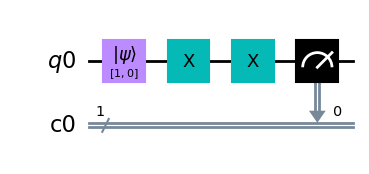

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.x(0)
qc.x(0)
qc.measure(qr[0],cr[0])
qc.draw('mpl', style = "clifford")

In [ ]:
# The result of 1000 measures of the qubit above gives the |0> state as result
#  in all measures
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=1000).result().get_counts()
results

{'0': 1000}

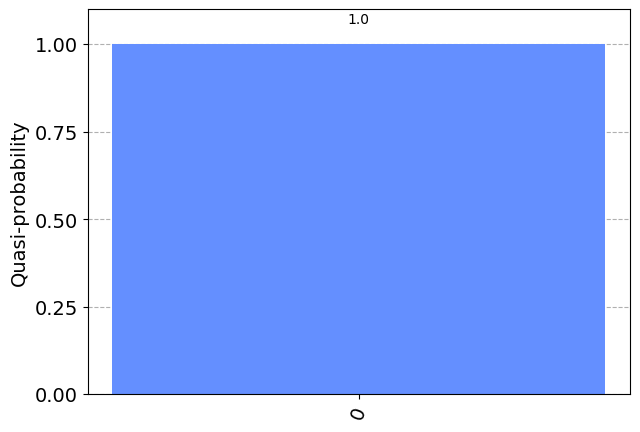

In [ ]:
qk.visualization.plot_distribution(results)

##### **Ex.3: Initialize a qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$ and present the results of 1.000 measures.**

Remember that a qubit when you're not looking at it, is like a coin that is still spinning. The state that this qubit is, can be represented by $|\psi\rangle = a|0\rangle + b|1\rangle$, with $|a|^2+|b|^2=1$. $a$ and $b$ are the probabilities amplitudes of each base state that form the total $|\psi\rangle$ state. $|a|^2$ and $|b|^2$ are the probabilities of measuring the associated base states $|0\rangle$ and $|1\rangle$ respectively. Since $a^2 = \left\vert\frac{1}{\sqrt{2}}\right\vert^2 = \frac{1}{2}$ the probability of measuring $|0\rangle$ is 50% (the same for $|1\rangle$). Therefore in this example, if we execute 10.000 measures we expect to see aproximately 5.000 measures of the $|0\rangle$ and 5.000 measures of the $|1\rangle$ base states respectively. The circuit below depicts this experiment.

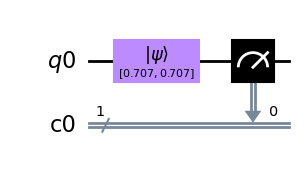

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([2**-0.5,2**-0.5],0)
qc.measure(qr[0],cr[0])
qc.draw('mpl', style = "clifford")

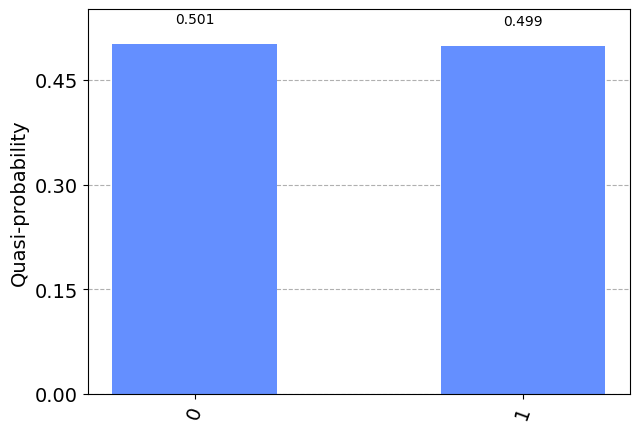

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,backend,shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

The process of initializing the qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$ could also have been acomplished using another gate. This gate would receive a qubit in the state $|0\rangle$ and output the state $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$. Which gate is that?

This is the Hadamard gate. Call it $H$. $H = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\ 1 & -1 \end{bmatrix}$. Indeed, if we calculate $H.|0\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}.\begin{bmatrix} 1 \\ 0  \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$.

Let's deploy this operation first in numpy ...

In [ ]:
import numpy as np
v0 = np.array([[1,0]]).T; v0

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2); H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
H.dot(v0)

array([[0.707],
       [0.707]])

... and then through a quantum circuit. As you can see, the histogram of measurements is the same.

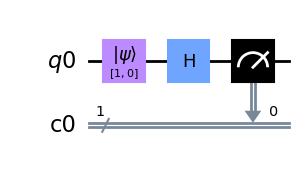

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.h(qr[0])
qc.measure(qr[0],cr[0])
qc.draw('mpl', style = "clifford")

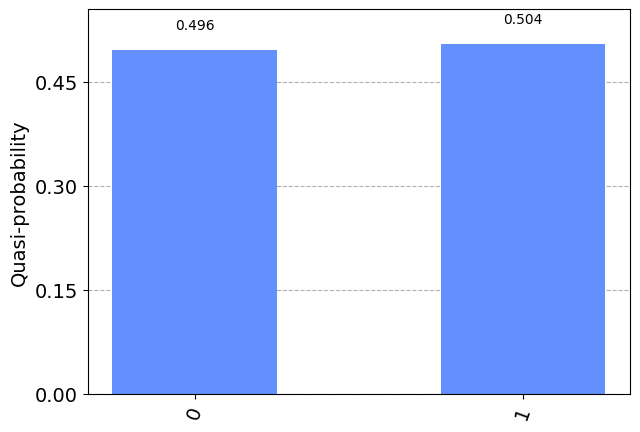

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, backend, shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

##### **Ex.4: Initialize a qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$ and present the results of 1.000 measures.**

Remember when we defined our qubit's superposition state and said that the probabilities amplitudes $a$ and $b$ could also be any complex number? What about if b is a negative number, like -1? What would we measure if the qubit state was defined by $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$? In terms of base states counting in 10.000 measures the answer is: the same result, because $\left\vert -\frac{1}{\sqrt{2}} \right\vert^2 = \frac{1}{2}$. Let's create a quantum circuit and check this result.

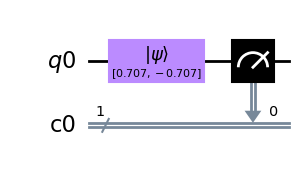

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([2**-0.5,-(2**-0.5)],0)
qc.measure(qr[0],cr[0])
qc.draw('mpl', style = "clifford")

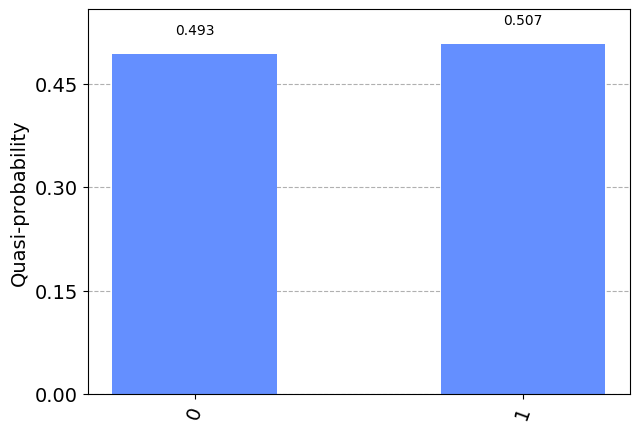

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,backend,shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

Now let's make another experiment. We start with the qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$. We then pass it through an H gate and them we measure it. What's going to be the result? Let's create the new circuit, get the result and try understanding it.

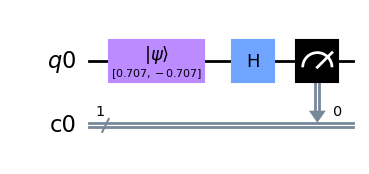

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([2**-0.5,-(2**-0.5)],0)
qc.h(0)
qc.measure(qr[0],cr[0])
qc.draw('mpl', style = 'clifford')

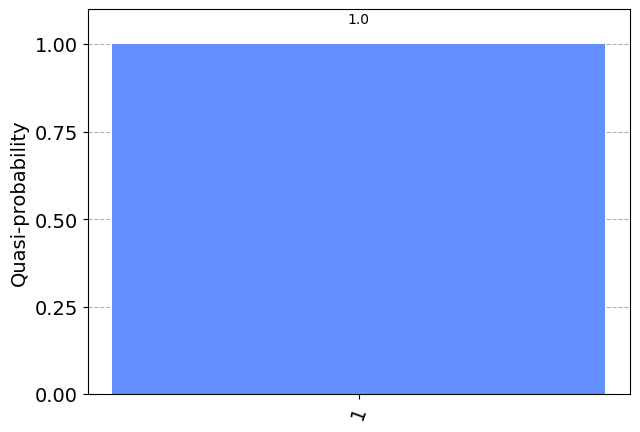

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

Interesting. The resulting state is $|\psi\rangle = |1\rangle$ This means that if we start with the qubit in the state $|1\rangle$ pass it through an H gate twice we will get back to 1. Let's create another circuit to check our understanding once more.

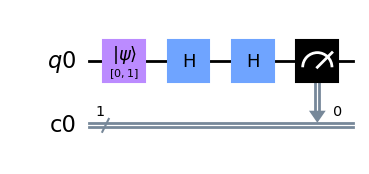

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([0,1],0)
qc.h(0)
qc.h(0)
qc.measure(qr[0],cr[0])
qc.draw('mpl', style = 'clifford')

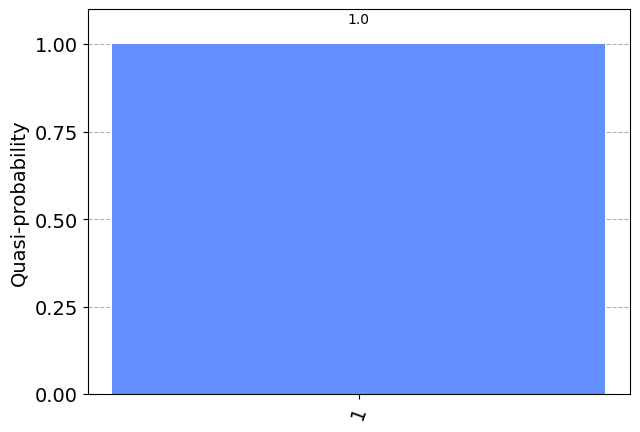

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

As a final step in our understanding, let's check the results using only matrices via `numpy`.

In [ ]:
import numpy as np

# First let's start with the qubit in the state |psi> = (|0> - |1>)/sqrt(2)
psi = np.array([[1,-1]]).T/(2**0.5); psi

array([[ 0.707],
       [-0.707]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5; H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# Now let's pass the qubit Psi through an Hadamard gate.
# The result is a qubit in the state |1>
H.dot(psi)

array([[0.],
       [1.]])

In [ ]:
# Let's start with a qubit in the state |1>, pass it through a
#  a hadamard gate twice and check the result
v0 = np.array([[0,1]]).T; v0

array([[0],
       [1]])

In [ ]:
H.dot(H).dot(v0)

array([[-0.],
       [ 1.]])

In [ ]:
# This means that if we multiply the H gate by itself the result
#  will be an Identity matrix. Let's check it.
H.dot(H)

array([[ 1., -0.],
       [-0.,  1.]])

##### **Ex.5: Start with two qubits, each one in the state $|0\rangle$ and measure the results. Check the answer through matrices operations**

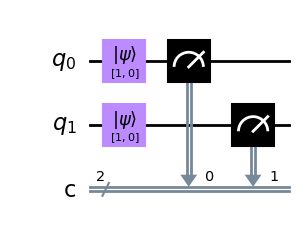

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.measure(qr,cr)
qc.draw('mpl', style = "clifford")

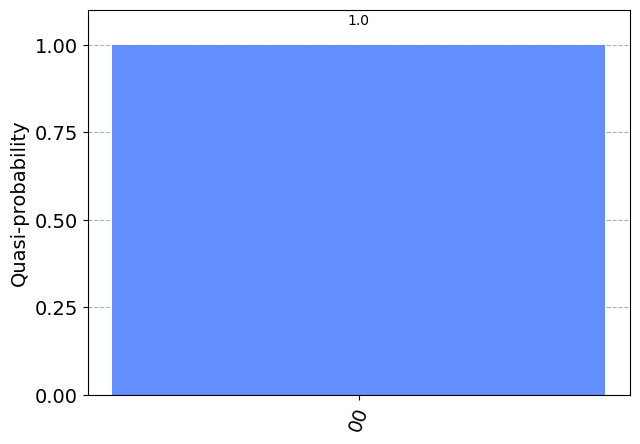

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,backend,shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

Notice that the result now is the state $|00\rangle$. This means that the two qubits are in a composite state. The representation of this state is: $|\psi\rangle = a|00\rangle + b|00\rangle + c|00\rangle + d|00\rangle$ where $\left.\vert a \right.\vert^2+\left.\vert b \right.\vert^2+\left.\vert c \right.\vert^2+\left.\vert d \right.\vert^2=1$. Let's check this using matrices.

The first qubit can be represented by $|\psi_1\rangle = a_1|0\rangle + b_1|1\rangle$. The second qubit by: $|\psi_2\rangle = a_2|0\rangle + b_2|1\rangle$. The resulting qubit in the circuit input will be the result of an operation called *tensor product*.

This operation will be executed with the qubits $|\psi_1\rangle$ and $|\psi_2\rangle$. It is represented by: $|\psi_3\rangle = |\psi_1\rangle \otimes |\psi_2\rangle$.

The algebra behind this operation is this:

$$|\psi_3\rangle = |\psi_1\rangle \otimes |\psi_2\rangle$$

$$ = (a_1|0\rangle+b_1|1\rangle) \otimes (a_2|0\rangle+b_2|1\rangle)$$

$$ = a_1a_2|0\rangle|0\rangle + a_1b_2|0\rangle|1\rangle + b_1a_2|1\rangle|0\rangle + b_1b_2|1\rangle|1\rangle$$

$$ = a_1a_2|00\rangle + a_1b_2|01\rangle + b_1a_2|10\rangle + b_1b_2|11\rangle$$

From a matrix standpoint the operation is done like below:

$$ |\psi_3\rangle = |\psi_1\rangle \otimes |\psi_2\rangle = \begin{bmatrix} a_1 \\ b_1 \end{bmatrix} \otimes \begin{bmatrix} a_2 \\ b_2 \end{bmatrix} =  \begin{bmatrix} a_1a_2 \\ a_1b_2 \\ b_1a_2 \\ b_1a_2 \end{bmatrix}  $$

Using the numbers in this example we get:

$$|\psi_3\rangle = |\psi_1\rangle \otimes |\psi_2\rangle$$

$$ = (1|0\rangle+0|1\rangle) \otimes (1|0\rangle+0|1\rangle)$$

$$ = 1|0\rangle|0\rangle + 0|0\rangle|1\rangle + 0|1\rangle|0\rangle + 0|1\rangle|1\rangle$$

$$ = 1|00\rangle + 0|01\rangle + 0|10\rangle + 0|11\rangle$$

And the equivalent matrix operation is:

$$ |\psi_3\rangle = |\psi_1\rangle \otimes |\psi_2\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix} =  \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}  $$

From the two operations above (algebraic and matrix) we can see that:

$$1|00\rangle + 0|01\rangle + 0|10\rangle + 0|11\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

Lastly, let's check these results with Python

In [ ]:
import numpy as np
psi1 = np.array([[1,0]]).T; psi1

array([[1],
       [0]])

In [ ]:
psi2 = np.array([[1,0]]).T; psi2

array([[1],
       [0]])

In [ ]:
# In numpy the tensor product is calculated with the function kron
np.kron(psi1,psi2)

array([[1],
       [0],
       [0],
       [0]])

##### **Ex.6: Suppose $|+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$. Start two qubits in the state $|+\rangle$, measure the results and check them through matrix operations**

To put a qubit in the state $|+\rangle$ we can either initialize the qubit in it or we can initialize the qubit in the state $|0\rangle$ and pass it through a Hadamard gate. Let's use this second procedure from now on.

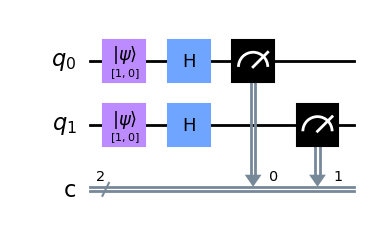

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.h(1)
qc.measure(qr,cr)
qc.draw('mpl', style = "clifford")

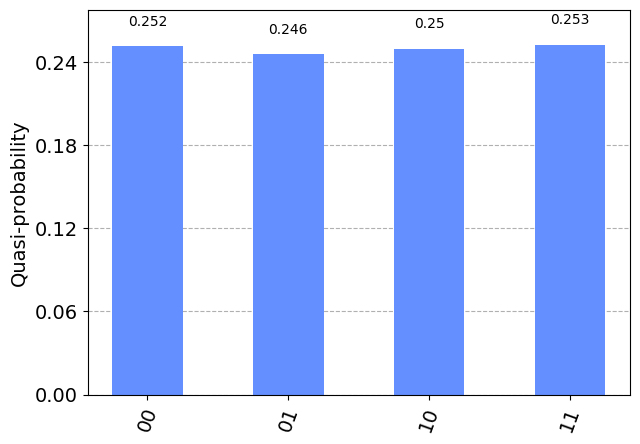

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,backend,shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

It seems the resulting state is $|\psi\rangle = \frac{1}{2}|00\rangle + \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle$. This happens because each state appears in the result 25% ($\frac{1}{4}$) of the time. Since the probability is equal to the state coeficient squared, $a=b=c=d=\frac{1}{2}$ and $|a|^2 = |b|^2 = |c|^2 = |d|^2 = \frac{1}{4}$. Let's confirm this idea through matrix operations.

In [ ]:
import numpy as np
psi1 = np.array([[1,0]]).T;psi1

array([[1],
       [0]])

In [ ]:
psi2 = np.array([[1,0]]).T;psi2

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# When we want to combine two vector states or gate matrices we tensor product them.
psi3 = np.kron(psi1,psi2);psi3

array([[1],
       [0],
       [0],
       [0]])

In [ ]:
H2 = np.kron(H,H);H2

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [ ]:
# When we want to pass a vetor through a gate we calculate the dot product
#  of the total gate matrix with the total vector.
# As we have predicted, the resulting vector state has a=b=c=d=1/2
psi4 = H2.dot(psi3); psi4

array([[0.5],
       [0.5],
       [0.5],
       [0.5]])

##### **Ex.7: Suppose $|-\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$. Start two qubits in the state $|-\rangle$, measure the results and check them through matrix operations**

To put a qubit in the state $|-\rangle$ we can either initialize the qubit in it or we can initialize the qubit in the state $|1\rangle$ and pass it through a Hadamard gate. Let's use this second procedure from now on.

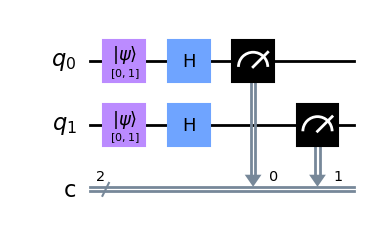

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([0,1],0)
qc.initialize([0,1],1)
qc.h(0)
qc.h(1)
qc.measure(qr,cr)
qc.draw('mpl', style = "clifford")

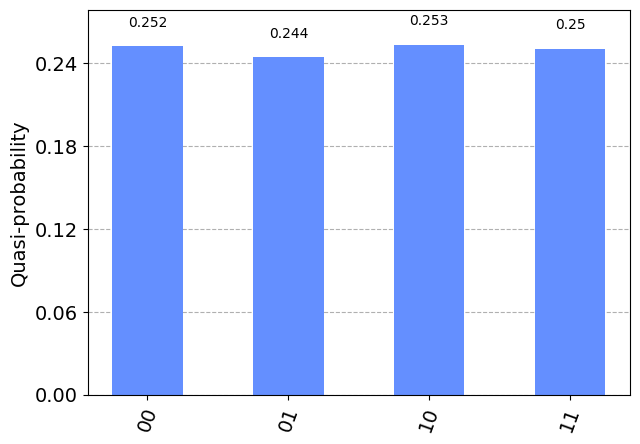

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,backend,shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

It seems the resulting state is similar to the one from the previous exercise. But remember that our probabilites are in fact $|a|^2 = |b|^2 = |c|^2 = |d|^2 = \frac{1}{4}$. We want to know $a, b, c$ and $d$. Since $|a|^2 = 1$, $a$ can be either $+1$ or $-1$. The same happens for $b,c$ and $d$. Let's see if we can predict the exact values of $a, b, c$ and $d$ through matrix operations.

In [ ]:
import numpy as np
psi1 = np.array([[0,1]]).T;psi1

array([[0],
       [1]])

In [ ]:
psi2 = np.array([[0,1]]).T;psi2

array([[0],
       [1]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# When we want to combine two vector states or gate matrices we tensor product them.
psi3 = np.kron(psi1,psi2);psi3

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
H2 = np.kron(H,H);H2

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [ ]:
# When we want to pass a vetor through a gate we calculate the dot product
#  of the total gate matrix with the total vector.
# As we have predicted, the resulting vector state has a=b=c=d=1/2
psi4 = H2.dot(psi3); psi4

array([[ 0.5],
       [-0.5],
       [-0.5],
       [ 0.5]])

From the calculations done above we can see that the resulting state in this example is: $|\psi_4\rangle = \frac{1}{2}|00\rangle - \frac{1}{2}|01\rangle - \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle$

##### **The CNOT gate**

The CNOT (Controle Not) is the most important two qubits gate. If the control bit (the first from the left) is 0, the slave bit (the second from the left) remains the same. If the control bit is 1 the slave bit is switched from 0 to 1 and vice-versa. Therefore $C|00\rangle = |00\rangle$, $C|01\rangle = |01\rangle$, $C|10\rangle = |11\rangle$ and $C|11\rangle = |10\rangle$.

Let's check these operations first with quantum circuits and confirm each one with matrices. We start checking $C|00\rangle = |00\rangle$.

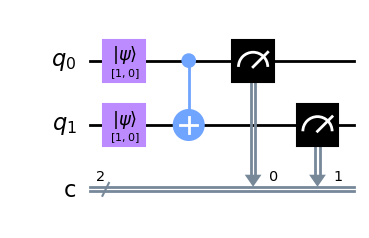

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.cx(0,1)
qc.measure(qr,cr)
qc.draw('mpl', style = "clifford")

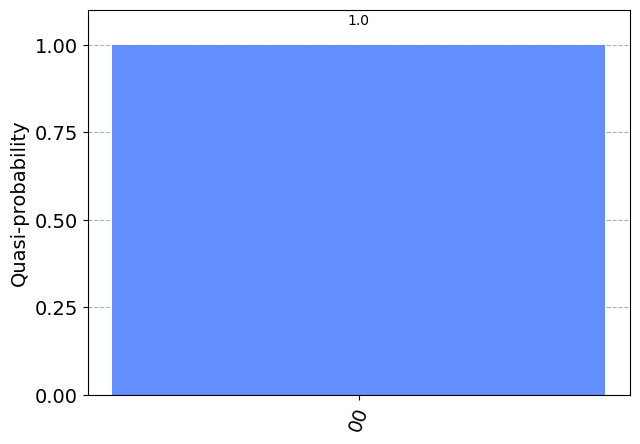

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, backend, shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

The CNOT gate can be described by the matrix $C = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}  $. Let's define this matrix in `numpy` and use it to check the results from the quantum circuit measurements.

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v00 = np.array([[1,0,0,0]]).T;v00

array([[1],
       [0],
       [0],
       [0]])

In [ ]:
# C.v00 = v00
C.dot(v00)

array([[1],
       [0],
       [0],
       [0]])

Now $C|01\rangle = |01\rangle$.

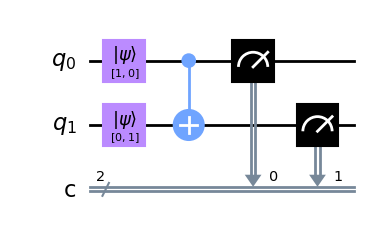

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([0,1],1)
qc.cx(0,1)
qc.measure(qr,cr)
qc.draw('mpl', style = 'clifford')

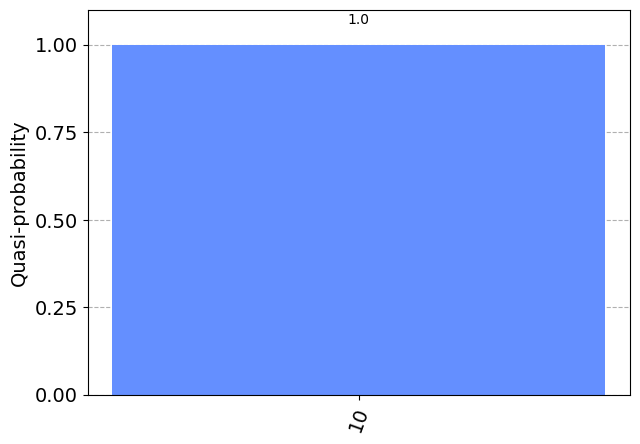

In [ ]:
# Please notice that Qiskit's qubits presentation order is reversed.
#  Therefore 10 in the histogram's x axis should be read as 01 (from
#  inside out or right to left).
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, backend, shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v01 = np.array([[0,1,0,0]]).T;v01

array([[0],
       [1],
       [0],
       [0]])

In [ ]:
# C.v01 = v01
C.dot(v01)

array([[0],
       [1],
       [0],
       [0]])

Now $C|10\rangle = |11\rangle$.

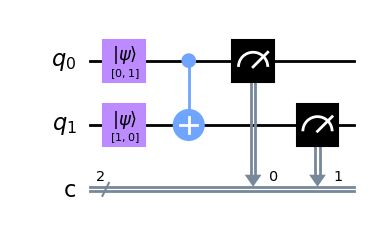

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([0,1],0)
qc.initialize([1,0],1)
qc.cx(0,1)
qc.measure(qr,cr)
qc.draw('mpl', style = 'clifford')

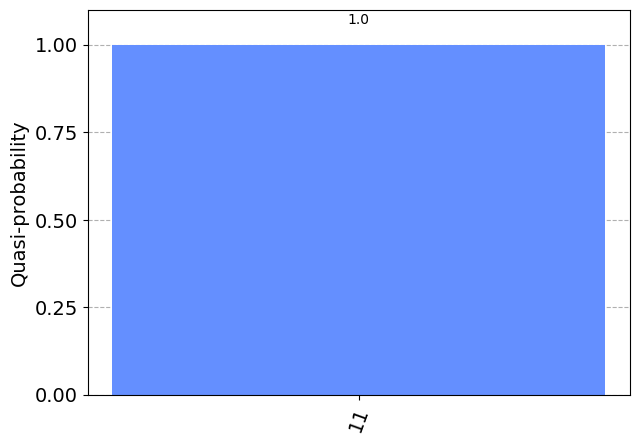

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, backend, shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v10 = np.array([[0,0,1,0]]).T; v10

array([[0],
       [0],
       [1],
       [0]])

In [ ]:
# C.v10 = v11
C.dot(v10)

array([[0],
       [0],
       [0],
       [1]])

And finally $C|11\rangle = |10\rangle$.

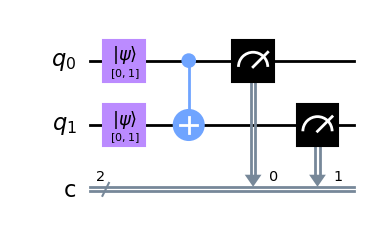

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([0,1],0)
qc.initialize([0,1],1)
qc.cx(0,1)
qc.measure(qr,cr)
qc.draw('mpl', style = 'clifford')

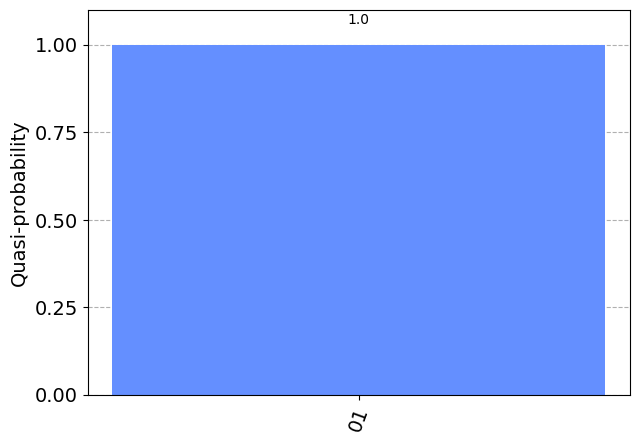

In [ ]:
# Again remember to read qiskit qubits state presentation order
#  from right to left. Therefore 01 in the x axis is in fact 10
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, backend, shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v11 = np.array([[0,0,0,1]]).T; v11

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
# C.v11 = v10
C.dot(v11)

array([[0],
       [0],
       [1],
       [0]])

##### **Ex.8: Entangled states. Put the first qubit in the $|+\rangle$ state and the second qubit in the $|0\rangle$ state. Passe them through a CNOT gate with the first qubit as control. Measure the results with a quantum circuit and confirm your measurements with matrix operations.**

Nosso circuito será composto de dois Qubits, os quais serão inicializados no estado $|{0}\rangle$. O primeiro Qubit passará por um Hadamart gate (colocando-o em sobreposição dos estados $|{0}\rangle$ e $|{1}\rangle$. Em seguida é aplicado um CNOT gate ao conjunto o que os colocará em entrelaçamento e sobreposição, nos estados $|{00}\rangle$ e $|{11}\rangle$. Por último medimos o estado de ambos os Qubits.

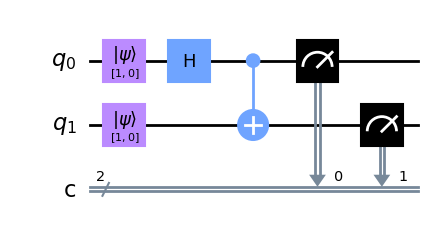

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(2, 'q')
cr = qk.ClassicalRegister(2, 'c')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.measure(qr, cr)
qc.draw('mpl', style = 'clifford')

Based on the measurements histogram below, it seems the resulting state is $|\psi\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$.

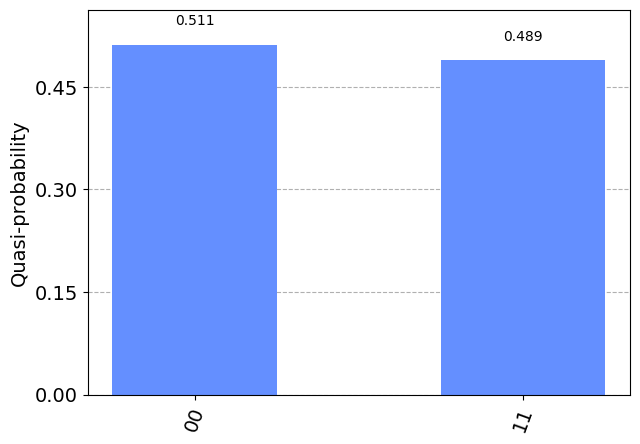

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,backend,shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

 Let's confirm this result with matrix calculations.

In [ ]:
import numpy as np
va = np.array([[1,0]]).T; va

array([[1],
       [0]])

In [ ]:
vb = np.array([[1,0]]).T; vb

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
vaH = H.dot(va); vaH

array([[0.707],
       [0.707]])

In [ ]:
vaHvb = np.kron(vaH,vb); vaHvb

array([[0.707],
       [0.   ],
       [0.707],
       [0.   ]])

In [ ]:
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
vout = C.dot(vaHvb); vout

array([[0.707],
       [0.   ],
       [0.   ],
       [0.707]])

##### **Ex.9: Entangled states. Put the first qubit in the $|-\rangle$ state and the second qubit in the $|0\rangle$ state. Passe them through a CNOT gate with the first qubit as control. Measure the results with a quantum circuit and confirm your measurements with matrix operations.**

Our circuit is made of two qubits. The first is initialized in the state $|1\rangle$ and the second in the state $|0\rangle$. The first qubit goes through a Hadamard gate (putting it in the superposition of $|0\rangle$ and $|1\rangle$. After that the two qubits go through a CNOT gate. The first qubit as control and the second as slave. The resulting state is a superposition of  $|00\rangle$ and $|11\rangle$. The circuit ends with a measure of the qubits.

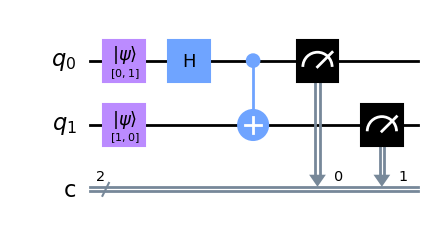

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(2, 'q')
cr = qk.ClassicalRegister(2, 'c')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([0,1],0)
qc.initialize([1,0],1)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.measure(qr, cr)
qc.draw('mpl', style = 'clifford')

Based on the measurements histogram below, it seems the resulting state is similar to the previous one. Since the control qubit was initialized in the state $|1\rangle$ the result should not be exactly equal. An option is $|1\rangle$ $|\psi\rangle = \frac{1}{\sqrt{2}}|00\rangle - \frac{1}{\sqrt{2}}|11\rangle$.

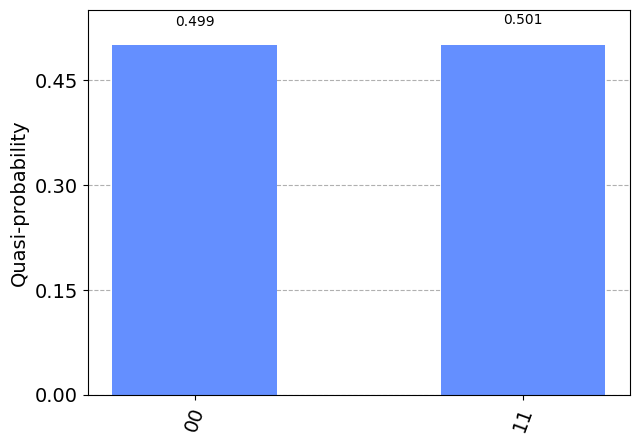

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,backend,shots=10000).result().get_counts()
qk.visualization.plot_distribution(results)

 Let's confirm this result with matrix operations.

In [ ]:
import numpy as np
va = np.array([[0,1]]).T; va

array([[0],
       [1]])

In [ ]:
vb = np.array([[1,0]]).T; vb

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
vaH = H.dot(va); vaH

array([[ 0.707],
       [-0.707]])

In [ ]:
vaHvb = np.kron(vaH,vb); vaHvb

array([[ 0.707],
       [ 0.   ],
       [-0.707],
       [-0.   ]])

In [ ]:
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
vout = C.dot(vaHvb); vout

array([[ 0.707],
       [ 0.   ],
       [ 0.   ],
       [-0.707]])

##### **Ex.10:Executing a circuit in a real IBM quantum computer**

First we must go to the website `https://quantum-computing.ibm.com`, register and get our API for python code. It is the "signature" for the IBM machines that the "job" was submitted by a registered user. For privacy reasons I'm using a Google Secret to load my `IBM_TOKEN` value in the notebook environment and then save the IBM account credentials for this session.

In [ ]:
# Get the IBM API key in: https://quantum-computing.ibm.com
# ibm_token is saved as a Google Secret in this notebook
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account(token=ibm_token, overwrite=True)

Now we create an `IBMProvider` object (named `provider`) and use this object to list the backends available for use.

In [ ]:
# Load the account in the active session
provider = IBMProvider(token=ibm_token,
                       instance='ibm-q-education/fgv-1/ml-business-app')
provider.backends()

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>]

The provider needs a backend (a machine). We will use the IBM simulator backend `ibmq_qasm_simulator`. Note that the simulator now runs in the cloud.

In [ ]:
backend = provider.get_backend("ibmq_qasm_simulator")
backend

<IBMBackend('ibmq_qasm_simulator')>

In this second example we are going to create a slightly different circuit. Let's generate a random number between 0 and 7. For this we need 3 Qubits. Each Qubit will randomly generate a number 0 or 1. At the end we combine the 3 1-digit binary numbers into a 3-digit binary number and convert it to decimal base. The circuit can be seen below.

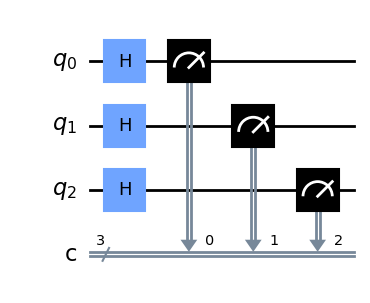

In [ ]:
# With n Qubits we can generate a random number from 0 to 2^n - 1
n = 3

qr = qk.QuantumRegister(n,'q')
cr = qk.ClassicalRegister(n,'c')
qc = qk.QuantumCircuit(qr, cr)

# Applying a Hadamard to each of the three qubits
for i in range(n):
  qc.h(qr[i])

# Measuring the three qubits
qc.measure(qr,cr)

# Visualizing the circuit
qc.draw('mpl', style='clifford')

The following command sends the request for a sample (a "shot") to the chosen backend (`ibmq_qasm_simulator`) through our provider (`provider`). If we look at our queue, in our account, on the site `https://quantum-computing.ibm.com` we will see that we have a *job* sent to the machine `ibmq_qasm_simulator`.

In [ ]:
# qk.execute envia para o backend. Conferindo no iqmq explorer aparece o job
new_job = qk.execute(qc, backend, shots=1)

After the code is executed, the result is returned in the same way as in local simulation via a python dictionary. Note that in the case of the simulation that generated this file, the machine returned `110:1`, ie a count (one measurement) and the result of this single measurement was the `000` state of the set of three qubits. Note that in this case each Qubit was overlapping only with itself, i.e. the Qubits were not intertwined with each other.

In [ ]:
# this result is stored on the local machine. However, it will only be available
# after the job has been executed. It returns a python dictionary.
new_job.result().get_counts()

{'110': 1}

The last step is to convert the dictionary binary key in a decimal number

In [ ]:
int(list(new_job.result().get_counts().keys())[0],2)

6

##### **Ex.11: Create, execute, simulate twice and print the counts results of a quantum circuit in the same cell.**

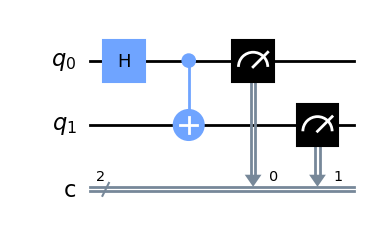

{'11': 502, '00': 498}
{'11': 472, '00': 528}


In [ ]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])
display(circuit.draw('mpl', style='clifford'))

backend = qk.Aer.get_backend('aer_simulator')
print(backend.run(circuit, shots=1000).result().get_counts())
print(backend.run(circuit, shots=1000).result().get_counts())

##### **Ex.12: Create, execute, simulate and present the counting result of a quantum circuit with three qubits in only one cell. Insert the measurement gates using a for loop.**

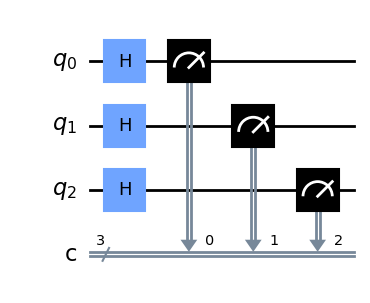

{'110': 117,
 '010': 107,
 '000': 119,
 '101': 129,
 '100': 139,
 '001': 133,
 '111': 130,
 '011': 126}

In [ ]:
from qiskit import QuantumCircuit
circuito = QuantumCircuit(3,3)
for i in range(3):
  circuito.h(i)
  circuito.measure(i,i)
display(circuito.draw('mpl', style='clifford'))

backend = qk.Aer.get_backend('aer_simulator')
backend.run(circuito, shots = 1000).result().get_counts()

##### **Ex.13: Create, execute, simulate and present the counting result of a quantum circuit with four qubits in only one cell. Insert the measurement gates using a python list.**

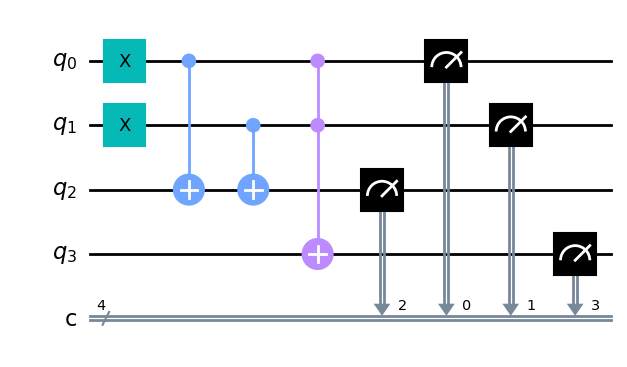

{'1011': 10000}

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(4,4)
qc.x([0,1])
qc.cx([0,1],[2,2])
qc.ccx(0,1,3)
qc.measure([0,1,2,3],[0,1,2,3])
display(qc.draw(output='mpl', style="clifford"))

backend = qk.Aer.get_backend('aer_simulator')
qk.execute(qc, backend, shots = 10000).result().get_counts()

##### **Ex.14:Create a circuit with one qubit, one bit, a NOT gate and a measure. Present the qubit state vector, the circuit transformation matrix before measurement and the histogram of 10.000 measurements.**

Circuit 1 - Registers Only


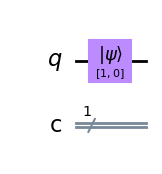

Circuit 1 - Quantum Register with a Gate X 


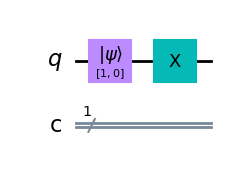

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(1,'q')
cr = qk.ClassicalRegister(1,'c')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)

print("Circuit 1 - Registers Only")
display(qc.draw('mpl', style="clifford"))
qc.x(qr)

print("Circuit 1 - Quantum Register with a Gate X ")
display(qc.draw('mpl', style="clifford"))

Quantum Register Vector State


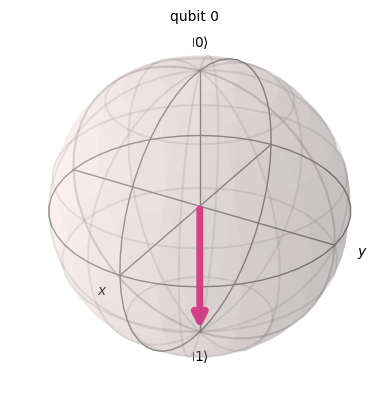

In [ ]:
job = qk.execute(experiments = qc,
                 backend = qk.Aer.get_backend('statevector_simulator'))
result = job.result().get_statevector()

print("Quantum Register Vector State")
from qiskit.tools.visualization import plot_bloch_multivector
display(plot_bloch_multivector(result))

In [ ]:
job = qk.execute(experiments = qc,
                 backend = qk.Aer.get_backend('unitary_simulator'))

#WARNING:qiskit_aer.backends.aerbackend:Simulation failed and returned the
#        following error message:
#ERROR:  [Experiment 0] Circuit circuit-293 contains invalid instructions
#        {"instructions": {save_unitary}} for "statevector" method.Circuit
#        circuit-293 contains invalid parameters  for "statevector" method.

#result = job.result().get_unitary()

print("Transformation Matrix (up to this stage)")
print(result)

ERROR:  [Experiment 0] Circuit circuit-319 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.Circuit circuit-319 contains invalid parameters  for "statevector" method.


Transformation Matrix (up to this stage)
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))



Circuit 1 - Registers, Gate X and Quantum Register Measure


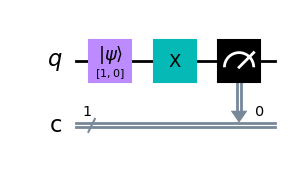

Quantum Register Thousand Measures
{'1': 1000}

Result's Histogram


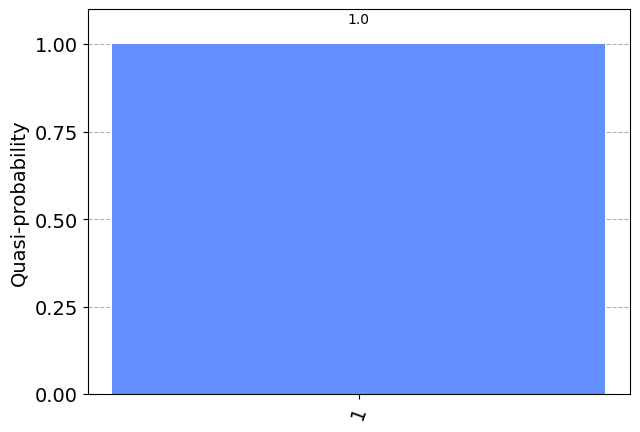

In [ ]:
qc.measure(qr, cr)
print()
print("Circuit 1 - Registers, Gate X and Quantum Register Measure")
display(qc.draw('mpl', style="clifford"))

print("Quantum Register Thousand Measures")
job = qk.execute(experiments = qc,
                 backend = qk.Aer.get_backend('statevector_simulator'),
                 shots = 1000)
print(job.result().get_counts())

print()
print("Result's Histogram")
from qiskit.tools.visualization import plot_distribution
plot_distribution(data = job.result().get_counts())

#### **Teleportation Circuit**

First let's create  a circuit with three qubits, three classical registers and initialize each qubit in the state $|0\rangle$. In this circuit we will focus our attention in the qubits's state vector. To do this we will use the class `Statevector`. We will also look at the bloch sphere of each qubit. The spheres will be presented in reverse order (for Qiskit) with the most significant bit on the left.

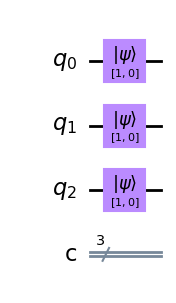

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


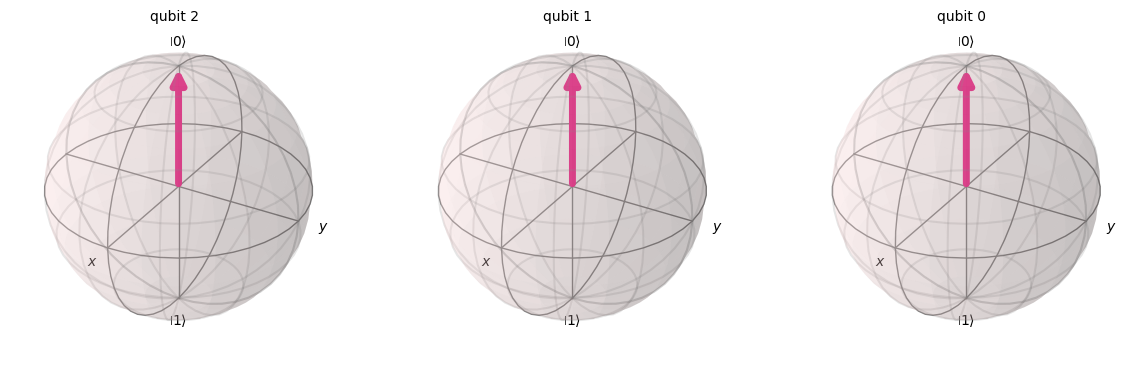

In [ ]:
import qiskit as qk
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
qr = qk.QuantumRegister(3,'q')
cr = qk.ClassicalRegister(3,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([1,0],2)
display(qc.draw('mpl', style="clifford"))

sv = Statevector.from_label('000')
state_data = lambda qc,sv: np.round(np.asarray(sv.evolve(qc).data),4)
state_bloch = lambda qc,sv: plot_bloch_multivector(sv.evolve(qc).data, reverse_bits=True)

print(state_data(qc,sv))
state_bloch(qc,sv)

Now, let's increase the circuit complexity by inserting an $X$ gate on qubit $q_0$ and a barrier. If you look at the vector state and theirs Bloch Spheres, you will notice that, as expected, qubit $q_0$ is now at state $|1\rangle$. And the trio is in state $|001\rangle$

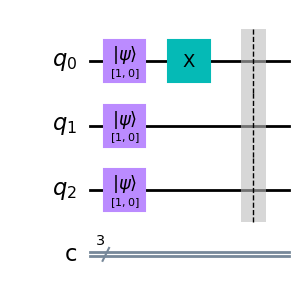

[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


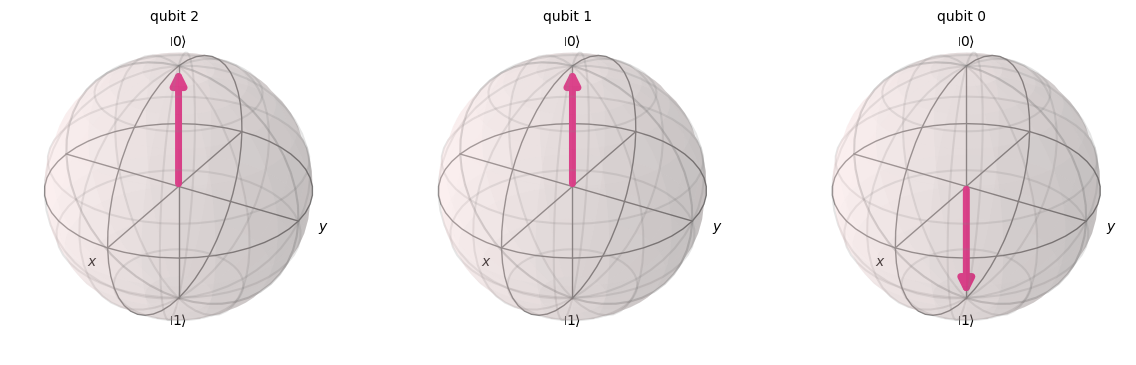

In [ ]:
qc.x(0)
qc.barrier()
display(qc.draw('mpl', style="clifford"))

print(state_data(qc,sv))
display(state_bloch(qc,sv))

Now, let's see what happens with the vector state and Bloch spheres if we put the qubit $q_1$ in the state $|+\rangle = \frac{1}{\sqrt{2}}\left( |0\rangle + |1\rangle \right)$. This is done, passing it through an Hadamard gate. The resulting state is $|\psi\rangle = \frac{1}{\sqrt{2}}\left( |001\rangle + |011\rangle \right)$

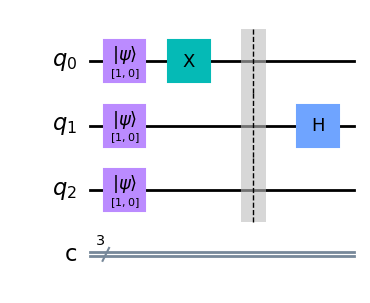

[0.   +0.j 0.707+0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j]


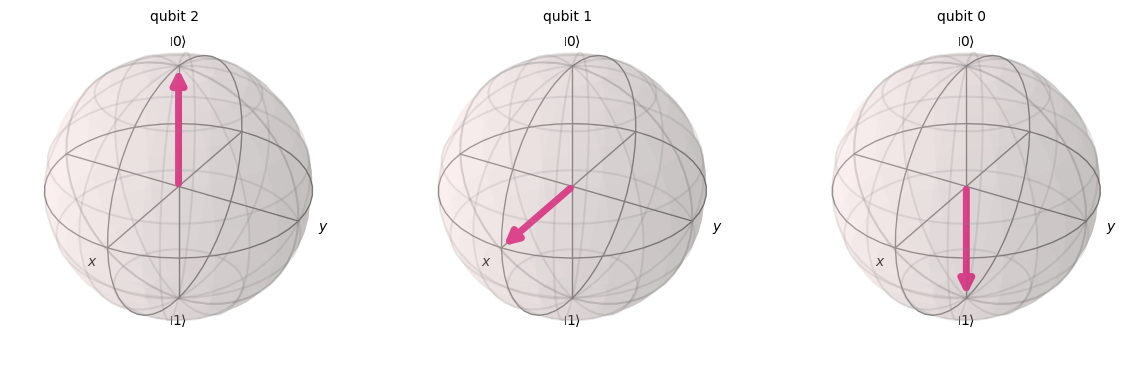

In [ ]:
qc.h(1)
display(qc.draw('mpl', style="clifford"))

print(state_data(qc,sv))
state_bloch(qc,sv)

Now, we will insert a CNOT gate with qubit 1 as master and qubit 2 as slave. This will entangle them in the state $|\psi\rangle = \frac{1}{\sqrt{2}}\left( |00\rangle + |11\rangle \right)$. The three qubits will be in the state $|\psi\rangle = \frac{1}{\sqrt{2}}\left( |001\rangle + |111\rangle \right)$. As expected, it is not possible anymore showing the individual state of qubits 1 and 2 individually. They form now an indivisible block which is in superposition of $|00\rangle$ and $|11\rangle$.

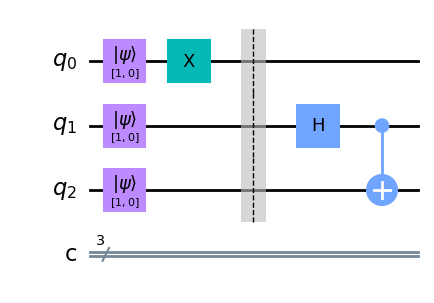

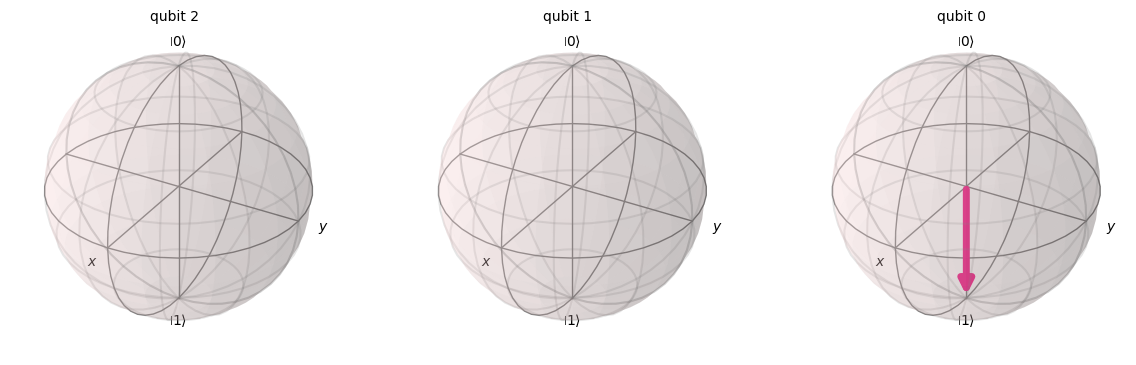

In [ ]:
qc.cx(1,2)
display(qc.draw("mpl", style="clifford"))

state_data(qc,sv)
state_bloch(qc,sv)

Let's now insert another CNOT gate. This time between qubits 0 (master) and 1 (slave) and check the results in the vector state. Now look at the result of applying a CNOT gate to $q_0$ (control) and $q_1$ (target). The initial state was $|q_2, q_1, q_0\rangle = |001\rangle$ and $|111\rangle$. The CNOT with control at $q_0$ inverts the state of $q_1$. This will output $|011\rangle$ and $|101\rangle$. The interesting thing here is that the state of one of the previously entangled qubits was changed, but this was not reflected in qubit $q_2$.

This is important. One can affect the state of one of the entangled qubits. This will not be reflected in the state of the 2nd qubit. Interlacing only "appears" when we take a measurement. This means that if we had made a measurement now, the entanglement between $q_1$ and $q_2$ would be manifested by states 01 and 10, the only ones that would appear in the output.

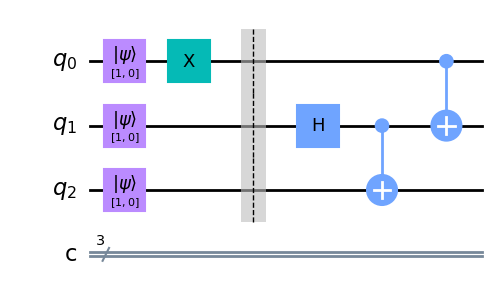

array([0.   +0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j, 0.   +0.j, 0.707+0.j,
       0.   +0.j, 0.   +0.j])

In [ ]:
qc.cx(0,1)
display(qc.draw('mpl', style="clifford"))
state_data(qc,sv)

Insertion of a Hadamard gate in $q_0$ and a barrier

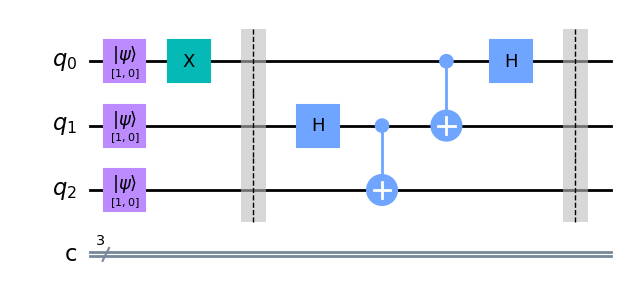

array([ 0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j,
        0. +0.j,  0. +0.j])

In [ ]:
qc.h(0)
qc.barrier()
display(qc.draw('mpl', style="clifford"))
state_data(qc,sv)

Two measures, one in $q_0$ and another in $q_1$, a barrier, a CNOT with $q_1$ as master and $q_2$ as slave, a Z gate between $q_0$ and $q_2$ and a measure in $q_2$. At the end of this stage, let's simulate the circuit and get it's counts.

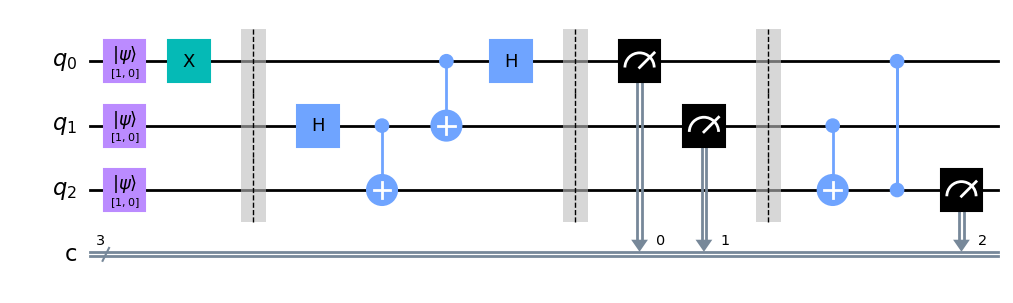

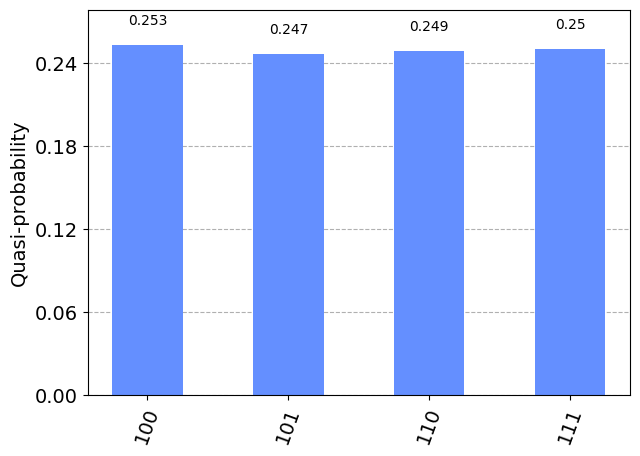

In [ ]:
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.cx(1,2)
qc.cz(0,2)
qc.measure(2,2)
display(qc.draw('mpl', style='clifford'))

simulador = qk.Aer.get_backend('statevector_simulator')
resultado = qk.execute(qc, simulador, shots=10000).result()
qk.visualization.plot_distribution(resultado.get_counts())

#### **Quantum Algorithms**

##### **Deustch Algorithm**

Let's try implementing the quantum algorithm of Deustch. In it, a quantum oracle gives the answer for this problem: A binary variable is a variable $x$ that can take one of two possible values $\{0,1\}$. $x'$ is the negation of the $x$ value. Therefore if $x=1$, $x'=0$ and vice versa.

A binary function with a binary input is a function that receives either 0 or 1 as input and gives back 0 or 1 as an answer. In other words it is a function $f(x)$ that maps $\{0,1\} \rightarrow \{0,1\}$. A function is *constant* if $f(0) = f(1)$ and *balanced* if $f(0) \neq f(1)$.

Suppose you have a classical computer and want to know, just by looking at the results, if $f(x)$ is *constant* or *balanced*. You will need to call $f(x)$ twice. In other words, you will need to check the results for $f(0)$ and $f(1)$.

##### **Deustch Algorithm Using Matrices and Diract Notation**

###### **Introduction**

Now let's try our luck with a quantum computer. Our function will be implemented by a circuit that receives as input $|x,y\rangle$ and gives back as output $|x,y \oplus f(x) \rangle$.





Let's first check the truth table of the XOR operation:
$\begin{array}{cc|c}
x&y&x \oplus y\\
\hline
0&0&0 \\
0&1&1 \\
1&0&1 \\
1&1&0
\end{array}$ Notice that if: $\begin{array}{c}
 \text{a) } y=0 \rightarrow x \oplus y = x\\
\text{and} \\
 \text{b) } y=1 \rightarrow x \oplus y = x'\\
\end{array}$

Now let's check a quantum circuit that will include the function below.

$$\begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&f(0) \\
0&1&0&f(0)' \\
1&0&1&f(1) \\
1&1&1&f(1)'
\end{array}$$


The first qubit is initialized in $|0\rangle$ and the second qubit in $|1\rangle$. This makes it a two qubit system in the state $|01\rangle$. In matrix notation: $\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$. Both qubits pass by $H$ gates. The $H$ matrix is: $\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$.

###### **The Matrix $H^{\otimes 2}$**

Two $H$ gates in parallel create another gate $H^{\otimes2} = H \otimes H = \frac{1}{2} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{bmatrix}$.

There's a trick to easily calculate an $H$ matrix of order $n$. Number the rows and the columns of the resulting matrix in binary order starting from 0. Now suppose that you have a row with number $01$ and a colum with number $11$. To decide if the corresponding number in the $H$ matrix is $+1$ or $-1$ you calculate $(-1)^p$.

In this example $p$ will be $0.1 \oplus 1.1 = 0 \oplus 1 = 1$. Therefore the number will be $-1$. In fact the number in the second row, fourth column of $H^{\otimes 2}$ is $-1$, as can be seen above. The same procedure can be used to quickly calculate each number in the corresponding $H$ matrix. Regarding the number that multiplies the matrix it is ${2^{-\frac{n}{2}}}$ where $n$ is the order of the $H$ matrix.

Therefore after passing through the $H$ gates the qubits have the following configuration: $= \frac{1}{2} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{bmatrix} . \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1 \\ -1 \\ 1 \\ -1 \end{bmatrix}$

###### **The Function $f(x)$**

Now let's think what happen when a two qubit system reaches the function and passes through it. The qubits have the following base states: $|00\rangle$, $|01\rangle$, $|10\rangle$ and $|11\rangle$ The first bit is $x$ and the second is $y$. The function gate transforms $|xy\rangle$ in $|x,y \oplus f(x)\rangle$.

Therefore $|00 \rangle$ becomes $|0,0 \oplus f(0)\rangle$. Remember that in a XOR gate if the first bit is $0$ the second one remains unchanged. Therefore $|00\rangle$ becomes in fact $|0,f(0)\rangle$ or $|0f_0\rangle$ for short. Also, if the first bit in a XOR is $1$, the second is inverted. Therefore $|01\rangle$ becomes $|0,1 \oplus f(0) \rangle$ which is in fact $|0, f'_0 \rangle$. By the same logic $|10\rangle$ becomes $|1f_1\rangle$ and $|11\rangle$ becomes $|1f'_1\rangle$

Applyting the signs in these qubits the state represented by the matrix $\frac{1}{2} \begin{bmatrix} 1 \\ -1 \\ 1 \\ -1 \end{bmatrix}$ we get: $|\psi\rangle = \frac{1}{2}[|0f_0\rangle - |0f'_0\rangle + |1f_1\rangle -|1f'_1\rangle]$

###### **Function $f(x)$ as a constant function**

Now let's consider the function $f$. If $f$ is constant, $f(0) = f(1)$ and $f'(0) = f'(1)$. Replacing this terms in the expression for $|\psi\rangle$ we get: $|\psi\rangle = \frac{1}{2}[|0f_0\rangle - |0f'_0\rangle+|1f_0\rangle - |1f'_0\rangle]$.

The qubits can be separated and $|\psi\rangle$ expressed by: $|\psi\rangle = \frac{1}{2}[|0\rangle(|f_0\rangle - |f'_0\rangle) + |1\rangle(|f_0\rangle - |f'_0\rangle) ]$ which is equivalent to $|\psi\rangle = [\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\frac{1}{\sqrt{2}}(|f_0\rangle - |f'_0\rangle)]$

Since the qubits can be expressed in a separate way, we can think of them as two entities. Now look at the first which is: $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$. If you pass this qubit again by a Hadamard gate you will get, always, a $|0\rangle$ state.

In fact: $\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}.\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$.

###### **Function $f(x)$ as a balanced function**

Now lets consider a function $f(x)$ which is balanced. In this case if $f(0) = 0$ then $f(1) = 1$ and if $f(0) = 1$ then $f(1) = 0$. In other words this means that $f(0) = f'(1)$ and $f(1) = f'(0)$.

Let's get back the state $|\psi\rangle = \frac{1}{2}[|0f_0\rangle - |0f'_0\rangle + |1f_1\rangle -|1f'_1\rangle]$ and replace $f_1$ and $f'_1$ with this schema.

We get $|\psi\rangle = \frac{1}{2}[|0f_0\rangle - |0f'_0\rangle + |1f'_0\rangle -|1f_0\rangle]$. Rearranging the terms: $|\psi\rangle = \frac{1}{\sqrt{2}}[(|0\rangle -|1\rangle)\frac{1}{\sqrt{2}}(|f_0\rangle - |f'_0\rangle) $

By the same logic applyed before, if you pass the first qubit through a Hadarmard gate you will always get a $|1\rangle$

In fact: $\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}.\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$.

Therefore you need to measure the qubit $x$ in the end of the circuit just ONCE to get a result that would need two measures in a classical computer. If the state is $|0\rangle$ the function is constant. If the state is $|1\rangle$ the function is balanced.

##### **Deustch Algorithm Using Only Matrices**

###### **Introduction**

This is easier to implement using numpy. First let's create our qubits $q_0$ and $q_1$

In [ ]:
import numpy as np
q0 = np.array([[1,0]]).T; q0

array([[1],
       [0]])

In [ ]:
q1 = np.array([[0,1]]).T; q1

array([[0],
       [1]])

And combine them using a tensor product to get the state $q_{01} = |01\rangle$. The tensor produtc in `numpy` is calculated using the function `np.kron`.

In [ ]:
q01 = np.kron(q0,q1); q01

array([[0],
       [1],
       [0],
       [0]])

###### **The Matrix $H^{\otimes 2}$**

Now let's create the Hadamard gate.

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2); H

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

Using a tensor product let's create a $H^{\otimes 2}$ gate.

In [ ]:
H2 = np.kron(H,H); H2

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

Now we calculate $H^{\otimes 2}.q_{01}$ and get:

In [ ]:
H2.dot(q01)

array([[ 0.5],
       [-0.5],
       [ 0.5],
       [-0.5]])

###### **First function $f(0) = f(1) = 0$**

Time to choose the functions $f(x)$. Since we are doing numeric simulations we will need to calculate the four possible results. Let's start with $f(0) = f(1) = 0$. This means that $f'(0) = f'(1) = 1$.

Our truth table shows the following input - output pairs:

$$\begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&f(0) \\
0&1&0&f(0)' \\
1&0&1&f(1) \\
1&1&1&f(1)'
\end{array} = \begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&0 \\
0&1&0&1 \\
1&0&1&0 \\
1&1&1&1
\end{array}$$

Notice that the same values in input columns $x$ and $y$ appear in the output columns $x$ and $f(x) \oplus y$. Therefore the input output matrix is just a four by four identity matrix $I_4$. The complete operation so far is $I_4.H^{\otimes 2}.q_{01}$

In [ ]:
I4 = np.eye(4); I4

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
I4.dot(H2).dot(q01)

array([[ 0.5],
       [-0.5],
       [ 0.5],
       [-0.5]])

The last operation is passing just the first qubit through another Hadamard gate, leaving the second qubit unchanged. This is equivalent of passing both qubits through a gate formed by the tensor product of an $H$ and a second order identity matrix $I_2$, in other words an $HI_2 = H \otimes I_2$ operator. Let's then first create the $HI_2$ operator.

In [ ]:
I2 = np.eye(2); I2

array([[1., 0.],
       [0., 1.]])

In [ ]:
HI2 = np.kron(H,I2); HI2

array([[ 0.70710678,  0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        ,  0.70710678],
       [ 0.70710678,  0.        , -0.70710678, -0.        ],
       [ 0.        ,  0.70710678, -0.        , -0.70710678]])

The last step therefore is the operation $HI_2.I_4.H^{\otimes 2}.q_{01}$.

As you can see below, the resulting matrix is $\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \\ 0 \\ 0 \end{bmatrix}$.

In Dirac's notation this qubit can be represented by $|\psi\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |01\rangle\right)$.

And it is easy to see that the first qubit is always in the state $|0\rangle$

In [ ]:
HI2.dot(I4).dot(H2).dot(q01)

array([[ 7.07106781e-01],
       [-7.07106781e-01],
       [ 2.29934717e-17],
       [-2.29934717e-17]])

###### **Second function $f(0) = f(1) = 1$**

Let's reuse most of what we develop above to test the next possible function. The resulting qubit was calculated by the expression $HI_2.I_4.H^{\otimes 2}.q_{01}$. In it, $I_4$ was the function itself.  

Therefore we could say that the resulting expression is $HI_2.F.H^{\otimes 2}.q_{01}$ where $F$ will be the equivalent function, which will have to be developed on a case by case basis.

Let's look at the truth table when $f(0) = f(1) = 1$ and $f'(0) = f'(1) = 0$. The truth table is:

$$\begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&f(0) \\
0&1&0&f(0)' \\
1&0&1&f(1) \\
1&1&1&f(1)'
\end{array} = \begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&1 \\
0&1&0&0 \\
1&0&1&1 \\
1&1&1&0
\end{array}$$

If you look at the truth table you will notice that the qubit $x$ remains the same and the qubit $y$ is inverted. This is equivalent of applying a NOT gate to the qubit $y$. Therefore the equivalent operatior in this case is $I_2X$ created by the tensor product between the matrices $I_2$ and $X$. In other words $I_2X = I_2 \otimes X$ The equivalent matrix can be seen below:

In [ ]:
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [ ]:
I2 = np.eye(2); I2

array([[1., 0.],
       [0., 1.]])

In [ ]:
I2X = np.kron(I2,X); I2X

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

Let's then calculate the expression $HI_2.I_2X.H^{\otimes 2}.q_{01}$ and analyze the resulting qubit.

As you can see below, the resulting matrix is $\frac{1}{\sqrt{2}}\begin{bmatrix} -1 \\ 1 \\ 0 \\ 0 \end{bmatrix}$.

In Dirac's notation this qubit can be represented by $|\psi\rangle = -\frac{1}{\sqrt{2}}\left(|00\rangle - |01\rangle\right)$.

And it is easy to see that the first qubit is always in the state $|0\rangle$

In [ ]:
HI2.dot(I2X).dot(H2).dot(q01)

array([[-7.07106781e-01],
       [ 7.07106781e-01],
       [-2.29934717e-17],
       [ 2.29934717e-17]])

###### **Third function $f(0) = 0, f(1) = 1$**

Let's return to the expression $HI_2.F.H^{\otimes 2}.q_{01}$ and calculate the equivalent matrix operation for another function $f(x)$.

In this example let's try $f(0) = 0$ and $f(1) = 1$ which implies that $f'(0) = 1$ and $f'(1) = 0$. The truth table is:

$$\begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&f(0) \\
0&1&0&f(0)' \\
1&0&1&f(1) \\
1&1&1&f(1)'
\end{array} = \begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&0 \\
0&1&0&1 \\
1&0&1&1 \\
1&1&1&0
\end{array}$$

Take a look at the last column of the truth table ($f(x) \oplus y$) and compare it with the $y$ column. If $x$ is $0$ then $f(x) \oplus y$ is $y$. If $x$ is $1$ then $f(x) \oplus y$ is $y'$. This is the CNOT gate. The qubit $x$ is the master and $y$ is the slave of it. The CNOT matrix is presented below.

In [ ]:
CNOT = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])
CNOT

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

The resulting qubit will be calculated with the expression: $HI_2.CNOT.H^{\otimes 2}.q_{01}$. The matriz representation of the qubit is: $\frac{1}{\sqrt{2}}\begin{bmatrix} 0 \\ 0 \\ 1 \\ -1 \end{bmatrix}$.

In Dirac's notation this qubit can be represented by $|\psi\rangle = \frac{1}{\sqrt{2}}\left(|10\rangle - |11\rangle\right)$.

And it is easy to see that the first qubit is always in the state $|1\rangle$

In [ ]:
HI2.dot(CNOT).dot(H2).dot(q01)

array([[ 2.29934717e-17],
       [-2.29934717e-17],
       [ 7.07106781e-01],
       [-7.07106781e-01]])

###### **Fourth function $f(0) = 1, f(1) = 0$**

Let's return to our expressing $HI_2.F.H^{\otimes 2}.q_{01}$

The last function is $f(0) = 1$ and $f(1) = 0$ which implies that $f'(0) = 0$ and $f'(1) = 1$. The truth table is:

$$\begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&f(0) \\
0&1&0&f(0)' \\
1&0&1&f(1) \\
1&1&1&f(1)'
\end{array} = \begin{array}{cc|cc}
x&y&x&f(x) \oplus y\\
\hline
0&0&0&1 \\
0&1&0&0 \\
1&0&1&0 \\
1&1&1&1
\end{array}$$

This function can be implemented if you apply a NOT (X) gate in the first qubit and then a CNOT on both. This is so, because if $x$ is 0, $f(x) \oplus y$ is $y'$ and if $x$ is 1, $f(x) \oplus y$ remains the same.

Since you first apply an $X$ gate to the first qubit, keeping the second the same, you need first to calculate the tensor product between  $X$ and $I_2$, in other words $XI_2 = X \otimes I_2$. After that you multiply this result by the $CNOT$ matrix. The function $F$ will be equal to $F= CNOT.(X \otimes I_2)$. (see below).

In [ ]:
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [ ]:
I2 = np.eye(2); I2

array([[1., 0.],
       [0., 1.]])

In [ ]:
XI2 = np.kron(X,I2); XI2

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
CNOT = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])
CNOT

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
CNOT.dot(XI2)

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

Voilá!. The resulting qubit has a matrix equals to: $\frac{1}{\sqrt{2}}\begin{bmatrix} 0 \\ 0 \\ 1 \\ -1 \end{bmatrix}$. This means that the first qubit is always $|1\rangle$ if the function is balanced.

In [ ]:
HI2.dot(CNOT).dot(XI2).dot(H2).dot(q01)

array([[-2.29934717e-17],
       [ 2.29934717e-17],
       [ 7.07106781e-01],
       [-7.07106781e-01]])

##### **Deusth Algorithm with Qiskit**

###### **First function: constant: $f(0)=0$, $f(1)=0$**

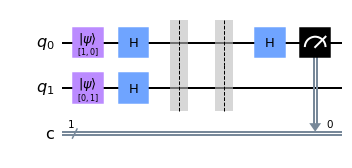

In [ ]:
import qiskit as qk
import numpy as np

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(1,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([0,1],1)
qc.h(0)
qc.h(1)

qc.barrier()

qc.barrier()

qc.h(0)
qc.measure(qr[0],cr[0])

qc.draw('mpl')

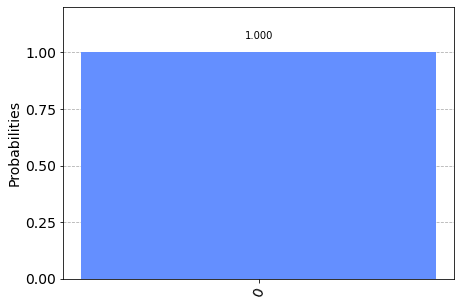

In [ ]:
simulator = qk.Aer.get_backend("statevector_simulator")
results = qk.execute(qc, simulator).result().get_counts()
qk.visualization.plot_histogram(results)

###### **Second function: constant: $f(0)=1$, $f(1)=1$**

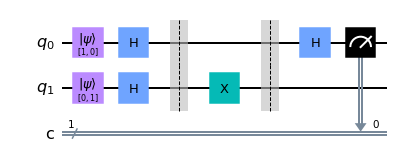

In [ ]:
import qiskit as qk
import numpy as np

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(1,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([0,1],1)
qc.h(0)
qc.h(1)

qc.barrier()
qc.x(1)
qc.barrier()

qc.h(0)
qc.measure(qr[0],cr[0])

qc.draw('mpl')

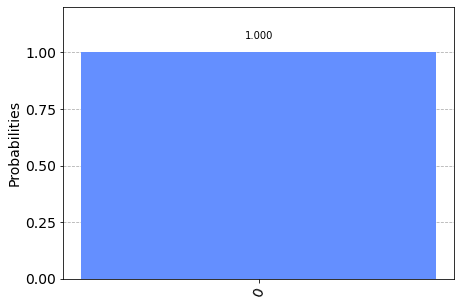

In [ ]:
simulator = qk.Aer.get_backend("statevector_simulator")
results = qk.execute(qc, simulator).result().get_counts()
qk.visualization.plot_histogram(results)

###### **Third function: balanced: $f(0)=0$, $f(1)=1$**

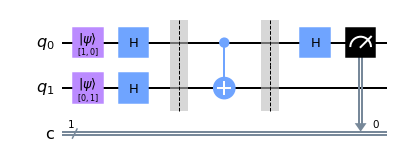

In [ ]:
import qiskit as qk
import numpy as np

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(1,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([0,1],1)
qc.h(0)
qc.h(1)

qc.barrier()
qc.cx(0,1)
qc.barrier()

qc.h(0)
qc.measure(qr[0],cr[0])

qc.draw('mpl')

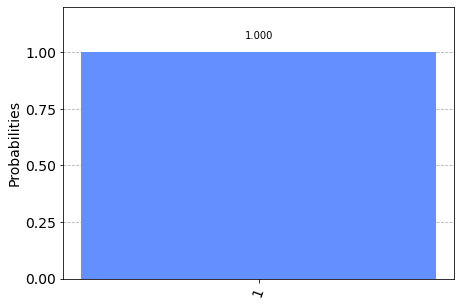

In [ ]:
simulator = qk.Aer.get_backend("statevector_simulator")
results = qk.execute(qc, simulator).result().get_counts()
qk.visualization.plot_histogram(results)

###### **Fourth function: balanced: $f(0)=1$, $f(1)=0$**

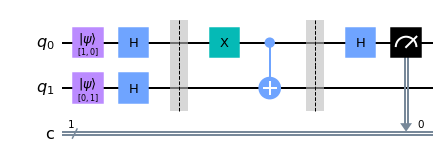

In [ ]:
import qiskit as qk
import numpy as np

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(1,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([0,1],1)
qc.h(0)
qc.h(1)

qc.barrier()
qc.x(0)
qc.cx(0,1)
qc.barrier()

qc.h(0)
qc.measure(qr[0],cr[0])

qc.draw('mpl')

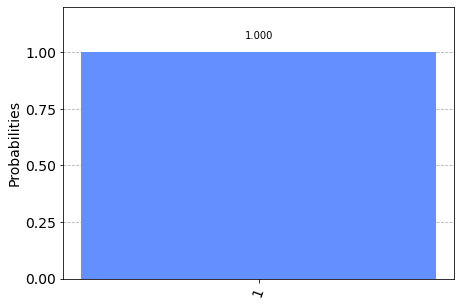

In [ ]:
simulator = qk.Aer.get_backend("statevector_simulator")
results = qk.execute(qc, simulator).result().get_counts()
qk.visualization.plot_histogram(results)

##### **Deustch-Josza Algorithm**

###### **Introduction**

In the Deustch-Josza algorithm the function $f(x)$ that you want to know if it is constant or balanced now has as inputs n bits and outputs one bit. Therefore it is a function from $\{0,1\}^n \rightarrow \{0,1\}$.

For simplicity, let's work with a function where $n=2$. This function will have four possible inputs, $00$, $01$, $10$, $11$. If all the function values are the same the function is called constant. For instance $f(00) = f(01) = f(10) = f(11) = 0$ or $f(00) = f(01) = f(10) = f(11) = 1$.

If exactly half the values are 0 and half are 1 the function is balanced. For instance $f(00) = f(01) = 1$ and $f(10) = f(11) = 0$.

If the function doesn't satisfy this criteria exactly, it is said to be neither constant nor balanced.

Now suppose that you are given a function with n possible bits as input and one bit as output. You are assured that it is either constant or balanced. In other words, you know that it is not "neither". How can you determine which option is true?

Since the function has $n$ bits as inputs it has $2^n$ different input values. In a classical setting, if the function is constant you would need to check at least ${\frac{2^n}{2}+1}$ inputs to be sure that it is constant. This is the worst case scenario.

###### **Function balanced $f(00) = f(01) = 0$ and $f(10) = f(11) = 1$**

Now let's try with a quantum computer. In the previous example we solved a similar problem with $n=1$. Here, let's try with $n=2$ qubits $x$ and one qubit $y$. The function to be evaluated is balanced with $f(00) = f(01) = 0$ and $f(10) = f(11) = 1$

To solve a problem quantumly you must have unitary transformations. Therefore the number of input qubits must be equal to the number of outputs. In other other words the transformation matrices that represent any gate or function must be squared.

Let's keep this in mind when implementing the two bit input funtion $f(x)$ above. This means that to get answers from this function $f(x)$ we will again resort to the same schema of the original Deustch algorithm. In it we implement a circuit that on $n$ inputs $|x\rangle$ and one qubit $|y\rangle$ we get as outputs $n$ qubits $|x\rangle$ and one qubit $|f(x) \oplus y \rangle$

Therefore our quantum circuit in this case will have a total of 3 input qubits (2 qubits $|x\rangle$ and 1 qubit $|y\rangle$). This means that if the qubit $|y\rangle$ is in the $|0\rangle$ state, $|f(x) \oplus y \rangle$ gives back $|f(x) \rangle$. If $|y\rangle$ is in the $|1\rangle$ state, $|f(x) \oplus y \rangle$ gives back $|f'(x)\rangle$.

Now suppose that we're representing our three input qubits as $|x_1 x_0 (y) \rangle$. The output qubits will be represented by $|x_1x_0(f(x) \oplus y)\rangle$. Since we have 3 input qubits there will be $2^3 = 8$ possible inputs and outputs. Lets now present the truth table for this circuit.

OBS: From now on we will present the truth tables with the qubits in the same order Qiskit presents them. You will notice that in the the truth table below, $y$ is put to the left. This makes easier to read the circuits.

$$\begin{array}{ccc|ccc}
y&x_1&x_0&f(x) \oplus y&x_1&x_0\\
\hline
0&0&0&f(00) = 0 &0&0 \\
0&0&1&f(01) = 0 &0&1 \\
0&1&0&f(10) = 1 &1&0 \\
0&1&1&f(11) = 1 &1&1 \\
1&0&0&f(00)' = 1 &0&0 \\
1&0&1&f(01)' = 1 &0&1 \\
1&1&0&f(10)' = 0 &1&0 \\
1&1&1&f(11)' = 0 &1&1 \\
\end{array}$$

Let's solve it first with Qiskit. If you look at the truth table above you will notice that if $x_1$ is $|0\rangle$, $|f(x) \oplus y \rangle$ is $|y\rangle$. If $x_1$ is $|1\rangle$, $|f(x) \oplus y \rangle$ is $|y'\rangle$ ($y$ inverted). Therefore this function can be represented by a CNOT gate with $x_1$ as master and $y$ as slave. The circuit below represents it.

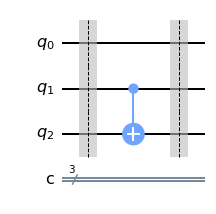

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(3,3)
qc.barrier()
qc.cnot(1,2)
qc.barrier()
qc.draw('mpl')

Now let's apply the same logic that was used to solve the Deustch algorithm in the previous section. This time we will initialize $q_0$ and $q_1$ (the $x$s qubits) in $|0\rangle$ and $q_2$ (the $y$ qubit) in $|1\rangle$. After that let's put $q_2$ and $q_1$ and $q_0$ in a superposition state (passing both through Hadamard's gates). Following that let's apply the function and at the other side of it, another pair of Hadamard's gates on $q_1$ and $q_0$. The circuit ends with measurements on qubits $q_1$ and $q_0$.

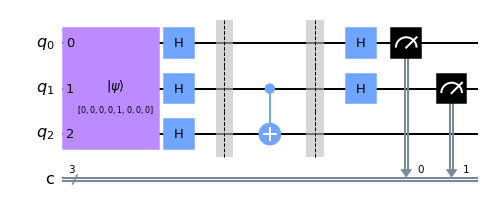

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(3,3)
qc.initialize([0,0,0,0,1,0,0,0],[0,1,2])

qc.h([0,1,2])

qc.barrier()
qc.cnot(1,2)
qc.barrier()

qc.h([0,1])

qc.measure([0,1],[0,1])
qc.draw('mpl')

This time to reduce typing, let's create a function that gets a quantum circuit and gives back its qubits's counting histogram.

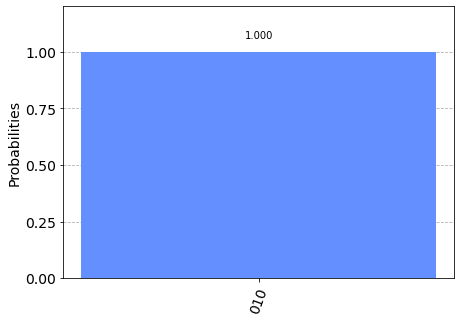

In [ ]:
def histograma(qc):
  import qiskit as qk
  from qiskit.visualization import plot_histogram
  simulador = qk.Aer.get_backend('statevector_simulator')
  results = qk.execute(qc,simulador,shots=10000).result().get_counts()
  grafico = plot_histogram(results)
  return(grafico)

histograma(qc)

Promising! This is so because qubits $x_1$ and $x_0$ are always in the state $|10\rangle$. Therefore you could look at them (two measures) and infer that $f$ is balanced from this result.

Let's confirm this result using Dirac's notation. Remember, according to our circuit convention above the final qubits's states are: $|y\rangle = 0$, $|x_1\rangle = 1$ and $|x_0\rangle = 0$. This is important because below it will be used algebra's standard notation, so the matrices must be adjusted to produce results similar to Qiskit's.

The qubits are $|yx_1x_0\rangle$ initialized in the state $|\psi_0\rangle = |100\rangle$. In matrix notation, as line vectors to reduce printing space, they are represented as:

In [ ]:
import numpy as np
x1 = np.array([[1,0]]).T
x0 = np.array([[1,0]]).T
y  = np.array([[0,1]]).T
psi0 = np.kron(y,np.kron(x1,x0)); psi0.T

array([[0, 0, 0, 0, 1, 0, 0, 0]])

After that they pass through Hadamard gates which put them in a superposition state and become the state $|\psi_1\rangle$. Since there are three qubits, to represent this operation you need to create an $H^{\otimes 3}$ matrix. Remember that $H^{\otimes 3} = H \otimes H \otimes H$. The qubits order here is not important

In [ ]:
import numpy as np
H = np.array([[1, 1],
              [1,-1]])/np.sqrt(2)
H3 = np.kron(H,np.kron(H,H)); np.round(H3,3)

array([[ 0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354],
       [ 0.354, -0.354,  0.354, -0.354,  0.354, -0.354,  0.354, -0.354],
       [ 0.354,  0.354, -0.354, -0.354,  0.354,  0.354, -0.354, -0.354],
       [ 0.354, -0.354, -0.354,  0.354,  0.354, -0.354, -0.354,  0.354],
       [ 0.354,  0.354,  0.354,  0.354, -0.354, -0.354, -0.354, -0.354],
       [ 0.354, -0.354,  0.354, -0.354, -0.354,  0.354, -0.354,  0.354],
       [ 0.354,  0.354, -0.354, -0.354, -0.354, -0.354,  0.354,  0.354],
       [ 0.354, -0.354, -0.354,  0.354, -0.354,  0.354,  0.354, -0.354]])

Passing the qubits by this $H^{\otimes 3}$ matrix is the same as calculating $H^{\otimes 3}.|1.00\rangle$, which gives as a result:

In [ ]:
psi0 = np.array([[0,0,0,0,1,0,0,0]]).T
psi1 = H3.dot(psi0); psi1.T

array([[ 0.354,  0.354,  0.354,  0.354, -0.354, -0.354, -0.354, -0.354]])

The state now is $|\psi_1\rangle = |y.x_1x_0\rangle = \frac{1}{2\sqrt{2}} \left(|0.00\rangle + |0.01\rangle + |0.10\rangle + |0.11\rangle - |1.00\rangle - |1.01\rangle - |1.10\rangle - |1.11\rangle \right)$

Now remember, if $y=0$ then $f(x) \oplus y = f(x)$. If $y=1$ then $f(x) \oplus y = f'(x)$. Just to be clear $f'(x)$ is the negation of $f(x)$ which is a binary function. Now let's replace $f(x) \oplus y$ by $f(x)$ or $f'(x)$ in the expression above. This will be the same as passing $|\psi_1\rangle$ by the unknown quantum circuit.

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|f(00).00\rangle + |f(01).01\rangle + |f(10).10\rangle + |f(11).11\rangle - |f'(00).00\rangle -|f'(01).01\rangle - |f'(10).10\rangle -|f'(11).11\rangle \right)$

Our function now is balanced. It is $f(00) = f(01)$ and $f(10) = f(11)$. In this case $f'(00) = f'(01) = f(10) = f(11)$. Replacing the terms in the above expression and making it dependent only on $f(00)$ and $f'(00)$ we have:

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|f(00).00\rangle + |f(00).01\rangle + |f'(00).10\rangle + |f'(00).11\rangle - |f'(00).00\rangle - |f'(00).01\rangle -|f(00).10\rangle - |f(00).11\rangle \right)$

To get the same results using matrices we need first to develop the operators for an identity and a CNOT. Our qubits are in the state $|y.x_1x_0\rangle$. We want to pass $x_1$ and $y$ by a CNOT with $x_1$ as master and $y$ as slave. $x_0$ will remain the same. The truth table for this operator is presented below:

$$\begin{array}{cc|cc}
y&x_1&y&x_1\\
\hline
0&0&0&0 \\
0&1&1&1 \\
1&0&1&0 \\
1&1&0&1 \\
\end{array}$$

In [ ]:
CNOTsm = np.array([[1,0,0,0],
                   [0,0,0,1],
                   [0,0,1,0],
                   [0,1,0,0]])

Since $x0$ will remain the same, it is supposed to pass by an Identity matrix.

In [ ]:
I2 = np.array([[1,0],
               [0,1]])

The complete operator will be made by the tensor product between the CNOT with slave in the qubit on the left, master in the qubit on the right and an identity matrix applied to the third qubit.

In [ ]:
CNOTsm_I2 = np.kron(CNOTsm,I2)

The full set of operations so far is done by applying the first qubit in the state $|100\rangle$ to an $H^{\otimes 3}$ matrix and this result to our operator named CNOTsm_I2.

In [ ]:
psi0 = np.array([[0,0,0,0,1,0,0,0]]).T
CNOTsm_I2.dot(H3).dot(psi0).T

array([[ 0.354,  0.354, -0.354, -0.354, -0.354, -0.354,  0.354,  0.354]])

This is equivalent to: $|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|f(00).00\rangle + |f(00).01\rangle -|f(00).10\rangle - |f(00).11\rangle - |f'(00).00\rangle - |f'(00).01\rangle + |f'(00).10\rangle + |f'(00).11\rangle \right)$

Regrouping the terms:

$|\psi_2\rangle = \frac{1}{\sqrt{2}} \left(|f(00)\rangle - |f'(00)\rangle \right) . \frac{1}{2} \left(|00\rangle + |01\rangle - |10\rangle - |11\rangle \right)$

Passing the qubits $x_1$ and $x_0$ each one by a Hadamard gate we get as a result (always): $|10\rangle$. According to our notation this means that $x_1 = |1\rangle$ and $x_0 = |0\rangle$. This is in agreement with our results from Qiskit.

In [ ]:
psi = np.array([[1,1,-1,-1]]).T/2
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
H2.dot(psi)

array([[0.],
       [0.],
       [1.],
       [0.]])

###### **Function balanced $f(00) = f(10) = 0$ and $f(01) = f(11) = 1$**

The truth table can be seen below:

$$\begin{array}{ccc|ccc}
y&x_1&x_0&f(x) \oplus y&x_1&x_0\\
\hline
0&0&0&f(00) = 0 &0&0 \\
0&0&1&f(01) = 1 &0&1 \\
0&1&0&f(10) = 0 &1&0 \\
0&1&1&f(11) = 1 &1&1 \\
1&0&0&f(00)' = 1 &0&0 \\
1&0&1&f(01)' = 0 &0&1 \\
1&1&0&f(10)' = 1 &1&0 \\
1&1&1&f(11)' = 0 &1&1 \\
\end{array}$$

Note that in this example $f(x)$ is $y$ if $x_0$ is $|0\rangle$ and $y'$ if $x_0$ is $|1\rangle$. Therefore the function can be represented by a CNOT applied between $x_0$ as master and $y$ as slave. Let's create the circuit and measure it to analyze its results.

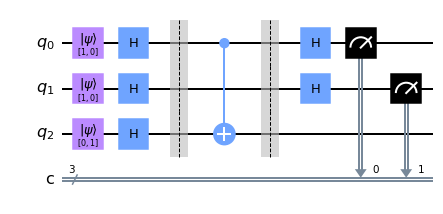

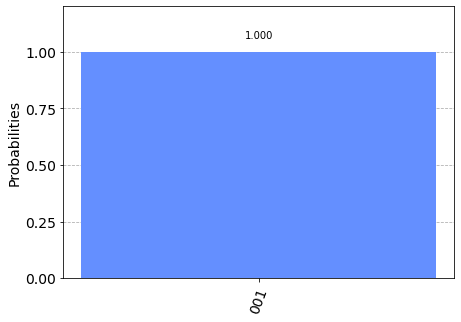

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(3,3)

qc.initialize([0,0,0,0,1,0,0,0],[0,1,2])
qc.h([0,1,2])

qc.barrier()
qc.cnot(0,2)
qc.barrier()

qc.h([0,1])

qc.measure([0,1],[0,1])
display(qc.draw('mpl'))
histograma(qc)

Excelent! If the measurements give as an answer for $x_1 = |0\rangle$ and $x_0 = |1\rangle$ we know the function will be balanced. Let's confirm our results using algebra (matrices and Dirac's notation).

Now let's make the appropriate matrices operations. Remember, our qubits are $|y.x_1x_0\rangle$ and they are initialized in $|1.00\rangle$

In [ ]:
import numpy as np
v0 = np.array([[0,0,0,0,1,0,0,0]]).T; v0.T

array([[0, 0, 0, 0, 1, 0, 0, 0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H); H3 = np.kron(H2,H)
H3.dot(v0).T

array([[ 0.354,  0.354,  0.354,  0.354, -0.354, -0.354, -0.354, -0.354]])

Let's get back to the state $\psi_2$ and look at another balanced function.

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|f(00).00\rangle + |f(01).01\rangle + |f(10).10\rangle + |f(11).11\rangle - |f'(00).00\rangle -|f'(01).01\rangle - |f'(10).10\rangle -|f'(11).11\rangle \right)$

Now $f(00) = f(10)$ and $f(01) = f(11)$. In this case $f'(00) = f'(10) = f(01) = f(11)$

Replace the appropriate values in the expression above we get:

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|f(00).00\rangle + |f'(00).01\rangle + |f(00).10\rangle + |f'(00).11\rangle - |f'(00).00\rangle -|f(00).01\rangle - |f'(00).10\rangle -|f(00).11\rangle \right)$

Putting the qubis in sequence:

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|f(00).00\rangle -|f(00).01\rangle  + |f(00).10\rangle -|f(00).11\rangle - |f'(00).00\rangle + |f'(00).01\rangle - |f'(00).10\rangle \right) + |f'(00).11\rangle$

To make an equivalent operation using matrices we need to create an operator (a matrix) for three qubits $|y.x_1x_0\rangle$ where $y$ is slave and $x_0$ is master, leaving $x_1$ the same. The truth table is the same function's truth table.

$$\begin{array}{ccc|ccc}
y&x_1&x_0&y&x_1&x_0\\
\hline
0&0&0&0&0&0 \\
0&0&1&1&0&1 \\
0&1&0&0&1&0 \\
0&1&1&1&1&1 \\
1&0&0&1&0&0 \\
1&0&1&0&0&1 \\
1&1&0&1&1&0 \\
1&1&1&0&1&1 \\
\end{array}$$

In [ ]:
CNOTs_I_m = np.array([[1,0,0,0,0,0,0,0],
                      [0,0,0,0,0,1,0,0],
                      [0,0,1,0,0,0,0,0],
                      [0,0,0,0,0,0,0,1],
                      [0,0,0,0,1,0,0,0],
                      [0,1,0,0,0,0,0,0],
                      [0,0,0,0,0,0,1,0],
                      [0,0,0,1,0,0,0,0]])

In [ ]:
v0 = np.array([[0,0,0,0,1,0,0,0]]).T
CNOTs_I_m.dot(H3).dot(v0).T

array([[ 0.354, -0.354,  0.354, -0.354, -0.354,  0.354, -0.354,  0.354]])

Regrouping the terms:

$|\psi_2\rangle = \frac{1}{\sqrt{2}} \left(|f(00)\rangle - |f'(00)\rangle \right).\frac{1}{2} \left(|00\rangle - |01\rangle + |10\rangle - |11\rangle \right)$

Passing the qubits $x_1$ and $x_0$ each one by a Hadamard gate we get as a result (always): $|01\rangle$. According to our algebraic notation this means $|x_1 \rangle = 0$ and $|x_0 \rangle = 1$. Again in agreement with our results from Qiskit.

In [ ]:
psi = np.array([[+1,-1,+1,-1]]).T/2
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
H2.dot(psi)

array([[0.],
       [1.],
       [0.],
       [0.]])

###### **Function balanced $f(00) = f(11) = 0$ and $f(01) = f(10) = 1$**

The truth table can be seen below.

$$\begin{array}{ccc|ccc}
y&x_1&x_0&f(x) \oplus y&x_1&x_0\\
\hline
0&0&0&f(00) = 0 &0&0 \\
0&0&1&f(01) = 1 &0&1 \\
0&1&0&f(10) = 1 &1&0 \\
0&1&1&f(11) = 0 &1&1 \\
1&0&0&f(00)'= 1 &0&0 \\
1&0&1&f(01)'= 0 &0&1 \\
1&1&0&f(10)'= 0 &1&0 \\
1&1&1&f(11)'= 1 &1&1 \\
\end{array}$$

Let's analyze each output. $x_0$ is the same as $x_0$ in the input. Note that in this example $f(x)$ is $y$ if $x_1 \oplus x_0$ is $|0\rangle$ and $y'$ if $x_1 \oplus x_0$ is $|1\rangle$. Therefore the function can be represented by a CNOT applied between $x_1 \oplus x_0$ as master and $y$ as slave. The implementation of the XOR between $x_1$ and $x_0$ is done by aplying a CNOT between $x_0$ and $x_1$ with $x_0$ as master and $x_1$ as slave. After that, $x_1$ must return to its original value, so we will pass both $x_0$ and $x_1$ by another CNOT gate. Check this for the table above.

Let's create the circuit and measure it to analyze its results.

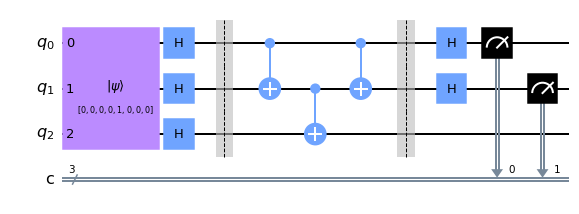

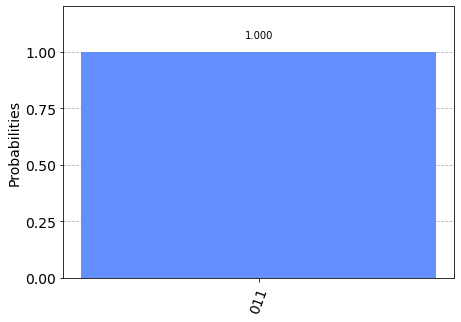

In [ ]:
import qiskit as qk
qc = qk.QuantumCircuit(3,3)
qc.initialize([0,0,0,0,1,0,0,0],[0,1,2])
qc.h([0,1,2])

qc.barrier()
qc.cnot(0,1)
qc.cnot(1,2)
qc.cnot(0,1)
qc.barrier()

qc.h([0,1])

qc.measure([0,1],[0,1])
display(qc.draw('mpl'))
histograma(qc)

Again, the result is always $|11\rangle$.

Let's make the same results appear by using matrices.

In [ ]:
v0 = np.array([[0,0,0,0,1,0,0,0]]).T
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H); H3 = np.kron(H2,H)
H3.dot(v0).T

array([[ 0.354,  0.354,  0.354,  0.354, -0.354, -0.354, -0.354, -0.354]])

The state now is $|\psi_1\rangle = |y.x_1x_0\rangle = \frac{1}{2\sqrt{2}} \left(|0.00\rangle + |0.01\rangle + |0.10\rangle + |0.11\rangle - |1.00\rangle - |1.01\rangle - |1.10\rangle - |1.11\rangle \right)$

Remember: when $y=0$, $f(x) \oplus y = f(x)$. When $y=1$, $f(x) \oplus y = f'(x)$

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|f(00).00\rangle + |f(01).01\rangle + |f(10).10\rangle + |f(11).11\rangle - |f'(00).00\rangle - |f'(01).01\rangle - |f'(10).10\rangle - |f'(11).11\rangle \right)$

Now $f(00) = f(11)$ and $f(01) = f(10)$. In this case $f'(00) = f'(11) = f(01) = f(10)$

Replace the appropriate values in the expression above and we get:

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|f(00).00\rangle + |f'(00).01\rangle + |f'(00).10\rangle + |f(00).11\rangle - |f'(00).00\rangle - |f(00).01\rangle - |f(00).10\rangle - |f'(00).11\rangle \right)$

Reordering the qubits:

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|f(00).00\rangle - |f(00).01\rangle - |f(00).10\rangle  + |f(00).11\rangle - |f'(00).00\rangle + |f'(00).01\rangle + |f'(00).10\rangle - |f'(00).11\rangle \right)$

Let's make this operation using matrices. The truth table for the function in this example is:

$$\begin{array}{ccc|ccc}
y&x_1&x_0&y&x_1&x_0\\
\hline
0&0&0&0&0&0 \\
0&0&1&1&0&1 \\
0&1&0&1&1&0 \\
0&1&1&0&1&1 \\
1&0&0&1&0&0 \\
1&0&1&0&0&1 \\
1&1&0&0&1&0 \\
1&1&1&1&1&1 \\
\end{array}$$

The associated matrix is:

In [ ]:
CNOT_CNOT = np.array([[1,0,0,0,0,0,0,0],
                      [0,0,0,0,0,1,0,0],
                      [0,0,0,0,0,0,1,0],
                      [0,0,0,1,0,0,0,0],
                      [0,0,0,0,1,0,0,0],
                      [0,1,0,0,0,0,0,0],
                      [0,0,1,0,0,0,0,0],
                      [0,0,0,0,0,0,0,1]])

In [ ]:
v0 = np.array([[0,0,0,0,1,0,0,0]]).T
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H); H3 = np.kron(H2,H)
CNOT_CNOT.dot(H3).dot(v0).T

array([[ 0.354, -0.354, -0.354,  0.354, -0.354,  0.354,  0.354, -0.354]])

Regrouping the terms:

$|\psi_2\rangle = \frac{1}{2} \left(|00\rangle - |01\rangle - |10\rangle + |11\rangle \right).\frac{1}{\sqrt{2}} \left(|f(00)\rangle - |f'(00)\rangle \right)$

Passing the qubits $x_1$ and $x_0$ each one by a Hadamard gate we get as a result (always): $|11\rangle$.  

In [ ]:
psi = np.array([[+1,-1,-1,+1]]).T/2
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
H2.dot(psi)

array([[0.],
       [0.],
       [0.],
       [1.]])

An interesting operation would be to check through matrices if, starting with qubits $|yx_1x_0\rangle$ in state $|100\rangle$ and passing it through the gates described in the circuit above, it would produce the same output. The order is this: 1st) Identity-Slave-Master, 2nd) Slave-Master-Identity, 3rd) Identity-Slave-Master.

In [ ]:
import numpy as np
CNOTsm = np.array([[1,0,0,0],
                   [0,0,0,1],
                   [0,0,1,0],
                   [0,1,0,0]])

I = np.array([[1,0],
              [0,1]])

ISM = np.kron(I,CNOTsm)
SMI = np.kron(CNOTsm,I)

H = np.array([[1, 1],
              [1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
H3 = np.kron(H2,H)

IH2 = np.kron(I,H2)

The resulting state is $|\psi_2\rangle = \frac{1}{\sqrt{2}}\left( |011\rangle - |111\rangle \right)$. This is the same as $|\psi_2\rangle = \frac{1}{\sqrt{2}}\left( |0\rangle - |1\rangle \right).|11\rangle$. This confirms Qiskit's and Dirac's notation results, since always $x_1=1$ and $x_0=1$.

In [ ]:
v0 = np.array([[0,0,0,0,1,0,0,0]]).T
IH2.dot(ISM).dot(SMI).dot(ISM).dot(H3).dot(v0).round(3)

array([[ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.707],
       [ 0.   ],
       [-0.   ],
       [ 0.   ],
       [-0.707]])

Another interesting thing to note is that operator got directly from the truth table is the same got from the three matrices above (please see below).

In [ ]:
CNOT_CNOT = np.array([[1,0,0,0,0,0,0,0],
                      [0,0,0,0,0,1,0,0],
                      [0,0,0,0,0,0,1,0],
                      [0,0,0,1,0,0,0,0],
                      [0,0,0,0,1,0,0,0],
                      [0,1,0,0,0,0,0,0],
                      [0,0,1,0,0,0,0,0],
                      [0,0,0,0,0,0,0,1]])

In [ ]:
ISM.dot(SMI).dot(ISM)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

###### **Function constant $f(00) = f(01) = f(10) = f(11) = 0$**

This function is constant. The truth table can be seen below.

$$\begin{array}{ccc|ccc}
y&x_1&x_0&f(x) \oplus y&x_1&x_0\\
\hline
0&0&0&f(00) = 0 &0&0 \\
0&0&1&f(01) = 0 &0&1 \\
0&1&0&f(10) = 0 &1&0 \\
0&1&1&f(11) = 0 &1&1 \\
1&0&0&f(00)'= 1 &0&0 \\
1&0&1&f(01)'= 1 &0&1 \\
1&1&0&f(10)'= 1 &1&0 \\
1&1&1&f(11)'= 1 &1&1 \\
\end{array}$$

$f(x)$ is just $y$. Let's create the circuit and measure it to analyze its results.

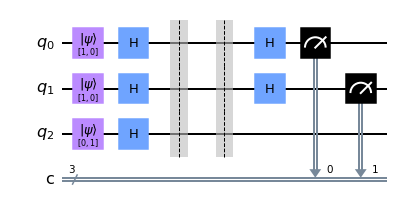

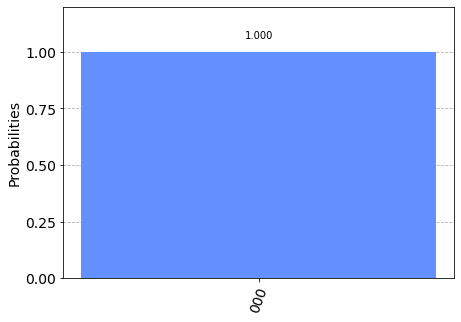

In [ ]:
import qiskit as qk
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

qr = qk.QuantumRegister(3,'q')
cr = qk.ClassicalRegister(3,'c')
qc = qk.QuantumCircuit(qr,cr)

qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([0,1],2)

qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()
qc.barrier()

qc.h(0)
qc.h(1)

qc.measure(0,0)
qc.measure(1,1)
display(qc.draw('mpl'))
histograma(qc)

Now the result is $|00\rangle$

Now let's confirm the above result using algebra. The function is constant. Therefore $f(00) = f(01) = f(10) = f(11)$ and consequently $f'(00) = f'(01) = f'(10) = f'(11)$. Let's replace this condition in the expression of $|\psi_2 \rangle$ and regroup the terms.

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|00.f(00)\rangle - |00.f'(00)\rangle + |01.f(00)\rangle - |01.f'(00)\rangle + |10.f(00)\rangle - |10.f'(00)\rangle +|11.f(00)\rangle - |11.f'(00)\rangle \right)$

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left[ \left(|00\rangle + |01\rangle + |10\rangle +|11\rangle \right).|f(00)\rangle - \left(|00\rangle + |01\rangle + |10\rangle +|11\rangle \right).|f'(00)\rangle \right]$

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|00\rangle + |01\rangle + |10\rangle +|11\rangle \right).\left(|f(00)\rangle - |f'(00)\rangle \right)$

$|\psi_2\rangle = \frac{1}{2} \left(|00\rangle + |01\rangle + |10\rangle +|11\rangle \right).\frac{1}{\sqrt{2}} \left(|f(00)\rangle - |f'(00)\rangle \right)$

Now let's look the first part of this expression. It is formed by the qubits $|x_1\rangle$ and $|x_0\rangle$. If we pass each of them by a Hadamard gate we will get the state $|00\rangle$. The result presented below confirms our Qiskit circuit. It means that if the function is constant the qubits $|x_1\rangle$ and $|x_0\rangle$ will always measure $|00\rangle$.

In [ ]:
psi = np.array([[1,1,1,1]]).T/2
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
H2.dot(psi)

array([[1.],
       [0.],
       [0.],
       [0.]])

###### **Function constant $f(00) = f(01) = f(10) = f(11) = 1$**

This function is constant. The truth table can be seen below.

$$\begin{array}{ccc|ccc}
y&x_1&x_0&f(x) \oplus y&x_1&x_0\\
\hline
0&0&0&f(00) = 1 &0&0 \\
0&0&1&f(01) = 1 &0&1 \\
0&1&0&f(10) = 1 &1&0 \\
0&1&1&f(11) = 1 &1&1 \\
1&0&0&f(00)'= 0 &0&0 \\
1&0&1&f(01)'= 0 &0&1 \\
1&1&0&f(10)'= 0 &1&0 \\
1&1&1&f(11)'= 0 &1&1 \\
\end{array}$$

$f(x)$ is just $y'$. Let's create the circuit and measure it to analyze its results.

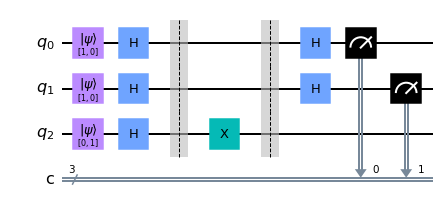

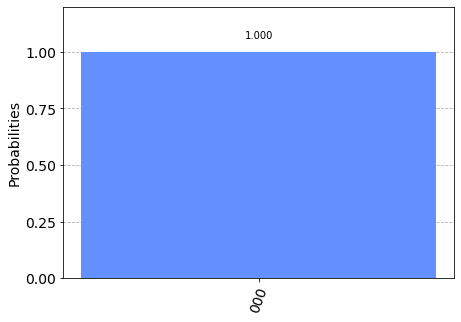

In [ ]:
import qiskit as qk
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

qr = qk.QuantumRegister(3,'q')
cr = qk.ClassicalRegister(3,'c')
qc = qk.QuantumCircuit(qr,cr)

qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([0,1],2)

qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()
qc.x(2)
qc.barrier()

qc.h(0)
qc.h(1)

qc.measure(0,0)
qc.measure(1,1)
display(qc.draw('mpl'))
histograma(qc)

Again the result is $|00\rangle$. Algebraically the results confirmation remains the same because the function definition doesn't account for the specific result of it. In other words, it doesn't matter if it gives back as an answer $0$ or $1$. The steps to confirm it are presented below just for reading continuity.

The function is constant. Therefore $f(00) = f(01) = f(10) = f(11)$ and consequently $f'(00) = f'(01) = f'(10) = f'(11)$. Let's replace this condition in the expression of $|\psi_2 \rangle$ and regroup the terms.

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|00.f(00)\rangle - |00.f'(00)\rangle + |01.f(00)\rangle - |01.f'(00)\rangle + |10.f(00)\rangle - |10.f'(00)\rangle +|11.f(00)\rangle - |11.f'(00)\rangle \right)$

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left[ \left(|00\rangle + |01\rangle + |10\rangle +|11\rangle \right).|f(00)\rangle - \left(|00\rangle + |01\rangle + |10\rangle +|11\rangle \right).|f'(00)\rangle \right]$

$|\psi_2\rangle = \frac{1}{2\sqrt{2}} \left(|00\rangle + |01\rangle + |10\rangle +|11\rangle \right).\left(|f(00)\rangle - |f'(00)\rangle \right)$

$|\psi_2\rangle = \frac{1}{2} \left(|00\rangle + |01\rangle + |10\rangle +|11\rangle \right).\frac{1}{\sqrt{2}} \left(|f(00)\rangle - |f'(00)\rangle \right)$

Now let's look the first part of this expression. It is formed by the qubits $|x_1\rangle$ and $|x_0\rangle$. If we pass each of them by a Hadamard gate we will get the state $|00\rangle$. The result presented below confirms our Qiskit circuit. It means that if the function is constant the qubits $|x_1\rangle$ and $|x_0\rangle$ will always measure $|00\rangle$.

In [ ]:
psi = np.array([[1,1,1,1]]).T/2
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
H2.dot(psi)

array([[1.],
       [0.],
       [0.],
       [0.]])

###### **Function neither balanced nor constant $f(00) = f(01) = f(10) = 0$ and $f(11) = 1$**

This function is neither constant nor balanced. The truth table can be seen below.

$$\begin{array}{ccc|ccc}
y&x_1&x_0&f(x) \oplus y&x_1&x_0\\
\hline
0&0&0&f(00) = 0 &0&0 \\
0&0&1&f(01) = 0 &0&1 \\
0&1&0&f(10) = 0 &1&0 \\
0&1&1&f(11) = 1 &1&1 \\
1&0&0&f(00)'= 1 &0&0 \\
1&0&1&f(01)'= 0 &0&1 \\
1&1&0&f(10)'= 0 &1&0 \\
1&1&1&f(11)'= 0 &1&1 \\
\end{array}$$

$f(x)$ is a CCNOT gate with the qubits $x_1$ and $x_2$ as control gates and $y$ as slave.

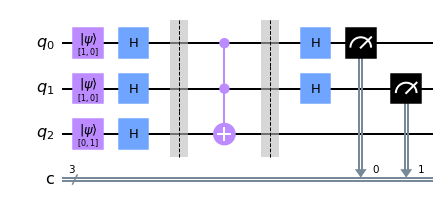

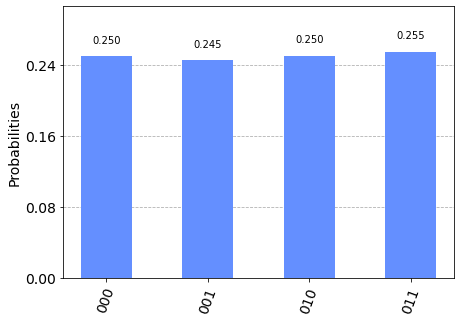

In [ ]:
import qiskit as qk
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

qr = qk.QuantumRegister(3,'q')
cr = qk.ClassicalRegister(3,'c')
qc = qk.QuantumCircuit(qr,cr)

qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([0,1],2)

qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()
qc.ccx(0,1,2)
qc.barrier()

qc.h(0)
qc.h(1)

qc.measure(0,0)
qc.measure(1,1)
display(qc.draw('mpl'))
histograma(qc)

As you can see, if the function is neither constant nor balanced the output is a superposition of base states $x_1$ and $x_0$.

##### **Simon's Algorithm**

###### **Introduction: Example with $n=2$ and $c=11$**

The third algorithm is about finding a pattern in a function. In this case we are talking about a function that maps an $n$ digits binary number into another. In math terms: $\{0,1\}^n \rightarrow \{0,1\}^n$ .

In Simon's algorithm the mapping is: $f(x) = f(x \oplus c)$. The operation $\oplus$ is bitwise XOR. It is a XOR operation made by comparing bits in the same positions on both numbers $x$ and $c$ and getting another number as a result. In a XOR operation $0 \oplus x = x$ and $x \oplus x = 0$. This will be important when deploying the function through a quantum circuit.

Let's first define a function $f(x)$ such that $f(x) = f(x \oplus c)$. As stated in the section title let's work with $n=2$ and $c=11$. The table below represents this function:

$$\begin{array}{c|c|c}
x & x \oplus c & f(x) = f(x \oplus c) \\
\hline
00 & 00 \oplus 11 = 11 & f(00) = f(11) = 00 \\
01 & 01 \oplus 11 = 10 & f(01) = f(10) = 11 \\
10 & 10 \oplus 11 = 01 & f(10) = f(01) = 11 \\
11 & 11 \oplus 11 = 00 & f(11) = f(00) = 00 \\
\end{array}$$

To be implemented in a quantum computer the transformation must be reversible. Let's make it $|0,x\rangle \rightarrow |0 \oplus f(x), x \rangle$. If we apply it again we will get $|0 \oplus f(x), x \rangle \rightarrow |0 \oplus f(x) \oplus f(x), x \rangle \rightarrow |0 \oplus 0, x \rangle \rightarrow |0,x\rangle$. Therefore we will create a quantum circuit that makes $|0,x\rangle \rightarrow |f(x),x\rangle$ (see below).

$$|00,x_1x_0\rangle \rightarrow |f(x_1x_0),x_1x_0\rangle \rightarrow |y_1y_0,x_1x_0\rangle$$
$$|00,00\rangle \rightarrow |f(00),00\rangle \rightarrow |00,00\rangle$$
$$|00,01\rangle \rightarrow |f(01),01\rangle \rightarrow |11,00\rangle$$
$$|00,10\rangle \rightarrow |f(10),10\rangle \rightarrow |11,00\rangle$$
$$|00,11\rangle \rightarrow |f(11),11\rangle \rightarrow |00,00\rangle$$

The circuit below provides this transformation:

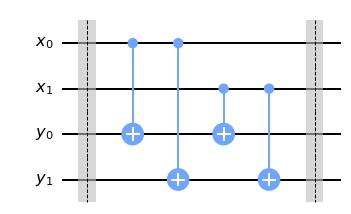

In [ ]:
import qiskit as qk

qrx = qk.QuantumRegister(2,'x')
qry = qk.QuantumRegister(2,'y')
qc = qk.QuantumCircuit(qrx,qry)

qc.barrier()
qc.cx(0,2)
qc.cx(0,3)
qc.cx(1,2)
qc.cx(1,3)
qc.barrier()

qc.draw('mpl')

Let's analyze it. Starting with state $| y_1 y_0 x_1 x_0 \rangle$ the circuit applies four $CNOT_{ab}$ gates with $a$ as slave and $b$ as master. The transformation sequence can be seen below:

$$\begin{array}{c|c|c|c|c}
              & CNOT_{y_0x_0} & CNOT_{y_1x_0} & CNOT_{y_0x_1} & CNOT_{y_1x_1} \\
\hdashline
y_1y_0,x_1x_0 & y_1y_0,x_1x_0 & y_1y_0,x_1x_0 & y_1y_0,x_1x_0 & y_1y_0,x_1x_0 \\
\hline
00,00 &  00,00 & 00,00 & 00,00 & 00,00 \\
00,01 &  01,01 & 11,01 & 11,01 & 11,01 \\
00,10 &  00,10 & 00,10 & 01,10 & 11,10 \\
00,11 &  01,11 & 11,11 & 10,11 & 00,11 \\
\end{array}$$

To test our model we create a function that receives the initial states of two qubits and displays the circuit's drawing and results histogram.

In [ ]:
def histograma(qc):
  simulador = qk.Aer.get_backend('statevector_simulator')
  resultado = qk.execute(qc,simulador,shots=10000).result()
  contagens = resultado.get_counts()
  grafico = qk.visualization.plot_histogram(contagens)
  return(grafico)

In [ ]:
def simon(initial_y, initial_x):
  import qiskit as qk
  qrx = qk.QuantumRegister(2,'x')
  crx = qk.ClassicalRegister(4,'c')
  qry = qk.QuantumRegister(2,'y')

  qc = qk.QuantumCircuit(qrx,qry,crx)

  qc.initialize(initial_x,qrx)
  qc.initialize(initial_y,qry)

  qc.barrier()
  qc.cx(0,2)
  qc.cx(0,3)
  qc.cx(1,2)
  qc.cx(1,3)
  qc.barrier()

  qc.measure([0,1,2,3],[0,1,2,3])

  display(qc.draw('mpl'))
  grafico = histograma(qc)
  return(grafico)

###### **Example with $n=2$ and $c=11$: Quantum Circuit with Classical Input Output States**

The circuit below shows that $|y_1y_0x_1x_0\rangle = |0000\rangle \rightarrow |0000\rangle$

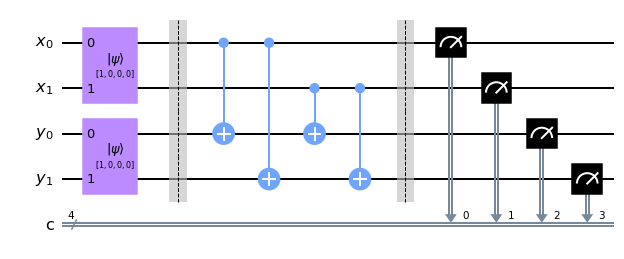

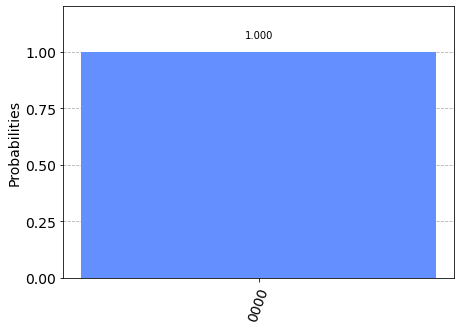

In [ ]:
simon([1,0,0,0],[1,0,0,0])

The circuit below shows that $|y_1y_0x_1x_0\rangle = |0011\rangle \rightarrow |0011\rangle$

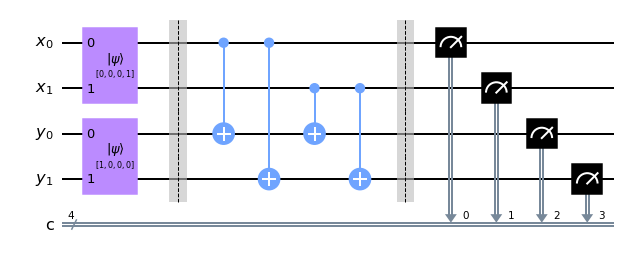

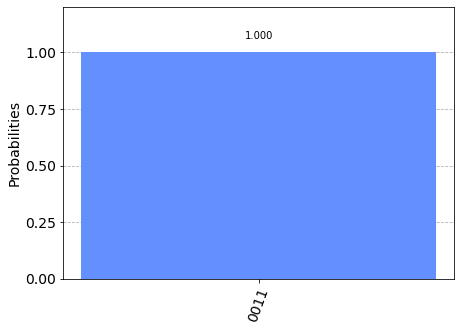

In [ ]:
simon([1,0,0,0],[0,0,0,1])

The circuit below shows that $|y_1y_0x_1x_0\rangle = |0001\rangle \rightarrow |1101\rangle$

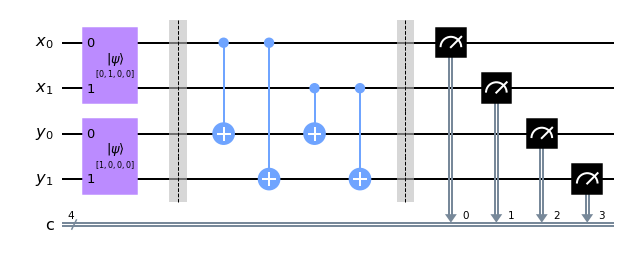

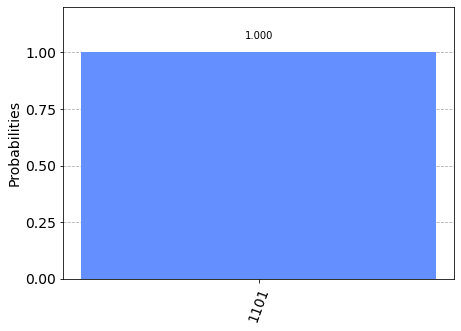

In [ ]:
simon([1,0,0,0],[0,1,0,0])

The circuit below shows that $|y_1y_0x_1x_0\rangle = |0010\rangle \rightarrow |1110\rangle$

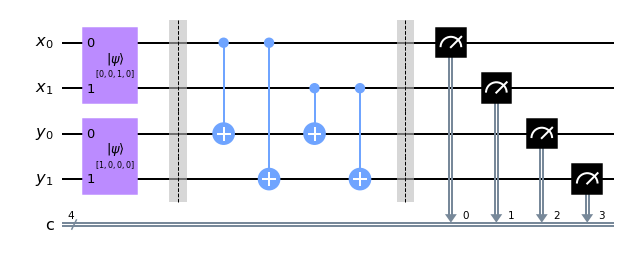

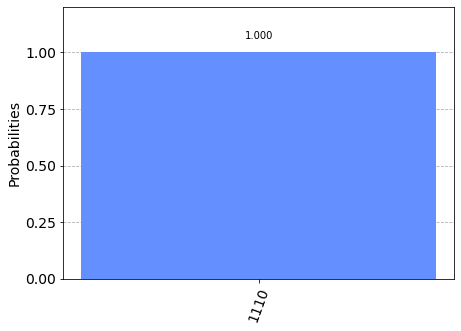

In [ ]:
simon([1,0,0,0],[0,0,1,0])

###### **Example with $n=2$ and $c=11$: Quantum Circuit with States in Superposition as Input, Output via Qiskit**

Now, suppose you have this circuit but cannot "look" inside the *oracle* to determine how the function $f(\boldsymbol{x})$ is calculated. If you're working with a classical computer you must check the four input - output pairs to determine and confirm that $\boldsymbol{c} = 11$.

Let's try with a quantum computer. First let's place the $|x_1x_0\rangle$ registers in superposition (i.e.pass them by Hadamard's gates). After that we will pass the four qubits throught the oracle. After that let's pass only the $|x_1x_0\rangle$ qubits by Hadamard's gates and measure them. The qubits $|y_1y_0\rangle$ will be left undisturbed.

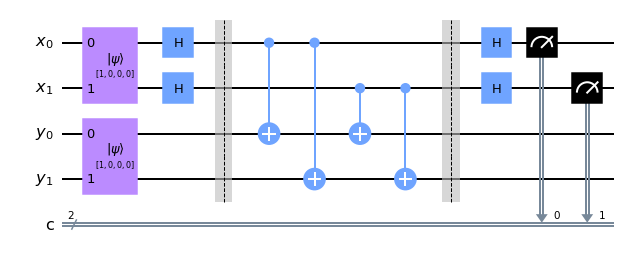

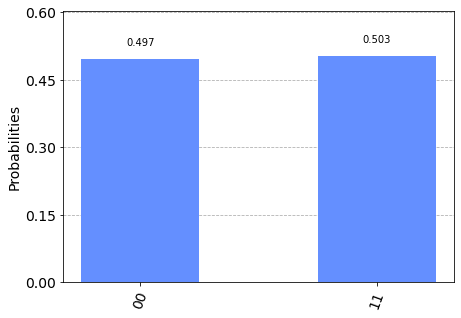

In [ ]:
import qiskit as qk
qrx = qk.QuantumRegister(2,'x')
crx = qk.ClassicalRegister(2,'c')
qry = qk.QuantumRegister(2,'y')

qc = qk.QuantumCircuit(qrx,qry,crx)

qc.initialize([1,0,0,0],qrx)
qc.initialize([1,0,0,0],qry)
qc.h([0,1])

qc.barrier()
qc.cx(0,2)
qc.cx(0,3)
qc.cx(1,2)
qc.cx(1,3)
qc.barrier()

qc.h([0,1])
qc.measure([0,1],[0,1])

display(qc.draw('mpl'))
histograma(qc)

We measure 50% of the time $|00\rangle$ and 50% of the time $|11\rangle$. But interestingly enough we never measure $|01\rangle$ or $|10\rangle$! What's going on here?

###### **Example with $n=2$ and $c=11$: Quantum Circuit with States in Superposition as Input, Output via Matrices and Dirac's Notation**

Let's work through the algebra of this circuit using Dirac's notation and confirm the results using numpy operations. The qubits are initialized in the state $|0\rangle$. Therefore we have $|\psi_0\rangle = |y_1y_0\;x_1x_0\rangle = |00\;00\rangle$.

In [ ]:
import numpy as np
x0 = np.array([[1,0]]).T
x1 = np.array([[1,0]]).T
x1x0 = np.kron(x1,x0)

y0 = np.array([[1,0]]).T
y1 = np.array([[1,0]]).T
y1y0 = np.kron(y1,y0)

psi0 = np.kron(y1y0,x1x0)
psi0.T

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

The first two Hadamard's gates put the qubits $x_1$ and $x_0$ in superposition. Qubits $y_1$ and $y_0$ are left undisturbed in the state $|00\rangle$.  In Dirac's notation this is:

$$|\psi_0\rangle = |y_1y_0 \; x_1x_0\rangle$$

$$|\psi_1\rangle = |y_1y_0(Hx_1)(Hx_0)\rangle$$

$$|\psi_1\rangle = |00\rangle \otimes \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle \right) \otimes \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle \right)$$

$$|\psi_1\rangle = |00\rangle \otimes \frac{1}{2} \left(|00\rangle + |01\rangle + |10\rangle + |11\rangle \right)$$.

$$|\psi_1\rangle = \frac{1}{2} \left(|00\;00\rangle + |00\;01\rangle + |00\;10\rangle + |00\;11\rangle \right)$$.

$$|\psi_1\rangle = |00\rangle \otimes \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$$

In [ ]:
H = np.array([[1,1],[1,-1]],dtype='int')
H2 = np.kron(H,H)
I2 = np.eye(4)
I2H2 = np.kron(I2,H2)
psi1 = I2H2.dot(psi0)/(np.sqrt(2)*np.sqrt(2))
I2H2.dot(psi0).T

array([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Now the four qubits in state $|\psi_1\rangle$ reach the first CNOT gate inside the oracle. This gate is applied between qubits $x_0$ (master) and $y_0$ (slave). This means that whenever $x_0$ is $0$, $y_0$ remains the same. And when $x_0$ is $1$, $y_0$ is inverted. The new superposition state is:

$$|\psi_1\rangle = |y_1y_0\;x_1x_0\rangle$$

$$|\psi_1\rangle = \frac{1}{2} \left(|00\;00\rangle + |00\;01\rangle + |00\;10\rangle + |00\;11\rangle \right)$$.

$$|\psi_2\rangle = \frac{1}{2} \left(|00\;00\rangle + |01\;01\rangle + |00\;10\rangle + |01\;11\rangle \right)$$.


In [ ]:
Tf1_2 = np.eye(16)
Tf1_2 = Tf1_2[:,[0,5,2,7,4,1,6,3,8,9,10,11,12,13,14,15]]
psi2 = Tf1_2.dot(psi1); psi2.T*2

array([[1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

Then comes the second CNOT, between $x_0$ (master) and $y_1$ (slave). The new superposition is:

$$|\psi_2\rangle = |y_1y_0\;x_1x_0\rangle$$

$$|\psi_2\rangle = \frac{1}{2} \left(|00\;00\rangle + |01\;01\rangle + |00\;10\rangle + |01\;11\rangle \right)$$.

$$|\psi_3\rangle = \frac{1}{2} \left(|00\;00\rangle + |11\;01\rangle + |00\;10\rangle + |11\;11\rangle \right)$$.



In [ ]:
Tf2_3 = np.eye(16)
Tf2_3 = Tf2_3[:,[0,1,2,3,4,13,6,15,8,9,10,11,12,5,14,7]]
psi3 = Tf2_3.dot(psi2); psi3.T*2

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]])

Now comes the third CNOT, between $x_1$ (master) and $y_0$ (slave). The new superposition is:

$$|\psi_3\rangle = |y_1y_0\;x_1x_0\rangle$$

$$|\psi_3\rangle = \frac{1}{2} \left(|00\;00\rangle + |11\;01\rangle + |00\;10\rangle + |11\;11\rangle \right)$$.

$$|\psi_4\rangle = \frac{1}{2} \left(|00\;00\rangle + |11\;01\rangle + |01\;10\rangle + |10\;11\rangle \right)$$.




In [ ]:
Tf3_4 = np.eye(16)
Tf3_4 = Tf3_4[:,[0,1,6,3,4,5,2,7,8,9,10,15,12,13,14,11]]
psi4 = Tf3_4.dot(psi3); psi4.T*2

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.]])

The last (fourth) CNOT, is between $x_1$ (master) and $y_1$ (slave). The new superposition is:

$$|\psi_4\rangle = |y_1y_0\;x_1x_0\rangle$$

$$|\psi_4\rangle = \frac{1}{2} \left(|00\;00\rangle + |11\;01\rangle + |01\;10\rangle + |10\;11\rangle \right)$$.

$$|\psi_5\rangle = \frac{1}{2} \left(|00\;00\rangle + |11\;01\rangle + |11\;10\rangle + |00\;11\rangle \right)$$.

$$|\psi_5\rangle = \frac{1}{\sqrt{2}} |00\rangle. \frac{1}{\sqrt{2}} \left(|00\rangle + |11\rangle \right) + \frac{1}{\sqrt{2}}|11\rangle \frac{1}{\sqrt{2}} \left(|01\rangle + |10\rangle \right) $$.


In [ ]:
Tf4_5 = np.eye(16)
Tf4_5 = Tf4_5[:,[0,1,2,11,4,5,14,7,8,9,10,3,12,13,6,15]]
psi5 = Tf4_5.dot(psi4); psi5.T*2

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]])

The qubits have left the oracle in state $|\psi_5\rangle = |y_1y_0x_1x_0\rangle$. We now want to pass qubits $|x_1\rangle$ and $|x_0\rangle$ each through a Hadamard gate. Qubits $|y_1y_0\rangle$ should be left undisturbed.

From a matrix standpoint the transformation that will take us from $|\psi_5\rangle$ to $|\psi_6\rangle$ is $|\psi_6\rangle = I \otimes H^{\otimes 2}.|\psi_5\rangle$.

In [ ]:
I2 = np.eye(4)
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
I2H2 = np.kron(I2,H2)
psi6 = I2H2.dot(psi5)
print(psi6.T*2)

[[ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0. -1.]]


Therefore $|\psi_6\rangle = \frac{1}{2}[|00\;00\rangle + |00\;11\rangle + |11\;00\rangle - |11\;11\rangle]$. Qubits $x_0$ and $x_1$ when measured will give as result either $|00\rangle$ or $11\rangle$. This confirms the results we got through Qiskit.

Now let's go in detail the transformation above. You start with $|\psi_5\rangle$ and multiply it by the matrix $I \otimes H{^{\otimes 2}}$. Setting aside the term $\frac{1}{2}$, the coeficients for the matrix $I \otimes H^{\otimes 2}$ can be calculated in Python as:

In [ ]:
import numpy as np
I2 = np.eye(4, dtype='int');
H2 = np.array([[1, 1, 1, 1],
               [1,-1, 1,-1],
               [1, 1,-1,-1],
               [1,-1,-1, 1]])/2;
I2H2 = np.kron(I2,H2);
print(I2H2*2)

[[ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  1. -1.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]
 [ 1.  1. -1. -1.  0.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.]
 [ 1. -1. -1.  1.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -0.  0. -0.  1. -1.  1. -1.  0. -0.  0. -0.  0. -0.  0. -0.]
 [ 0.  0. -0. -0.  1.  1. -1. -1.  0.  0. -0. -0.  0.  0. -0. -0.]
 [ 0. -0. -0.  0.  1. -1. -1.  1.  0. -0. -0.  0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  1. -1.  1. -1.  0. -0.  0. -0.]
 [ 0.  0. -0. -0.  0.  0. -0. -0.  1.  1. -1. -1.  0.  0. -0. -0.]
 [ 0. -0. -0.  0.  0. -0. -0.  0.  1. -1. -1.  1.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  1. -1.  1. -1.]
 [ 0.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  1.  1. -1. 

Ignoring multiplications by 0 (but not ignoring multiplications that add up to 0), each line of the resulting state $|\psi_6\rangle$ is calculated as follows:

$+|00\;00\rangle \langle 00\;00|00\;00\rangle + |00\;00\rangle \langle 00\;11 | 00\;11 \rangle = |00\;00\rangle.(-1)^{\langle 00\;00 \oplus 00\;00 \rangle} \;\; + |00\;00\rangle.(-1)^{\langle 00\;00 \oplus 00\;11 \rangle} = +2|00\;00\rangle$

$+|00\;01\rangle \langle 00\;00|00\;00\rangle - |00\;01\rangle \langle 00\;11 | 00\;11 \rangle = |00\;01\rangle.(-1)^{\langle 00\;01 \oplus 00\;00 \rangle} \;\; + |00\;01\rangle.(-1)^{\langle 00\;01 \oplus 00\;11 \rangle} = +0|00\;01\rangle$

$+|00\;10\rangle \langle 00\;00|00\;00\rangle - |00\;10\rangle \langle 00\;11 | 00\;11 \rangle = |00\;10\rangle.(-1)^{\langle 00\;10 \oplus 00\;00 \rangle} \;\; + |00\;10\rangle.(-1)^{\langle 00\;10 \oplus 00\;11 \rangle} = +0|00\;10\rangle$

$+|00\;11\rangle \langle 00\;00|00\;00\rangle + |00\;11\rangle \langle 00\;11 | 00\;11 \rangle = |00\;11\rangle.(-1)^{\langle 00\;11 \oplus 00\;00 \rangle} \;\; + |00\;11\rangle.(-1)^{\langle 00\;11 \oplus 00\;11 \rangle} = +2|00\;00\rangle$

$------------------------------------$

$+|11\;00\rangle \langle 11\;01|11\;01\rangle + |11\;00\rangle \langle 11\;10 | 11\;10 \rangle = |11\;00\rangle.(-1)^{\langle 11\;00 \oplus 11\;01 \rangle} \;\; + |11\;00\rangle.(-1)^{\langle 11\;00 \oplus 11\;10 \rangle} = +2|11\;00\rangle$

$+|11\;01\rangle \langle 11\;01|11\;01\rangle - |11\;01\rangle \langle 11\;10 | 11\;10 \rangle = |11\;01\rangle.(-1)^{\langle 11\;01 \oplus 11\;01 \rangle} \;\; + |11\;01\rangle.(-1)^{\langle 11\;01 \oplus 11\;10 \rangle} = +0|11\;01\rangle$

$+|11\;10\rangle \langle 11\;01|11\;01\rangle - |11\;10\rangle \langle 11\;10 | 11\;10 \rangle = |11\;10\rangle.(-1)^{\langle 11\;10 \oplus 11\;01 \rangle} \;\; + |11\;10\rangle.(-1)^{\langle 11\;10 \oplus 11\;10 \rangle} = +0|11\;10\rangle$

$-|11\;11\rangle \langle 11\;01|11\;01\rangle - |11\;11\rangle \langle 11\;10 | 11\;10 \rangle = |11\;11\rangle.(-1)^{\langle 11\;11 \oplus 11\;01 \rangle} \;\; + |11\;11\rangle.(-1)^{\langle 11\;11 \oplus 11\;10 \rangle} = -2|11\;11\rangle$

Upon inspection, it is possible to verify that $|\psi_6\rangle$ expression above can be calculated by: $|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} |f(x),z\rangle$.

$x$ and $z$ are $n$ digits binary numbers. In this example $n=2$. Therefore each summation goes from $00$ to $11$.

$\langle x,z \rangle$ is a bitwise inner product between $x$ and $z$. Instead of multiplications we do a bitwise AND operation. After that, instead of adding the multiplication results we XOR the resulting bits.

By definition $f(x) = f(x \oplus c)$. Therefore $|\psi_6\rangle$ can also be calculated as $|\psi_6\rangle = \sum_x \sum_z (-1)^{\langle x \oplus c, z\rangle}|f(x \oplus c),z\rangle$

This means that

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} |f(x),z\rangle + \sum_x \sum_z (-1)^{\langle x \oplus c, z\rangle} \; |f(x \oplus c),z\rangle$$

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} |f(x),z\rangle + \sum_x \sum_z (-1)^{\langle x \oplus c, z\rangle} \; |f(x),z\rangle$$

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} + (-1)^{\langle x \oplus c, z\rangle} \; |f(x),z\rangle$$

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} + (-1)^{\langle x,z \rangle \oplus \langle c, z\rangle} \; |f(x),z\rangle$$

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} + (-1)^{\langle x,z \rangle \oplus \langle c, z\rangle} \; |f(x),z\rangle$$

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} [ 1 + (-1)^{ \langle c, z\rangle}] \; |f(x),z\rangle$$


Now the coefficient of $|f(x),z\rangle$ will not be zero only when $\langle c, z \rangle = 0$. This means that the only states that will be observed are those that make $\langle c,z \rangle = 0$.

In this example $\langle 00,c \rangle = 0$ and $\langle 11,c \rangle = 0$. This means that $1.c_1 \oplus 1.c_0 = c_1 \oplus c_0 = 0$. This means that $c_1 = c_0$.

If $c_1=c_0=0$ the function doesn't have a pattern. Therefore $c_1=c_0=1$ because $\langle 11,11 \rangle = 0$.

We conclude that $c=11$

###### **Example with $n=3$ and $c=101$. Step by step procedure using matrices and Dirac notation**

Let's work through all the steps of an example with $n=3$ and $c=101$.

$000 \oplus 101 = 101$ hence, $f(000) = f(101) = 000$

$001 \oplus 101 = 100$ hence, $f(001) = f(100) = 001$

$010 \oplus 101 = 111$ hence, $f(010) = f(111) = 010$

$011 \oplus 101 = 110$ hence, $f(011) = f(110) = 011$

$100 \oplus 101 = 001$ hence, $f(100) = f(001) = 001$

$101 \oplus 101 = 000$ hence, $f(101) = f(000) = 000$

$110 \oplus 101 = 011$ hence, $f(110) = f(011) = 011$

$111 \oplus 101 = 010$ hence, $f(111) = f(010) = 010$


The algebraic steps are presented below.

First let's create qubits $x_0$, $x_1$ and $x_2$.

In [ ]:
import numpy as np
x0 = np.array([[1,0]]).T
x1 = np.array([[1,0]]).T
x2 = np.array([[1,0]]).T
x2x1x0 = np.kron(x2,np.kron(x1,x0))
x2x1x0.T

array([[1, 0, 0, 0, 0, 0, 0, 0]])

And qubits $y_0$, $y_1$ and $y_2$

In [ ]:
y0 = np.array([[1,0]]).T
y1 = np.array([[1,0]]).T
y2 = np.array([[1,0]]).T
y2y1y0 = np.kron(y2,np.kron(y1,y0))
y2y1y0.T

array([[1, 0, 0, 0, 0, 0, 0, 0]])

After that we initialize the circuit with qubits $y_2$, $y_1$, $y_0$, $x_2$, $x_1$ and $x_0$ each of them in state $|0\rangle$.

In [ ]:
psi0 = np.kron(y2y1y0,x2x1x0)
psi0.T

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Now let's put qubits $x$ in superposition and leave qubits $y$ undisturbed.

In [ ]:
I3 = np.eye(2**3)
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
H3 = np.kron(H,H2)
I3H3 = np.kron(I3,H3)
psi1 = I3H3.dot(psi0)
psi1.T.round(2)

array([[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

Let's create the oracle. Mappings are $|0,x\rangle \rightarrow |f(x),x\rangle$

$f(000) = 000$ this means $|000\;000\rangle \rightarrow |000\;000\rangle$ on a decimal basis $|0\rangle \rightarrow |0\rangle$

$f(001) = 001$ this means $|000\;001\rangle \rightarrow |001\;001\rangle$ on a decimal basis $|1\rangle \rightarrow |9\rangle$

$f(010) = 010$ this means $|000\;010\rangle \rightarrow |010\;010\rangle$ on a decimal basis $|2\rangle \rightarrow |18\rangle$

$f(011) = 011$ this means $|000\;011\rangle \rightarrow |011\;011\rangle$ on a decimal basis $|3\rangle \rightarrow |27\rangle$

$f(100) = 001$ this means $|000\;100\rangle \rightarrow |001\;100\rangle$ on a decimal basis $|4\rangle \rightarrow |12\rangle$

$f(101) = 000$ this means $|000\;101\rangle \rightarrow |000\;101\rangle$ on a decimal basis $|5\rangle \rightarrow |5\rangle$

$f(110) = 011$ this means $|000\;110\rangle \rightarrow |011\;110\rangle$ on a decimal basis $|6\rangle \rightarrow |30\rangle$

$f(111) = 010$ this means $|000\;111\rangle \rightarrow |010\;111\rangle$ on a decimal basis $|7\rangle \rightarrow |23\rangle$


OBS: Note that a quantum "function" or "oracle" is in fact a scramble of state positions (see below):

In [ ]:
n = 2*3 # 2 números de 3 digitos cada
Uf = np.eye(2**n) # 2^6 = 64 posições
Uf = Uf[:,[ 0, 9,18,27,12, 5,30,23,
            8, 1,10,11, 4,13,14,15,
           16,17, 2,19,20,21,22, 7,
           24,25,26, 3,28,29, 6,31,
           32,33,34,35,36,37,38,39,
           40,41,42,43,44,45,46,47,
           48,49,50,51,52,53,54,55,
           56,57,58,59,60,61,62,63]]

In [ ]:
psi5 = Uf.dot(psi1)
psi5.T.round(2)

array([[0.35, 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.  , 0.  , 0.35, 0.  ,
        0.  , 0.35, 0.  , 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.  , 0.  ,
        0.  , 0.35, 0.  , 0.  , 0.  , 0.35, 0.  , 0.  , 0.35, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

And after that let's pass qubits $x$ again by Hadamard gates, leaving qubits $y$ undisturbed.

In [ ]:
psi6 = I3H3.dot(psi5)
psi6.T

array([[ 0.25,  0.  ,  0.25,  0.  ,  0.  ,  0.25,  0.  ,  0.25,  0.25,
         0.  ,  0.25,  0.  ,  0.  , -0.25,  0.  , -0.25,  0.25,  0.  ,
        -0.25,  0.  ,  0.  ,  0.25,  0.  , -0.25,  0.25,  0.  , -0.25,
         0.  ,  0.  , -0.25,  0.  ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ]])

Let's use `numpy` to quickly get `psi6`'s rows that are non-zero.

In [ ]:
np.where(psi6 > 0)[0]

array([ 0,  2,  5,  7,  8, 10, 16, 21, 24, 31])

To get rows number in binary we can use:

In [ ]:
[format(i,'#08b')[2:] for i in np.where(psi6 > 0)[0]]

['000000',
 '000010',
 '000101',
 '000111',
 '001000',
 '001010',
 '010000',
 '010101',
 '011000',
 '011111']

If we measure qubits $x_2$, $x_1$ and $x_0$ the only states that we will see are: $|000\rangle$, $|010\rangle$, $|101\rangle$ and $|111\rangle$.

Therefore to get to know $c$ we solve:

$\langle 010,c \rangle = 0$

$\langle 101,c \rangle = 0$

$\langle 111,c \rangle = 0$

We then get:
From the first equation: $0 \oplus c_1 \oplus 0 = 0$. This means $c_1 = 0$

From the second equation: $c_2 \oplus 0 \oplus c_0 = 0$. This means c_2 = c_0$

From the third equation: $c_2 \oplus c_1 \oplus c_0 = 0$. This means $c_0 \oplus 1 \oplus c_0 = 0$. Therefore $c_0 = c_2 = 1$

We conclude that $c=101$

###### **A detour: general procedure to implement logic operations with quantum circuits**

Now let's solve this problem using a quantum circuit. Our objective is to create a general structure that will allow us to do a mapping of the kind: $\{0,1\}^n \rightarrow \{0,1\}^m$ where $n \leq m$.

First thing to remember is that Quantum Computation is reversible. Therefore even if we are only interested in a smaller number of bits in the output, our mapping must be of kind $\{0,1\}^n \rightarrow \{0,1\}^n$. In fact our mapping will be like $|0,0,x\rangle \rightarrow |f(x),0,x\rangle$

For reasons that will became clearer as we implement more circuits, the general structure will be this:

1. Start with three groups of qubits: $|0,0,x\rangle$.
2. Calculate $f(x)$ and store its value in the middle qubit getting $|0,f(x),x\rangle$.
3. Copy **classicaly** value in qubit $f(x)$ to qubit $0$ getting $|f(x),f(x),x\rangle$.
4. Reverse $f(x)$ calculation getting back to $0$ in the middle qubit, obtaining as final result $|f(x),0,x\rangle$

###### **A detour: quantum version of the NAND gate**

When dealing with classical computing, the NAND gate is universal, let's implement a quantum version of it. To do this we need a quantum version of the NOT and AND gates.

The quantum version of the classical NOT is the X gate. The X gate creates a mapping of the kind: $|1\rangle = X|0\rangle$ and $|0\rangle = X|1\rangle$. It is represented by matrix $ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $

The quantum version of the AND gate is more difficult. This happens because it is a non reversible operation since it has two inputs and one output. We will obtain an equivalent reversible result using a three bits input output gate called Controlled-Controlled-Not gate. This gate is also known as Toffoli gate.

A Toffoli gate is a circuit with three inputs, two masters and one slave. If both masters are in state $|1\rangle$ then the slave is reversed. The truth table of this gate is presented below. In this table $x$ and $y$ are masters and $z$ is slave.

$$\begin{array}{ccc|ccc}
z & y & x & u & y & x \\
\hline
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 1 & 1 & 1 & 1 & 1 \\
\hdashline
1 & 0 & 0 & 1 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 & 1 \\
1 & 1 & 0 & 1 & 1 & 0 \\
1 & 1 & 1 & 0 & 1 & 1 \\
\end{array}$$

Now suppose $z = 0$. The truth table becomes:

$$\begin{array}{ccc|ccc}
z & y & x & u & y & x \\
\hline
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \\
\hdashline
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 1 & 1 & 1 & 1 & 1 \\
\end{array}$$

Under these circunstances, $u = x \wedge y$.

To be sure this operation can be implemented in a quantum computer let's confirm that CCNOT is its own inverse. If it is then $CCNOT.CNOT = I$.

In [ ]:
import numpy as np
CCNOT = np.eye(8)
CCNOT = CCNOT[:,[0,1,2,7,4,5,6,3]]
CCNOT.dot(CCNOT)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

So we have created a transformation $|0,y,x\rangle \rightarrow |x \wedge y,y, x$. Let's implement it using Qiskit (see below).


In [ ]:
import qiskit as qk

def qNAND(y0,x0):
  x = qk.QuantumRegister(1,"x")
  y = qk.QuantumRegister(1,"y")
  z = qk.QuantumRegister(1,"z")
  u = qk.QuantumRegister(1,"u")
  c = qk.ClassicalRegister(3,'c')
  qc = qk.QuantumCircuit(x,y,z,u,c)

  # Put qubits u and z in state |0>
  qc.initialize([1,0],z)
  qc.initialize([1,0],u)
  qc.initialize(y0,y)
  qc.initialize(x0,x)

  # Perform computation
  qc.barrier()
  qc.ccx(x,y,z)
  qc.x(z)
  # Copy CLASSICALY state of z to u
  qc.cx(z,u)
  qc.barrier()

  # Reverse computation
  qc.x(z)
  qc.ccx(x,y,z)
  qc.barrier()

  # Measure results
  qc.measure(x,c[0])
  qc.measure(y,c[1])
  qc.measure(u,c[2])
  display(qc.draw('mpl'))

  simulator = qk.Aer.get_backend("statevector_simulator")
  results = qk.execute(qc, simulator, shots=10000).result().get_counts()
  grafico = qk.visualization.plot_histogram(results)
  return(grafico)

0 NAND 0 = 1


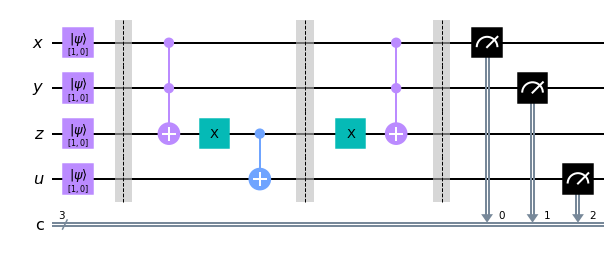

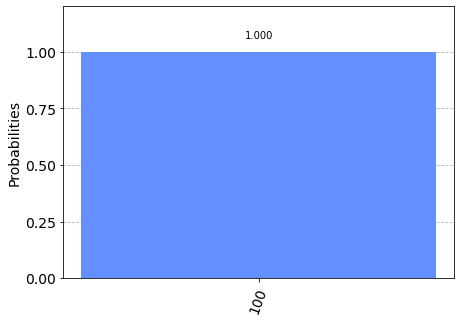

In [ ]:
print("0 NAND 0 = 1")
qNAND([1,0],[1,0])

0 NAND 1 = 1


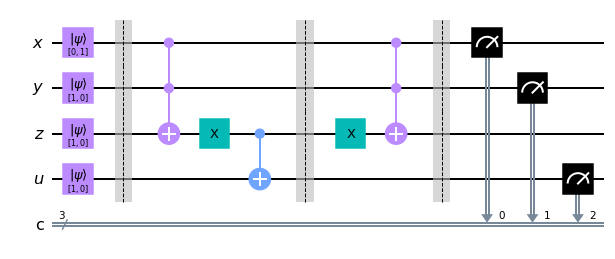

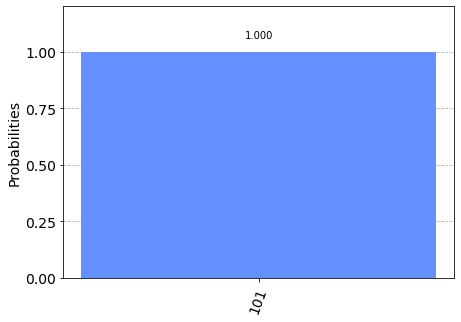

In [ ]:
print("0 NAND 1 = 1")
qNAND([1,0],[0,1])

1 NAND 0 = 1


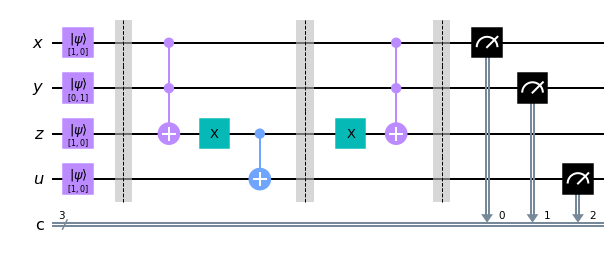

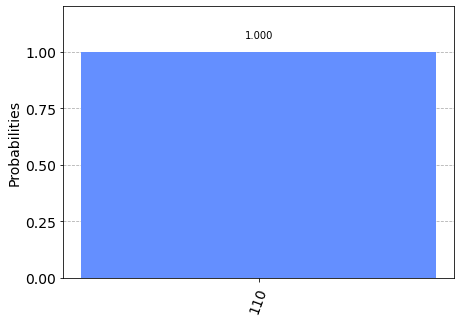

In [ ]:
print("1 NAND 0 = 1")
qNAND([0,1],[1,0])

1 NAND 1 = 0


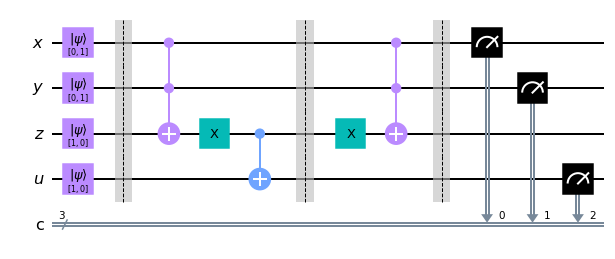

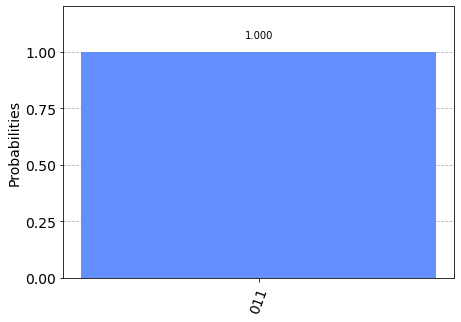

In [ ]:
print("1 NAND 1 = 0")
qNAND([0,1],[0,1])

###### **A detour: quantum version of the OR gate**

As an exercise, let's implement a quantum version of an OR gate. The truth table below allows $u$ to be $x \vee y$:

$$\begin{array}{ccc|ccc}
z & y & x & u & y & x \\
\hline
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 1 \\
\hdashline
0 & 1 & 0 & 1 & 1 & 0 \\
0 & 1 & 1 & 1 & 1 & 1 \\
\end{array}$$

The operation in $u$ can be computed applying $X$ gates to $y$ and $x$ and using $y'$ and $x'$ as masters gates and $z$ as target in a Toffoli gate. After that, reverse $u$ with another $X$ gate. The Qiskit circuit below implements this operation

In [ ]:
import qiskit as qk

def qOR(y0,x0):
  x = qk.QuantumRegister(1,"x")
  y = qk.QuantumRegister(1,"y")
  z = qk.QuantumRegister(1,"z")
  u = qk.QuantumRegister(1,"u")
  c = qk.ClassicalRegister(3,'c')

  # Initialize qubits
  qc = qk.QuantumCircuit(x,y,z,u,c)
  qc.initialize(x0,x)
  qc.initialize(y0,y)
  qc.initialize([1,0],z)
  qc.initialize([1,0],u)

  # Compute function
  qc.barrier()
  qc.x(x)
  qc.x(y)
  qc.ccx(x,y,z)
  qc.x(z)
  qc.cx(z,u)
  qc.barrier()

  # Reverse computation
  qc.x(z)
  qc.ccx(x,y,z)
  qc.x(y)
  qc.x(x)
  qc.barrier()

  # Measure results
  qc.measure(x,c[0])
  qc.measure(y,c[1])
  qc.measure(u,c[2])
  display(qc.draw('mpl'))

  # Simulate circuit
  simulator = qk.Aer.get_backend('statevector_simulator')
  results = qk.execute(qc,simulator,shots=10000).result().get_counts()
  grafico = qk.visualization.plot_histogram(results)
  return(grafico)

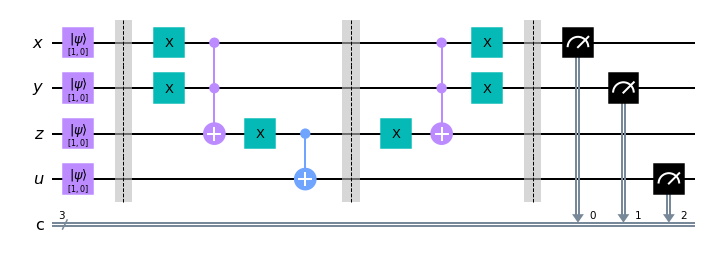

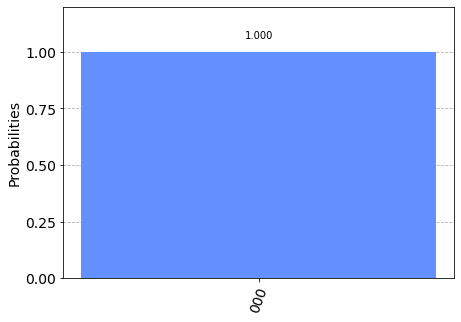

In [ ]:
qOR([1,0],[1,0])

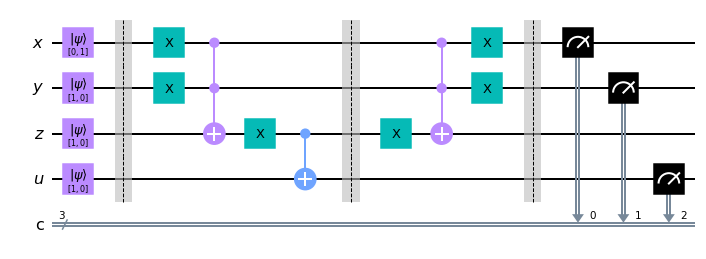

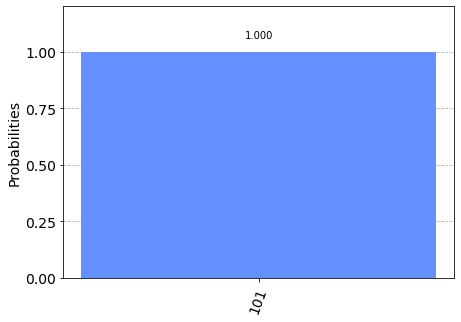

In [ ]:
qOR([1,0],[0,1])

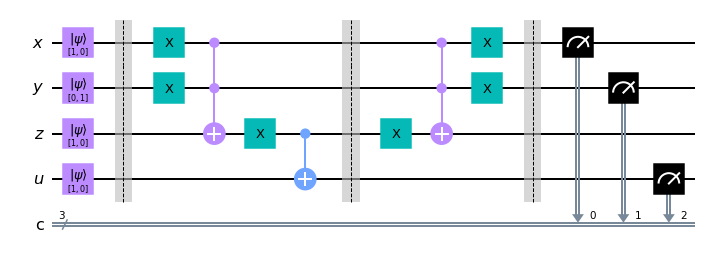

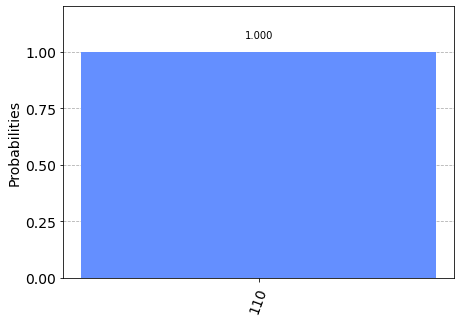

In [ ]:
qOR([0,1],[1,0])

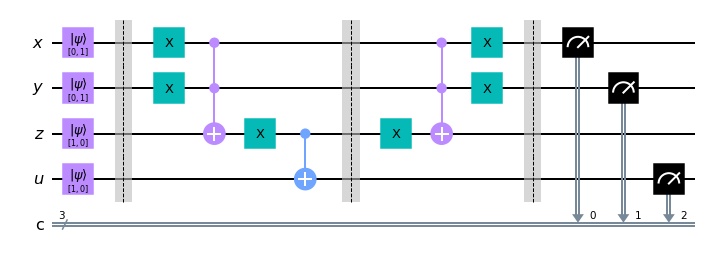

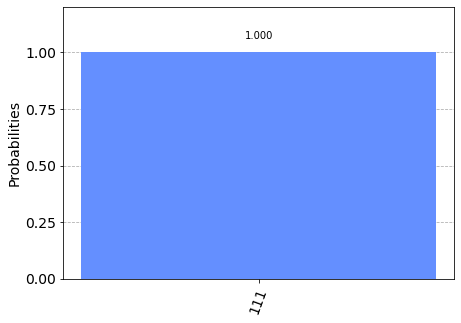

In [ ]:
qOR([0,1],[0,1])

###### **A detour: quantum version of the operation $(x \wedge y) \vee (x' \wedge y')$**

In [ ]:
import qiskit as qk

def qNXOR(y0,x0,calc=True,show=False):
  ##################################################
  # Create registers                               #
  ##################################################
  # Base registers
  x = qk.QuantumRegister(1,"x")
  y = qk.QuantumRegister(1,"y")

  # Auxiliary register (for x and y)
  z = qk.QuantumRegister(1,"z")

  # Auxiliary register (to store x AND y)
  a1 = qk.QuantumRegister(1,"a1")

  # Auxiliary register (to store NOT(x) AND NOT(y))
  a2 = qk.QuantumRegister(1,"a2")

  # Auxiliary register (for a1 and a2)
  b1 = qk.QuantumRegister(1,"b1")

  # Auxiliary register (to store a1 OR a2)
  b2 = qk.QuantumRegister(1,"b2")

  # Classical Registers to store x,y and final measurement
  c = qk.ClassicalRegister(3,"c")
  ##################################################
  # Create Circuit                                 #
  ##################################################
  qc = qk.QuantumCircuit(x,y,z,a1,a2,b1,b2,c)

  ##################################################
  # Initialize registers                           #
  ##################################################
  qc.initialize(x0,x)
  qc.initialize(y0,y)
  qc.initialize([1,0],z)
  qc.initialize([1,0],a1)
  qc.initialize([1,0],a2)
  qc.initialize([1,0],b1)
  qc.initialize([1,0],b2)

  ###################################################
  # Calculate x AND y. Copy result to a1. Reverse z #
  ###################################################
  qc.barrier()
  qc.ccx(x,y,z)
  qc.cx(z,a1)
  qc.ccx(x,y,z)
  qc.barrier()

  #########################################################
  # Calc. NOT(x) AND NOT(y). Copy result to a2. Reverse z #
  #########################################################
  qc.barrier()
  qc.x(x)
  qc.x(y)
  qc.ccx(x,y,z)
  qc.cx(z,a2)
  qc.ccx(x,y,z)
  qc.x(y)
  qc.x(x)
  qc.barrier()

  #################################################
  # Calc. a1 OR a2. Copy result to b2. Reverse b1 #
  #################################################
  qc.barrier()
  qc.x(a1)
  qc.x(a2)
  qc.ccx(a1,a2,b1)
  qc.x(b1)
  qc.cx(b1,b2)
  qc.x(b1)
  qc.ccx(a1,a2,b1)
  qc.barrier()

  #################################################
  # Measure b2                                    #
  #################################################
  qc.measure(x,c[0])
  qc.measure(y,c[1])
  qc.measure(b2,c[2])

  #################################################
  # Draw circuit                                  #
  #################################################
  if show:
    display(qc.draw("mpl"))

  #################################################
  # Run circuit. Collect results                  #
  #################################################
  if calc:
    simulator = qk.Aer.get_backend("statevector_simulator")
    results = qk.execute(qc,simulator,shots=10000).result().get_counts()
    grafico = qk.visualization.plot_histogram(results)
    return(grafico)
  else:
    return()


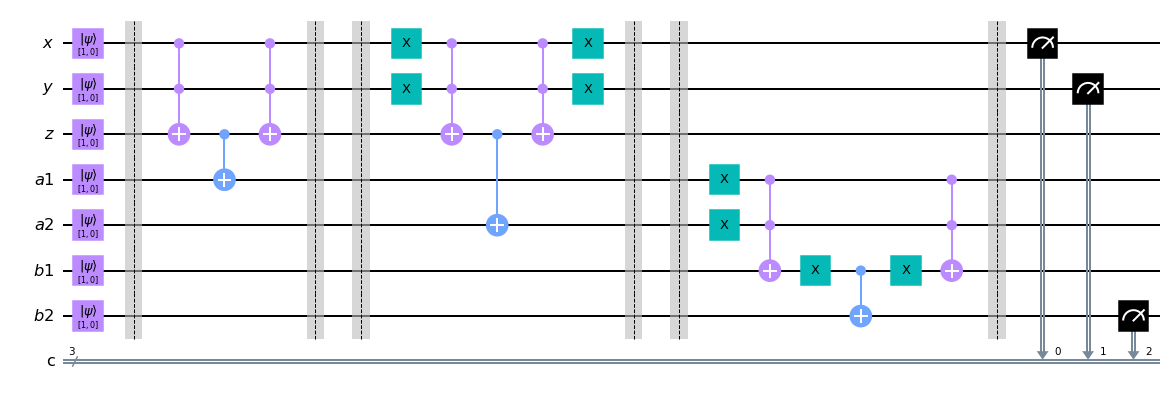

()

In [ ]:
qNXOR([1,0],[1,0],False,True)

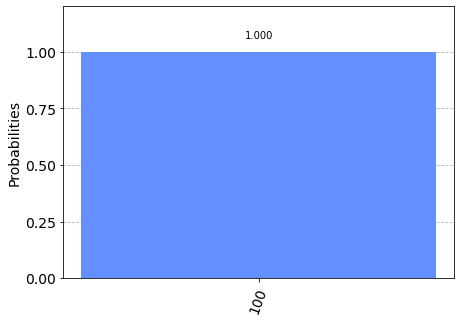

In [ ]:
qNXOR([1,0],[1,0])

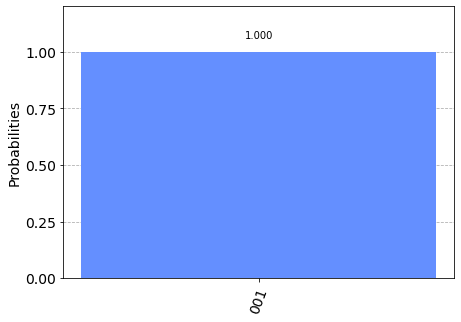

In [ ]:
qNXOR([1,0],[0,1])

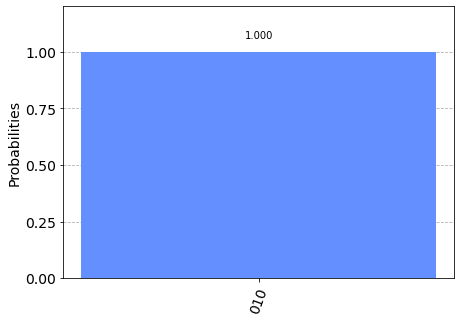

In [ ]:
qNXOR([0,1],[1,0])

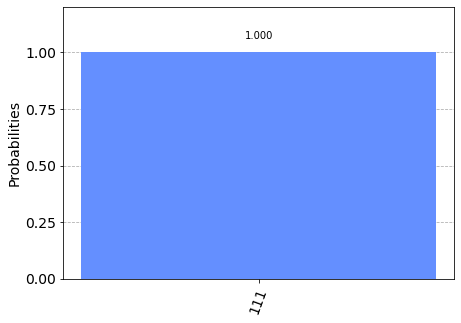

In [ ]:
qNXOR([0,1],[0,1])

###### **A detour: using superposition to get all results from $(x \wedge y) \vee (x' \wedge y')$ truth table**

If we put the qubits $x$ and $y$ in superposition and run the circuit, we get all four results from the truth table at once. From the states measured in the output we can infer that for $|y,x\rangle = |0,0\rangle$ the result is $|1\rangle$, for $|y,x\rangle = |0,1\rangle$ it is $|0\rangle$ and so on.  

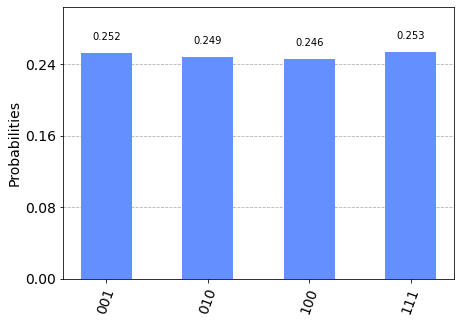

In [ ]:
x0 = np.array([1,1])/np.sqrt(2)
y0 = np.array([1,1])/np.sqrt(2)
qNXOR(y0,x0)

###### **Example with $n=3$ and $c=101$. Step by step procedure using quantum circuits**

Now we return to the main section subject. Let's create the oracle and circuit using Qiskit's resources. Mappings are shown below.

$f(000) = 000$ this means $|000\;000\rangle \rightarrow |000\;000\rangle$ or $|0\rangle \rightarrow |0\rangle$

$f(001) = 001$ this means $|000\;001\rangle \rightarrow |001\;001\rangle$ or $|1\rangle \rightarrow |9\rangle$

$f(010) = 010$ this means $|000\;010\rangle \rightarrow |010\;010\rangle$ or $|2\rangle \rightarrow |18\rangle$

$f(011) = 011$ this means $|000\;011\rangle \rightarrow |011\;011\rangle$ or $|3\rangle \rightarrow |27\rangle$

$f(100) = 001$ this means $|000\;100\rangle \rightarrow |001\;100\rangle$ or $|4\rangle \rightarrow |12\rangle$

$f(101) = 000$ this means $|000\;101\rangle \rightarrow |000\;101\rangle$ or $|5\rangle \rightarrow |5\rangle$

$f(110) = 011$ this means $|000\;110\rangle \rightarrow |011\;110\rangle$ or $|6\rangle \rightarrow |30\rangle$

$f(111) = 010$ this means $|000\;111\rangle \rightarrow |010\;111\rangle$ or $|7\rangle \rightarrow |23\rangle$


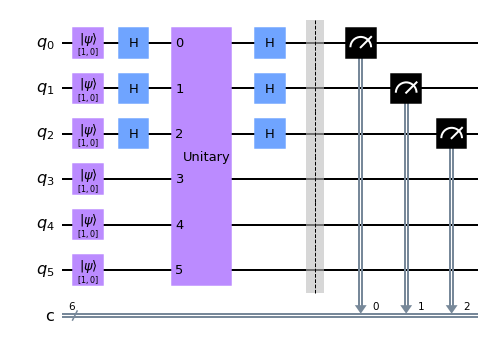

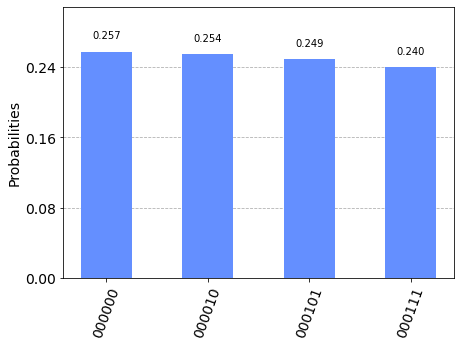

In [ ]:
import qiskit as qk
from qiskit.quantum_info.operators import Operator

qr = qk.QuantumRegister(6,"q")
cr = qk.ClassicalRegister(6,"c")
qc = qk.QuantumCircuit(qr,cr)

for i in range(6):
  qc.initialize([1,0],i)

for i in range(3):
  qc.h(i)

oracle = np.eye(2**6)
oracle[:,[ 0,  0]] = oracle[:,[  0, 0]]
oracle[:,[ 1,  9]] = oracle[:,[  9, 1]]
oracle[:,[ 2, 18]] = oracle[:,[ 18, 2]]
oracle[:,[ 3, 27]] = oracle[:,[ 27, 3]]
oracle[:,[ 4, 12]] = oracle[:,[ 12, 4]]
oracle[:,[ 5,  5]] = oracle[:,[  5, 5]]
oracle[:,[ 6, 30]] = oracle[:,[ 30, 6]]
oracle[:,[ 7, 23]] = oracle[:,[ 23, 7]]
oracle = Operator(oracle)

qc.append(oracle,qr)

for i in range(3):
  qc.h(i)

qc.barrier()

for i in range(3):
  qc.measure(i,i)

display(qc.draw("mpl"))

simulator = qk.Aer.get_backend("statevector_simulator")
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

From the results measured above, the qubits $x_2x_1x_0$ states are: $000$, $010$, $101$ and $111$. From what we learned about Simon's algorithm we can discard $000$ because this would make the function non periodic (1 to 1).

From the other three results we create a system of equations:

$\langle 010 , c \rangle = 0$

$\langle 101 , c \rangle = 0$

$\langle 111 , c \rangle = 0$

Breaking the system into $c$'s digits $c_2$, $c_1$ and $c_0$ we get:

$0 \oplus c_1 \oplus 0 = 0 \rightarrow c_1 = 0$

$c_2 \oplus 0 \oplus c_0 = 0 \rightarrow c_2 = c_0$

$c_2 \oplus c_1 \oplus c_0 = 0 \rightarrow c_2 \oplus 0 \oplus c_0 = 0 \rightarrow c_0 \oplus 0 \oplus c_0 = 0 \rightarrow c_0 = 1$.

We conclude that $c=101$

##### **Grover's Algorithm**

###### **Introduction: The function to find $x_0$ where $f(x_0) = 1$**

Grover's algorithm is about a search in an unstructured list. In math terms we are given a function (the so called *oracle*) which in this case acts as follows: $f(x = x_0) = 1$ and $f(x \neq x_0) = 0$. From that we want to find $x_0$. If we are using a classical computer, we would have to search, on average $\frac{2^n}{2}$ terms to find $x_0$. Let's see what can be done with a quantum computer.

Suppose $n=2$ and $x_0 = 10$. Therefore the function is:

$$f(00) = 0$$
$$f(01) = 0$$
$$f(10) = 1$$
$$f(11) = 0$$

To represent this function as a qubits states transformation it must be unitary. In this example it will be a 3 qubits input output unitary transformation in which:

$$|x_2x_1x_0\rangle _{in} \rightarrow |x_2x_1x_0\rangle _{out}$$

$$|0.00\rangle \rightarrow |0.00\rangle$$

$$|0.01\rangle \rightarrow |0.01\rangle$$

$$|0.10\rangle \rightarrow |1.10\rangle$$

$$|0.11\rangle \rightarrow |0.11\rangle$$

$$|1.00\rangle \rightarrow |1.00\rangle$$

$$|1.01\rangle \rightarrow |1.01\rangle$$

$$|1.10\rangle \rightarrow |0.10\rangle$$

$$|1.11\rangle \rightarrow |1.11\rangle$$

In matrix format it becomes:

\begin{array}{c:cccccccc}
     & 0.00 & 0.01 & 0.10 & 0.11 & 1.00 & 1.01 & 1.10 & 1.11 \\
\hline
0.00 & 1    &      &      &      &      &      &      &      \\
0.01 &      & 1    &      &      &      &      &      &      \\
0.10 &      &      &      &      &      &      & 1    &      \\
0.11 &      &      &      & 1    &      &      &      &      \\
1.00 &      &      &      &      & 1    &      &      &      \\
1.01 &      &      &      &      &      & 1    &      &      \\
1.10 &      &      & 1    &      &      &      &      &      \\
1.11 &      &      &      &      &      &      &      & 1    \\
\end{array}

From a practical standpoint it is an identity matrix with columns 2 and 6 switched.

In [ ]:
import numpy as np
oracle = np.eye(8)
oracle[:,[2,6]] = oracle[:,[6,2]]
oracle

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

###### **Qubits $x_1$ and $x_0$ initialization**

To start the execution of Grover's algorithm, first we initialize $n$ qubits in $|0\rangle$ state. Call this state $|\psi_0\rangle$. Since in this example $n = 2$ we will initialize qubits $x_1x_0$ in $|0\rangle$. This will create state $|\psi_0\rangle = |00\rangle$.

In [ ]:
import numpy as np
x0 = np.array([[1,0]]).T
x1 = np.array([[1,0]]).T
psi0 = np.kron(x1,x0)

From state $|\psi_0\rangle$ we apply a Hadamard gate in both qubits and get state $|\psi_1\rangle = H^{\otimes 2}|\psi_0\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
psi1 = H2.dot(psi0)
psi1.T

array([[0.5, 0.5, 0.5, 0.5]])

###### **Phase Inversion**

Grover's algorithm requires two steps. First a phase inversion.  In this stage you start by getting a qubit $|y\rangle = |1\rangle$ and passing it through a Hadamard gate. This will create state $|\psi_{2a}\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$


In [ ]:
# Initialize a qubit y in state |1>
y  = np.array([[0,1]]).T

# Pass it through a Hadamard gate and obtain state psi2a
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
psi2a = H.dot(y)
psi2a.T

array([[ 0.707, -0.707]])

Now combine $|\psi_1\rangle$ with $|\psi_{2a}\rangle$ by tensor product them. This will create state:

$$|\psi_2\rangle = |\psi_{2a}\rangle \otimes |\psi_1\rangle$$

$$|\psi_2\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \otimes \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$$

$$|\psi_2\rangle = \frac{1}{2\sqrt{2}}(|000\rangle + |001\rangle + |010\rangle + |011\rangle - |100\rangle -|101\rangle -|110\rangle -|111\rangle)$$.



In [ ]:
psi2 = np.kron(psi2a,psi1)
psi2.T

array([[ 0.354,  0.354,  0.354,  0.354, -0.354, -0.354, -0.354, -0.354]])

Next, pass vector $|\psi_2\rangle$ through the Oracle. The Oracle implements the function that we want to find $x_0$ such that $f(x_0)=1$. As a quantum circuit it in fact is:

$$|\psi_2\rangle = |z_2,z_1z_0\rangle \rightarrow |\psi_3\rangle = |z_2 \oplus f(z_1z_0), z_1z_0\rangle$$

As described in the Introduction, in this example the function is: $f(00) = f(01) = f(11) = 0$ and $f(10) = 1$ which will be represented by matrix below. This matrix in practice is a switch between columns numbers $2 (010)$ and $6 (110)$.

$$\begin{array}{c:cccccccc}
     & 0.00 & 0.01 & 0.10 & 0.11 & 1.00 & 1.01 & 1.10 & 1.11 \\
 \hline
0.00 &    1 &      &      &      &      &      &      &      \\
0.01 &      &    1 &      &      &      &      &      &      \\
0.10 &      &      &      &      &      &      &    1 &      \\
0.11 &      &      &      &    1 &      &      &      &      \\
1.00 &      &      &      &      &    1 &      &      &      \\
1.01 &      &      &      &      &      &    1 &      &      \\
1.10 &      &      &    1 &      &      &      &      &      \\
1.11 &      &      &      &      &      &      &      &    1 \\
\end{array}$$

Using Dirac's notation:

$$|\psi_2\rangle = \frac{1}{2\sqrt{2}}(|000\rangle + |001\rangle + |010\rangle + |011\rangle - |100\rangle -|101\rangle -|110\rangle -|111\rangle)$$.

$$|\psi_3\rangle = \frac{1}{2\sqrt{2}}(|000\rangle + |001\rangle + |110\rangle + |011\rangle - |100\rangle -|101\rangle -|010\rangle -|111\rangle)$$

Rearranging the terms order:

$$|\psi_3\rangle = \frac{1}{2\sqrt{2}}(|000\rangle + |001\rangle - |010\rangle + |011\rangle - |100\rangle -|101\rangle +|110\rangle -|111\rangle)$$


In [ ]:
oracle = np.eye(8)
oracle[:,[2,6]] = oracle[:,[6,2]]
oracle

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
psi3 = oracle.dot(psi2)
psi3.T

array([[ 0.354,  0.354, -0.354,  0.354, -0.354, -0.354,  0.354, -0.354]])

The resulting state is $|\psi_3\rangle = \frac{1}{2\sqrt{2}} \left( |000 \rangle + |001 \rangle - |010 \rangle + |011 \rangle + |100 \rangle + |101 \rangle - |110 \rangle + |111 \rangle \right)$. If you look at it, you notice that the phase for the state that we are looking for ($|10\rangle$ in qubits $x_1$ and $x_0$) has a negative sign. This is why we call this operation phase inversion.

###### **A detour: Reversion About The Mean**

The second phase is called **reversion about the mean**. Let's explain it with another example. Suppose you have five numbers in a vector: ${v_0} =  [10, 20, -30, 40, 50 ]^T$. Their average is $\mu = 18$.

In [ ]:
v0 = np.array([[10,20,-30,40,50]]).T
mu = np.mean(v0)
v0.T, mu

(array([[ 10,  20, -30,  40,  50]]), 18.0)

Each number is at a distance from the average. These distances can be calculated as:

$$\Delta = {v_0} - \mu$$

$$\Delta = [10-18, 20-18,-30-18,40-18,50-18]^T$$

$$\Delta = [-8, 2, -48, 22, 32]^T$$

In [ ]:
D = v0 - mu
D.T

array([[ -8.,   2., -48.,  22.,  32.]])

Now let's start from the average and calculate the vector $v_1$. This vector's elements are the numbers that are in the opposite distance from the mean. Is expression is: $v_1 = \mu - \Delta$. Since $\Delta = v_0 - \mu$, $v_1$ is: $v_1 = \mu - (v_0 - \mu)$. In other words $v_1 = 2\mu - v_0$

In [ ]:
v1 = 2*np.mean(v0)-v0
v1.T

array([[ 26.,  16.,  66.,  -4., -14.]])

Now let's represent the operation $v_1 = 2\mu - v_0$ as a transformation (i.e. matrix operation) $|v_1\rangle = R.|v_0\rangle$. Since $|v_0\rangle$ and $|v_1\rangle$ are $[5;1]$ vectors, $R$ will be a $[5;5]$ matrix.

The vector $|\mu\rangle$ comes from $|v_0\rangle$. Because of this we can say that $|\mu\rangle = A.|v_0\rangle$ where $A$ is a $[5;5]$ matrix. The transformation now becomes: $|v_1\rangle = 2.A|v_0\rangle -|v_0\rangle$  

Putting vector $|v_0\rangle$ in evidence, we have $|v_1\rangle = (2.A - I).|v_0\rangle$. Therefore $R = 2.A-I$.

With $n=5$ (5 elements in vector $|v_0\rangle$) matrix $A$ can be represented as: $A = \frac{1}{5}\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\  1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ \end{bmatrix} = \begin{bmatrix} \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\ \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\  \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\  \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\  \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\ \end{bmatrix}$  

In [ ]:
import numpy as np
A = np.ones(5**2).reshape(5,5)
A = A/5
I = np.eye(5)
R = 2*A-I
R

array([[-0.6,  0.4,  0.4,  0.4,  0.4],
       [ 0.4, -0.6,  0.4,  0.4,  0.4],
       [ 0.4,  0.4, -0.6,  0.4,  0.4],
       [ 0.4,  0.4,  0.4, -0.6,  0.4],
       [ 0.4,  0.4,  0.4,  0.4, -0.6]])

The transformation $R$ is unitary, since $R.R = I$. Being unitary it can be implemented through a quantum circuit.

In [ ]:
R.dot(R)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

###### **Phase Inversion and Reversion About The Mean Combined**

Now lets do the inversion around the mean in the example from previous section. Note that $|\psi_3\rangle$ is a three qubit state $|w_2w_1w_0\rangle$. The inversion will be applied only to qubits $w_1$ and $w_0$. Qubit $w_2$ will be left undisturbed. This transformation is $|\psi_4\rangle = I_2 \otimes R|\psi_3\rangle$.

$I_2$ is a 2x2 identity matrix.

$$I_2 = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}$$

$R = 2A - I_4$ where $I_4$ is a 4x4 identity matrix.

$$I_4 = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

And $A$ is the average matrix. With two qubits you have $n=4$ base states.

$$A = \frac{1}{4} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1\end{bmatrix}$$

$$R = 2.\frac{1}{4} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \end{bmatrix} - \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} = \begin{bmatrix} -\frac{1}{2} & +\frac{1}{2} & +\frac{1}{2} & +\frac{1}{2} \\ +\frac{1}{2} & -\frac{1}{2} & +\frac{1}{2} & +\frac{1}{2} \\ +\frac{1}{2} & +\frac{1}{2} & -\frac{1}{2} & +\frac{1}{2} \\ +\frac{1}{2} & +\frac{1}{2} & +\frac{1}{2} & -\frac{1}{2} \\ \end{bmatrix}$$

In [ ]:
n = 4
I = np.eye(n)
A = np.ones(n**2).reshape(n,n)/n
R = 2*A-I
R

array([[-0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5,  0.5],
       [ 0.5,  0.5, -0.5,  0.5],
       [ 0.5,  0.5,  0.5, -0.5]])

In [ ]:
I2 = np.eye(2)
I2R = np.kron(I2,R)
I2R

array([[-0.5,  0.5,  0.5,  0.5, -0. ,  0. ,  0. ,  0. ],
       [ 0.5, -0.5,  0.5,  0.5,  0. , -0. ,  0. ,  0. ],
       [ 0.5,  0.5, -0.5,  0.5,  0. ,  0. , -0. ,  0. ],
       [ 0.5,  0.5,  0.5, -0.5,  0. ,  0. ,  0. , -0. ],
       [-0. ,  0. ,  0. ,  0. , -0.5,  0.5,  0.5,  0.5],
       [ 0. , -0. ,  0. ,  0. ,  0.5, -0.5,  0.5,  0.5],
       [ 0. ,  0. , -0. ,  0. ,  0.5,  0.5, -0.5,  0.5],
       [ 0. ,  0. ,  0. , -0. ,  0.5,  0.5,  0.5, -0.5]])

In [ ]:
psi4 = I2R.dot(psi3)
psi4.T

array([[ 0.   ,  0.   ,  0.707,  0.   ,  0.   ,  0.   , -0.707,  0.   ]])

The state $|\psi_4\rangle$ is $|\psi_4\rangle = \frac{1}{\sqrt{2}}(|010\rangle - |110\rangle)$. Therefore if we measure qubits $|\psi_{4_1}\psi_{4_0}\rangle$ we will always measure $|10\rangle$ which is exactly the state $x_0$ that makes $f(x_0)=1$!

A final note on this algorithm: With a $n$ digits number, the phase inversion and rotation around the mean operations must be repeated $\sqrt{2^n}$ times to guarantee this measurement result. Reasons for things to be like this will become clear in a future section.  

###### **Resolution with Qiskit**

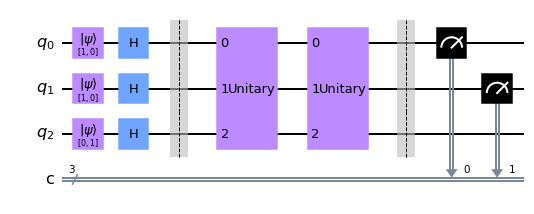

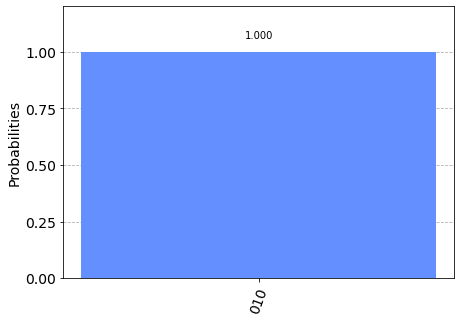

In [ ]:
import qiskit as qk
import numpy as np

from qiskit.quantum_info.operators import Operator

q = qk.QuantumRegister(3,'q')
c = qk.ClassicalRegister(3,'c')
qc = qk.QuantumCircuit(q,c)

qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.h(1)

qc.initialize([0,1],2)
qc.h(2)

qc.barrier()
oracle = np.eye(8)
oracle[:,[2,6]] = oracle[:,[6,2]]
oracle = Operator(oracle)
qc.append(oracle,q)

# n = 2 (two digits number to look for)
A = np.ones(4*4).reshape(4,4)/4
I4 = np.eye(4)
R = 2*A - I4
I2 = np.eye(2)
boost = np.kron(I2,R)
boost = Operator(boost)
qc.append(boost,q)

qc.barrier()
qc.measure(q[:2],c[:2])

display(qc.draw('mpl'))

simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=1000).result().get_counts()
qk.visualization.plot_histogram(results)

###### **Example with $f(101) = 1$: Resolution with Python**

Start by putting three qubits in state $|x_2x_1x_0\rangle = |000\rangle$

In [ ]:
import numpy as np
x0 = np.array([[1,0]]).T
x1 = np.array([[1,0]]).T
x2 = np.array([[1,0]]).T
x2x1x0 = np.kron(x2,np.kron(x1,x0))
x2x1x0.T

array([[1, 0, 0, 0, 0, 0, 0, 0]])

Pass the three qubits by Hadamard gates and get state $|x\rangle = H^{\otimes 3}.|x_2x_1x_0\rangle$

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
H3 = np.kron(H,H2)
x = H3.dot(x2x1x0)
x.T

array([[0.354, 0.354, 0.354, 0.354, 0.354, 0.354, 0.354, 0.354]])

Put a qubit in state $|y_0\rangle = |1\rangle$

In [ ]:
y0 = np.array([[0,1]]).T
y0.T

array([[0, 1]])

Pass qubit $y_0$ by a Hadamard gate and get state $|y\rangle = H.|y_0\rangle$.

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
y = H.dot(y0)
y.T

array([[ 0.707, -0.707]])

Combine states $|x\rangle$ and $|y\rangle$ by tensor product and get state $|\psi_0\rangle = |xy\rangle = |x\rangle \otimes |y\rangle$

In [ ]:
psi0 = np.kron(y,x)
psi0.T

array([[ 0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25, -0.25,
        -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25]])

The function is such that $f(101) = 1$. Therefore the transformation rule is:

$$\begin{array}{cccc|cccc}
y & x_2 & x_1 & x_0 & y & x_2 & x_1 & x_0 \\
\hline
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 \\
\hdashline
0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 1 & 1 & 0 & 1 \\
0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 \\
0 & 1 & 1 & 1 & 0 & 1 & 1 & 1 \\
\hdashline
1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 1 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\
1 & 0 & 1 & 1 & 1 & 0 & 1 & 1 \\
\hdashline
1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
1 & 1 & 1 & 0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\hdashline
\end{array}$$

In other words, it is a [16;16] identity matrix with columns 5 and 13 swapped.

Pass state $|\psi_0\rangle$ by the Oracle and get state $|\psi_1\rangle = U.|\psi_0\rangle$

In [ ]:
oracle = np.eye(16)
oracle[:,[5,13]] = oracle[:,[13,5]]
psi1 = oracle.dot(psi0)
psi1.T

array([[ 0.25,  0.25,  0.25,  0.25,  0.25, -0.25,  0.25,  0.25, -0.25,
        -0.25, -0.25, -0.25, -0.25,  0.25, -0.25, -0.25]])

Create matrix $R = 2A-I$ which will represent the rotation around the mean. Take notice that this transformation will only be applied to the first, second and third qubits of state $|\psi_1\rangle$

In [ ]:
# n = 8
A = np.ones(8*8).reshape(8,8)/8
I8 = np.eye(8)
R = 2*A-I8
R

array([[-0.75,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25],
       [ 0.25, -0.75,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25, -0.75,  0.25,  0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -0.75,  0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25, -0.75,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25,  0.25, -0.75,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25,  0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25, -0.75]])

Since state $|\psi_1\rangle$'s fourth qubit will be left undisturbed, create a [2;2] identity matrix and a transformation $I_2 \otimes R$ which will act on qubit $|\psi_1\rangle$ to get state $|\psi_2\rangle = I_2 \otimes R.|\psi_1\rangle$. This transformation represents rotation around the mean.

In [ ]:
I2 = np.eye(2)
I2R = np.kron(I2,R)
psi2 = I2R.dot(psi1)
psi2.T

array([[ 0.125,  0.125,  0.125,  0.125,  0.125,  0.625,  0.125,  0.125,
        -0.125, -0.125, -0.125, -0.125, -0.125, -0.625, -0.125, -0.125]])

Probability of measuring the answering states (either $|0101\rangle$ or $|1101\rangle$ is now 78%.

In [ ]:
0.625**2 + 0.625**2

0.78125

Let's repeat once more phase inversion (the oracle) and rotation around the mean ($I_2 \otimes R$) to increase probability of getting the correct answer.

In [ ]:
psi3 = I2R.dot(oracle).dot(psi2)
psi3.T

array([[-0.062, -0.062, -0.062, -0.062, -0.062,  0.687, -0.062, -0.062,
         0.062,  0.062,  0.062,  0.062,  0.062, -0.687,  0.062,  0.062]])

Probability of measuring states $|0101\rangle$ or $|1101\rangle$ is now 94.4%. Since in this example, $x_0$ is a three digits number, the operations of phase inversion and rotation about the mean have to be made $\sqrt{2^3} \approx 2,83$ or $2$ times to reach maximum probability.

In [ ]:
0.687**2 + 0.687**2

0.9439380000000002

If we try doing the operation $(I_2 \otimes R).U$ again (rotation about the mean and phase inversion) we will notice that probability of getting correct answer decreases.

In [ ]:
I2R.dot(oracle).dot(psi3).T

array([[-0.219, -0.219, -0.219, -0.219, -0.219,  0.406, -0.219, -0.219,
         0.219,  0.219,  0.219,  0.219,  0.219, -0.406,  0.219,  0.219]])

In fact, if we keep doing this operation the probability of getting the correct answer oscillates. Let's show this through a graph. First we create an unique matrix $T$ which represents both operations such that $T = (I_2 \otimes R).U$ where U is the oracle function.

In [ ]:
T = I2R.dot(oracle)

array([[-0.062, -0.062, -0.062, -0.062, -0.062,  0.687, -0.062, -0.062,
         0.062,  0.062,  0.062,  0.062,  0.062, -0.687,  0.062,  0.062]])

Now start with $|\psi_1\rangle$ let's loop 25 times this transformation $T$. A each time we will calculate and save the probability of measuring either state $|0101\rangle$ or state $|1101\rangle$. After that we present the results in a `matplotlib` graph.

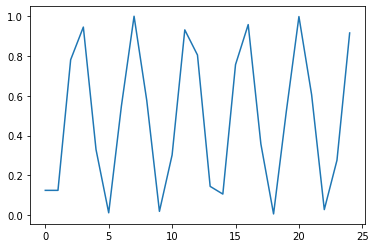

In [ ]:
psi = psi1
prob = []
for i in range(25):
  prob.append(psi[5,0]**2 + psi[13,0]**2)
  psi = T.dot(psi)

from matplotlib import pyplot as plt
plt.plot(list(range(25)), prob);

###### **Example with $f(101) = 1$. Resolution with Qiskit**

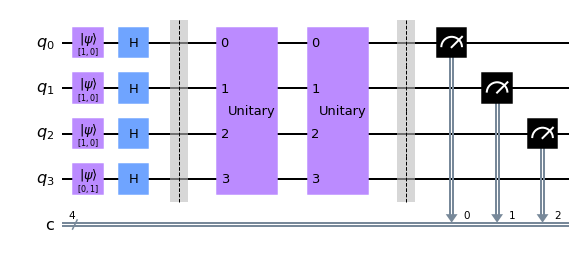

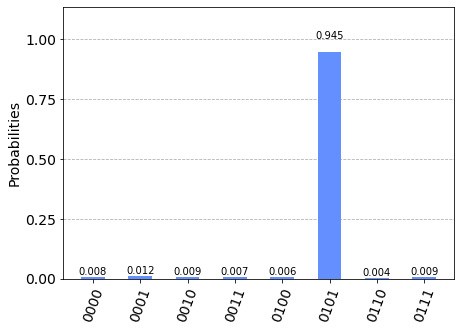

In [ ]:
import qiskit as qk
import numpy as np

from qiskit.quantum_info.operators import Operator

q = qk.QuantumRegister(4,'q')
c = qk.ClassicalRegister(4,'c')
qc = qk.QuantumCircuit(q,c)

qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([1,0],2)
qc.h(0)
qc.h(1)
qc.h(2)

qc.initialize([0,1],3)
qc.h(3)

qc.barrier()

# Create oracle matrix
oracle = np.eye(16)
oracle[:,[5,13]] = oracle[:,[13,5]]

# Create rotation about the mean matrix
# n = 3 (three digits number to look for)
A = np.ones(8*8).reshape(8,8)/8
I8 = np.eye(8)
R = 2*A - I8

# Identity matrix to leave fourth qubit undisturbed
I2 = np.eye(2)

# Create second transformation matrix
boost = np.kron(I2,R)

# Combine oracle with second transformation matrix in
#  an unique operator
T = boost.dot(oracle)
T = Operator(T)

# Apply operator twice (2 phase inversions and
#  rotations about the mean)
qc.append(T,q)
qc.append(T,q)

qc.barrier()
qc.measure(q[:3],c[:3])

display(qc.draw('mpl'))

simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=1000).result().get_counts()
qk.visualization.plot_histogram(results)

###### **Example with $f(1101) = 1$. Resolution with Qiskit**

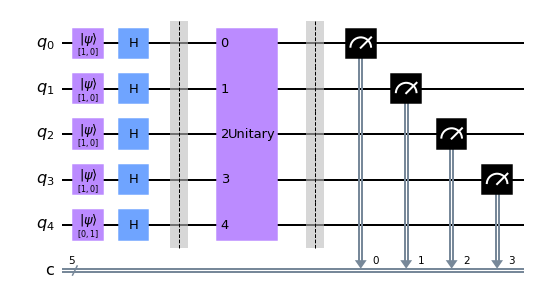

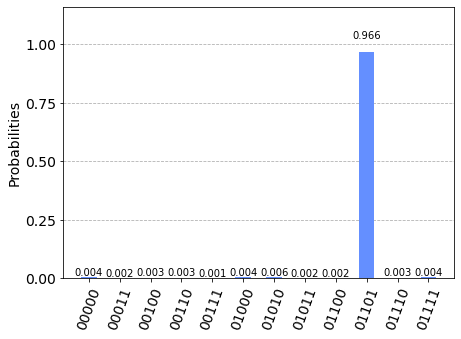

In [ ]:
import qiskit as qk
import numpy as np

from qiskit.quantum_info.operators import Operator

q = qk.QuantumRegister(5,'q')
c = qk.ClassicalRegister(5,'c')
qc = qk.QuantumCircuit(q,c)

qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([1,0],2)
qc.initialize([1,0],3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

qc.initialize([0,1],4)
qc.h(4)

qc.barrier()

# Create oracle matrix
oracle = np.eye(32)
oracle[:,[13,29]] = oracle[:,[29,13]]

# Create rotation about the mean matrix
# n = 4 (four digits number to look for)
A = np.ones(16*16).reshape(16,16)/16
I16 = np.eye(16)
R = 2*A - I16

# Identity matrix to leave fifth qubit undisturbed
I2 = np.eye(2)

# Create second transformation matrix
boost = np.kron(I2,R)

# Combine oracle with second transformation matrix in
#  an unique operator
T = boost.dot(oracle)

# n = 4. Therefore it will be necessary 4 T operations
#  to get maximum probability.
Tn = T.dot(T).dot(T)
Tn = Operator(Tn)

# Apply operator Tn once (n phase inversions and
#  rotations about the mean)
qc.append(Tn,q)

qc.barrier()
qc.measure(q[:4],c[:4])

display(qc.draw('mpl'))

simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=1000).result().get_counts()
qk.visualization.plot_histogram(results)

##### **Shor's Factoring Algorithm**

###### **Introduction**

The importance of Shor's algorithm resides in the fact that WWW security systems are based on the assumption that it is hard to factor integers. Shor's algorithm as we shall see shows a way to factor integers in polynomial time.

Let's see how a number can be factored from a classical point of view. Suppose we want to factor number $35$. So $N=35$

###### **The Greatest Common Divider Algorithm a.k.a. Euclid's Algorithm**

We start by choosing a number smaller than $N=35$, for example $a=6$. Let's check if $a=6$ and $N=35$ share a common prime factor. To do this we will use an algorithm due to Euclid.

First we calculate the difference between $N$ and $a$. In this case $N-a=29$. We have now three numbers: $6, 35, 29$. Take again the difference between the two smaller numbers and get: $29 - 6 = 23$. Repeat the process until the difference is equal to $0$. The number just before $0$ is $1$. This is the greatest common factor between $35$ and $6$. Therefore we say that $35$ and $6$ are *coprimes*.

In [ ]:
import numpy as np
import pandas as pd
N = 35; a = 6

GCD = pd.DataFrame({'N':[N], 'a':[a], 'N-a':[N-a]})

while GCD.iloc[-1,2] != 0:
  temp = GCD.iloc[-1].values
  temp = np.sort(temp); temp[-1] = temp[-2] - temp[-3]
  temp = pd.DataFrame(data = temp.reshape(-1,3), columns = ['N','a','N-a'])
  GCD = GCD.append(temp, ignore_index=True)

GCD

,N,a,N-a
0,35,6,29
1,6,29,23
2,6,23,17
3,6,17,11
4,6,11,5
5,5,6,1
6,1,5,4
7,1,4,3
8,1,3,2
9,1,2,1


As another example of this algorithm, let's suppose we want to calculate the greatest common factor between $9$ em $15$ which we know it is $3$. If we run it again we will see that just before the $0$ we get $3$ as expected.

In [ ]:
import numpy as np
import pandas as pd
N = 15; a = 9

GCD = pd.DataFrame({'N':[N], 'a':[a], 'N-a':[N-a]})

while GCD.iloc[-1,2] != 0:
  temp = GCD.iloc[-1].values
  temp = np.sort(temp); temp[-1] = temp[-2] - temp[-3]
  temp = pd.DataFrame(data = temp.reshape(-1,3), columns = ['N','a','N-a'])
  GCD = GCD.append(temp, ignore_index=True)

GCD

,N,a,N-a
0,15,9,6
1,6,9,3
2,3,6,3
3,3,3,0


These operations can be done with `numpy`'s function `gcd`

In [ ]:
import numpy as np
np.gcd(6,35), np.gcd(9,15)

(1, 3)

###### **Getting better factoring guesses of $N$**

The GCD algorithm is important to us because it let us use a number ($a$) to quickly test if it has one or more common factors with the number we want to factor ($N$). As we have seen our initial guess ($a = 6$) does not have any common factor with $N=35$.

Let's try creating a way of generating better factor guesses for our number $N$. Our objective here is to find two numbers ($g_1$ and $g_1$) such that each of them share a common factor with $x$.

$a=6$ and $N=35$ are integers. Let's suppose that there are also two other integers, $p$ and $m$ (unknown), that together with $N$ and $a$ satisfy the relationship below:

$$a^p = m.N + 1$$

From this last expression we can rearrange terms to make:

$$a^p-1 = m.N$$

$$(a^{p/2}-1).(a^{p/2}+1) = m.x$$

Our guesses are now $g_1 = a^{p/2}-1$ and $g_2=a^{p/2}+1$. Since we want $g_1$ and $g_2$ to be integers, $p$ must be even.

In this example $a=6$ and $N=35$. Let's suppose that we now choose $p=6$. Then $g_1=215$ and $g_2=217$. From this two guesses we can calculate the GCD between 215 and 35 which is 5, and the GCD between 217 and 35 which is 7 (see below calculations using `numpy`). And of course $7$ times $5$ is $35$. We have factored our number.

In [ ]:
import numpy as np
np.gcd(215,35), np.gcd(217,35)

(5, 7)

The question that remains is: starting from an arbitrary number $a$ how can we quickly choose an appropriate even number for $p$, such that $(a^{p/2}-1).(y^{p/2}+1) = m.N$?

###### **Modular Arithmetic: Dealing with the remainder of a division**

Modular Arithmetic or the division remainder arithmetic is a very specific area of mathematics. Few people dealt with it up to the mid XXth century. After that time it gained proeminence because it is directly related to the factorization problem. And the factorization problem is at the heart and soul of internet's security systems.

The main operation is called $\bmod$. When you $\bmod$ two numbers you calculate the division remainder of them. For instance: $20 \bmod 7 = 6$. In Python this is done using the $\%$ operator.

In [ ]:
20 % 7

6

Using $\bmod$ operation and set logic one can create *equivalences* between numbers. This kind of operation seems strange at first sight but is well according math rules. For instance $17 \equiv 2 \bmod 15$. This expression means that $17$ is *equivalent* to $2$ when both are considered under the rules of $\bmod 15$ operation. In fact $17 \bmod 15 = 2 \bmod 15$.

###### **$f(x) = a^x \bmod N$ is periodic if $a$ and $N$ are coprimes**

An intersting result appears when we consider a function like $f(x) = a^x \bmod N$ if $a$ and $N$ are coprimes. Below we calculate several values of $f(x)$ for $a=2$ and $N=15$. As you can see, $\bmod$ is a periodic function. In this example the period of $f(x)$ is $r=4$ because $f(x+r) = f(x)$

In [ ]:
import numpy as np
f = lambda x,a,N: a**x % N

[f(x,2,15) for x in range(10)]

[1, 2, 4, 8, 1, 2, 4, 8, 1, 2]

###### **Calculating values of $f(x) = a^x \bmod N$**

Let's do another example and learn some $\bmod$ tricks. Suppose we want to calculate $f(x) = 2^x \bmod 371$. Trying to calculate $2^x$ directly may not be a good idea because the numbers will get to big very quickly. What can we do here?

Suppose numbers $a_1$, $a_0$, $b_1$, $b_0$ and $N$ such that:

$$a_1 \equiv a_0 \bmod N$$

$$b_1 \equiv b_0 \bmod N$$


Replacing values $a_1$ and $b_1$ by their equivalents, one can calculate $(a_1.b_1) \bmod N$ as:

$$(a_1 . b_1) \bmod N = (a_0 \bmod N) . (b_0 \bmod N) \bmod N$$

For instance:

$$13 \bmod 11 =  2 \bmod 11$$

$$35 \bmod 11 = 24 \bmod 11$$

$$(13.35) \bmod 11 = (2 \bmod 11).(24 \bmod 11) \bmod 11$$

See below this example calculated in Python:

In [ ]:
import numpy as np
(13*35)%11, ((2%11)*(24%11))%11

(4, 4)

Therefore to calculate for instance $2^x \bmod 371$ one does:

$$2^0 \bmod 371 = 1$$

$$2^1 \bmod 371 = (2 \bmod 371).(2^0 \bmod 371) \bmod 371 = 2$$

$$2^2 \bmod 371 = (2 \bmod 371).(2^1 \bmod 371) \bmod 371 = 4$$

$$2^3 \bmod 371 = (2 \bmod 371).(2^2 \bmod 371) \bmod 371 = 8$$

$$...$$

$$2^x \bmod 371 = (2 \bmod 371).(2^{x-1} \bmod 371) \bmod 371$$


See below in Python

In [ ]:
import numpy as np

def f(x,a,N):
  a0 = 1
  for i in range(x):
    a0 = ((a%N)*(a0))%N
  return(a0)

[f(x,2,371) for x in range(8)]

[1, 2, 4, 8, 16, 32, 64, 128]

In [ ]:
[f(x,2,371) for x in range(154,159)]

[93, 186, 1, 2, 4]

In [ ]:
[f(x,24,371) for x in range(77,81)]

[201, 1, 24, 205]

###### **Finding the period of $f(x) = a^x \bmod N$**

If $f_{a,N}(x) = a^x \bmod N$ then $f_{a,N}(0) = 1$. If $a$ and $N$ are coprimes then $f_{a,N}(x)$ is periodic. This means that for some $r$, $f_{a,N}(x+r) = f_{a,N}(x)$. To find $f_{a,N}(x)$'s period one should try each number $x$ from $0$ up to some $r$ such that $f(r)$ is equal to $1$ again.  

In [ ]:
import numpy as np

def fr(a,N):
  ax = ((a%N)*(1))%N
  x = 1
  while ax != 1:
    ax = ((a%N)*(ax))%N
    x = x+1
  return(x)

fr(2,371), fr(6,371), fr(24,371)

(156, 26, 78)

###### **Connecting the dots: Factoring $N=35$**

Now let's return to the problem of factoring $N=35$. Let's start with a coprime factor of $N$, for instance $a=6$. We defined a relationshinp between $N$, $a$ and two numbers $x$ and $m$, all of them integers, which was:

$$ a^x = m.N + 1$$



Based on the relationship above and the fact that all numbers in it are supposed to be integers, we can say that we are looking for some number $x$ such that, given two coprime numbers $a$ and $N$:

$$ a^x \bmod N = 1$$

In other words, our new guesses will be calculated from the period $x=r$ of $f_{a,N}(x)$

We rearranged terms in the above expression and got:

$$(a^{x/2}-1).(a^{x/2}+1) = m.N$$

$a^{x/2}-1$ and $a^{x/2}+1$ will be our new guesses for numbers that will share a common factor with N.

Now here comes the "trick". The number $x$ is such that $a^x \bmod N = 1$. We learned in the previous section that $\bmod$ function when $a$ and $N$ are coprimes is periodic. The period can be discovered by searching the value of $x$ such that $f(x)=1$. So what we need to do in order to find "good guesses" for numbers that share a common factor with $N$ is to find the period $r$ of $f(x) = a^x \bmod N$.

Upon finding this $x$ we can calculate our guesses and from them find the factors of $N$. See below.

In [ ]:
import numpy as np

def fr(a,N):
  a0 = 1
  a0 = ((a%N)*a0)%N
  x = 2
  find = False
  while find==False:
    a0 = ((a%N)*(a0))%N
    if a0 == 1:
      find = True
    x = x+1
  return(x-1)

N = 35
a = 2
fr(a,N)

12

Period of $f_{2,35}(x)$ is $12$. Therefore our guesses will be:

In [ ]:
2**(12/2)-1, 2**(12/2)+1

(63.0, 65.0)

Calculating the GCD between each of our guesses and $N=35$ we get:

In [ ]:
np.gcd(63,35), np.gcd(65,35)

(7, 5)

And 7 times 5 is...35! VOILÁ!

###### **Example: Factoring $N=247$**

In [ ]:
import numpy as np
# Function to calculate the period of f(x) = a^x MOD N
def fr(a,N):
  a1 = ((a%N)*(1))%N
  x = 1
  while a1 != 1:
    a1 = ((a%N)*a1)%N
    x = x+1
  return(x)

# Function to factor N based on a
def factor(N, a=2):
  r = fr(a,N)
  g1 = a**(int(r/2)) - 1
  g2 = a**(int(r/2)) + 1
  f1 = np.gcd(g1,N)
  f2 = np.gcd(g2,N)
  return(f1,f2, f1*f2)

factor(247)

(19, 13, 247)

In [ ]:
factor(1045)

(209, 5, 1045)

###### **The Quantum Part: How to quickly find the period of $f(x) = a^x \bmod N$**

Now let's move to the world of qubits and try tackling with this problem. We have a function $f(x) = a^x \bmod N$, where $a$ and $N$ are supposed to be coprimes. If this condition is met, $f(x)$ will be periodic. This means that for some value $r$, $f(x) = f(x+r)$. We want to find its period $r$.

Our function $f_{a,N}(x)$ is such that for any value of $a$ and $N$, $f(0)=1$. Also, since it is the remainder of a division by $N$, its maximum value is $N$. Therefore to deal with $f(x)$'s results we will need a binary number with $n = \log_{2}N$ numbers.

Our function is $f(x) = a^x \bmod N$. We need $n = log_{2}N$ bits to evaluate $f(x)$'s results. The period $r$ has a maximum value equal to $N$. Therefore at first sight we would need a $n$ bits $x$ number. For reasons that will become clearer later when we discuss the so called QFT (Quantum Fourier Transform), we in fact will need $x$ to be a $2n$ bits number.

Since $n = log_{2}N$ then $m = 2n = 2 log_{2}N = log_{2}N^2$. Therefore instead of the range $0...N$, we will evaluate it in $0...N^2$ .  

Our circuit will be in principle "simple". It will be composed by an $|x\rangle_{m}$ vector with $m$ bits and an $|y\rangle_{n}$ vector with $n$ bits, both of them initialized in the state $|0\rangle$. Mathematically speaking we have:

$$|\psi_0\rangle = |y\rangle_{n} \otimes |x\rangle_{m} = |0\rangle_{n} \otimes |0\rangle_{m}$$

In [ ]:
import numpy as np
N = 15 # number to be factored
n = 4  # number of bits necessary to represent N
m = 8  # number of bits necessary to represent N^2
x = np.zeros(2**m).reshape(-1,1)
x[0,0] = 1
x.shape # since x is a 2^8 = 256 positions vector it will not be showed here

(256, 1)

In [ ]:
y = np.zeros(2**n).reshape(-1,1)
y[0,0] = 1; y.T # y is a 2^4 = 16 positions vector shown below

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
psi0 = np.kron(y,x)
psi0.shape # psi0 is a 256 x 16 = 4.096 positions vector

(4096, 1)

Vector $|x\rangle_{m}$ will be placed in a superposition of all its base states. Vector $|y\rangle_{n}$ will be left undisturbed. Therefore our circuit's next state will be:

$$|\psi_1\rangle = I_n|y\rangle_{n} \otimes H^{\otimes m}|x\rangle_{m}$$

$$|\psi_1\rangle = I_n \otimes H^{\otimes m}.|y\rangle_n \otimes |x\rangle_m$$

$$|\psi_1\rangle = I_n \otimes H^{\otimes m}.|\psi_0\rangle$$

In [ ]:
In = np.eye(2**n); In.shape

(16, 16)

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
Hm = H.copy()
for i in range(1,m):
  Hm = np.kron(Hm,H)

Hm.shape

(256, 256)

In [ ]:
psi1 = np.kron(In,Hm).dot(psi0); psi1.shape

(4096, 1)

Next comes the "oracle" $U_f$. The output of $U_f$ is such that  